<center>

### ZNANSTVENO PROGRAMIRANJE

## 2022./2023.

# Anime 

#### Članovi grupe: Nika Hell i Josipa Radak

</center>

## Opis projekta
<br>

---

**Uvod:**
<p align="justify">
Anime je izraz za svaki crtani film koji dolazi iz Japana. Ova vrsta crtanog filma vrlo je specifična te se može lako prepoznati (likovi imaju uglavnom velike oči itd.). Anime danas uživa veliku popularnost u svijetu te postoji vrlo široka paleta kako žanrova (npr. SciFi, misterije, fantazije itd.), tako i formata (filmovi, serije, specijali itd.). Zbog popularnosti Anime-a, na Web-u se može pronaći mnogo podataka o Anime te ta cijela priča postaje zanimljiva za obradu i analizu.

---

**Sažetak:**
<p align="justify">
U ovom projektu prikupljeni su podaci s internetske stranice pomoću Selenium biblioteke. Prvo su dohvaćene liste najpopularnijih Anime u određenoj godini (2006.-2023.), a potom i detalji o svakom pojedinom Anime iz te liste. Nakon toga upoznajemo se sa samom strukturom podataka i radi se priprema za daljnju obradu i analizu (uklonjene nedostajućih vrijednosti, duplikati u podacima i polja s više vrijednosti). Potom, kroz pitanja, detaljnije se upoznajemo s podacima i njihovim karakteristikama u sklopu eksplorativne analize podataka. Uz EDA-u, napravljena je kratka statistička obrada pomoću koje saznajemo nešto više o zavisnosti varijabli, srednjim vrijednostima i raspršenosti podataka. Nakon toga pomoću linearne regresije pokušavamo predvidjeti broj oznaka favorita za Anime na temelju popularnosti. Potom, pomoću Toolz biblioteke i streaming funkcije pretražujemo Anime franšize jer one nisu rijetkost u svijetu Animea. Na kraju, cijelu priču zaokružujemo jednostavnim sustavom preporuka koji koristi kosinus udaljenosti između dvaju vektora sastavljenih od određenih stupaca u našoj tablici za određene Anime.

---

**Sadržaj:**

1. Učitavanje i instalacija biblioteka

2. Prikupljanje podataka

3. Preliminarna EDA i priprema podataka za obradu

4. Eksplorativna analiza podataka

5. Statistika

6. Linearna regresija

7. Pretraživanje Anime franšize pomoću Toolz biblioteke i streaming funkcije

8. Sustav preporuka

9. Zaključak

# 1. Učitavanje i instalacija  biblioteka

##Povezivanje Google Colab Python bilježnice s Google Drive

In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
%cd /content/drive/MyDrive/znanstveno/zp_hell_radak

/content/drive/MyDrive/znanstveno/zp_hell_radak


## [***Selenium***](https://www.selenium.dev/) 
Python biblioteka i alat koji se koristi za automatizaciju web preglednika za obavljanje niza zadataka. Jedan od takvih je web-scraping za izdvajanje korisnih podataka i informacija koje bi inače mogle biti nedostupne.

* **Webdriver** je vitalni "sastojak" ovog procesa. To je ono što će zapravo automatski otvoriti preglednik za pristup web stranici po izboru.

* Kako koristimo Google Chrome, instalirat ćemo driver za Chrome (ostale opcije: Firefox, Internet Explorer, Edge i Safari).

In [ ]:
!pip install selenium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 71.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.9/384.9 KB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 KB 8.1 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By 
from selenium.webdriver.chrome.service import Service as ChromeService 

In [ ]:
!apt install chromium-chromedriver
chrome_options = webdriver.ChromeOptions()
#regularni chrome ali bez UI
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--headless')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
chromium-chromedriver is already the newest version (1:85.0.4183.83-0ubuntu0.20.04.2).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.


In [ ]:
driver = webdriver.Chrome('chromedriver', options=chrome_options)
## issue last 7 days - https://stackoverflow.com/questions/75155063/selenium-use-chrome-on-colab-got-unexpectedly-exited

##    
[***NumPy***](https://numpy.org/doc/stable/index.html)
je Python biblioteka koja dodaje podršku za velike, višedimenzionalne nizove i matrice, zajedno s velikom zbirkom matematičkih funkcija visoke razine za rad na tim nizovima.

[***Pandas***](https://pandas.pydata.org/) je Python biblioteka za manipulaciju i analizu podataka. Konkretno, nudi strukture podataka i operacije za manipuliranje numeričkim tablicama i vremenskim serijama. 

[***ScyPy***](https://scipy.org/) je Python biblioteka koja se koristi za znanstveno i tehničko računalstvo. SciPy sadrži module za optimizaciju, linearnu algebru, integraciju, interpolaciju, posebne funkcije, FFT, obradu signala i slike i druge zadatke uobičajene u znanosti i inženjerstvu.

[***Matplotlib***](https://matplotlib.org/stable/index.html) je Python biblioteka za crtanje za i numeričko matematičko proširenje NumPy.

[***Seaborn***](https://seaborn.pydata.org/#) je Python biblioteka za vizualizaciju podataka temeljena na matplotlibu. Omogućuje sučelje visoke razine za crtanje atraktivne i informativne statističke grafike.

In [ ]:
import time
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sn
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from textwrap import wrap #prelama jedan odlomak u tekst (niz) tako da svaki redak ima najvise odredeno znakova sirine

# 2. Prikupljanje podataka

* Podatke ćemo prikupljat s dvije međusobno povezane dinamičke stranice. Kako se 
ovdje radi o dinamičkim web stranicama, odlučili smo se za Selenium kako bi dohvatili podatke.
Kada posjetite web stranicu s Webdriverom, preglednik učitava sve resurse web 
stranice (JavaScript datoteke, slike, CSS datoteke itd.) i izvršava sav JavaScript na stranici. Zbog toga je Selenium idealan u ovom slučaju.

* Kao izvor podataka odlučili smo se za dvije stranice koje sadrže popis i detalje o Anime: 

  * Lista najpopularnijih Anime serija u određenoj godini (od 2006. godine do 2022.godine) u određenom godišnjem dobu:
 https://anichart.net/

![](https://docs.google.com/uc?export=download&id=1FrpkMMtm2SL-ODqpFOYMoxrxBWc5lRZM)

  * Detalji o pojedinom Anime:
https://anilist.co/

![](https://docs.google.com/uc?export=download&id=13i_3Pb10KFpr0xoQlpEMeJwvXMp8Q3Ul)


## 2.1. Dohvaćanje najpopularnijih Anime za određenu sezonu određene godine

Podaci su dostupni za razdoblje od Zime 2006. godine do Ljeta 2023. godine.


###           

In [ ]:
url='https://anichart.net/Summer-2022'
driver.get(url) #dohvacanje stranice

In [ ]:
for i in range(10):
  driver.execute_script("window.scrollTo(0, document.body.scrollHeight);") # izvrsavanje skripte - ucitavanaje sve do kraja stranice
  time.sleep(2)
driver.page_source

'<html><head><meta charset="utf-8"><meta http-equiv="X-UA-Compatible" content="IE=edge"><meta name="viewport" content="width=device-width,initial-scale=1,maximum-scale=1,minimum-scale=1,user-scalable=no"><base href="/"><link rel="shortcut icon" href="/favicon.ico"><link rel="preload" as="style" href="https://fonts.googleapis.com/css?family=Overpass:400,600,700,800"><link href="https://fonts.googleapis.com/css?family=Overpass:400,600,700,800" rel="stylesheet"><meta property="og:type" content="website"><meta property="og:title" content="AniChart: Seasonal Anime Charts"><meta property="og:image" content="https://anichart.net/img/og-image.png"><meta property="og:site_name" content="AniChart"><meta property="og:description" content="Find, track, and share upcoming seasonal anime shows and movies on AniChart.net"><meta name="twitter:card" content="summary"><meta name="twitter:site" content="@AniChartNet"><meta name="twitter:image" content="https://anichart.net/img/og-image.png"><meta name="g

In [ ]:
titles = driver.find_elements(By.CLASS_NAME, 'title') # dohvacanje naziva anime
  # podaci dostupni iz url stranice
suburl = url[21:]
year = suburl[-4:] 
season = suburl[:-5]

for title in titles:
  # dohvacanje poveznice za pojedini anime gdje imamo detalje
  single_link = title.get_attribute('href')
  # prvi dio linka uvijek isti - mozemo ga izbaciti 
  single_link = single_link[25:]
  print(f'Nalov:{title.text}, Link: {single_link}, Godina: {year}, Godisnje doba:{season}')

Nalov:Yofukashi no Uta, Link: 141391/Yofukashi-no-Uta, Godina: 2022, Godisnje doba:Summer
Nalov:Youkoso Jitsuryoku Shijou Shugi no Kyoushitsu e 2nd Season, Link: 145545/Youkoso-Jitsuryoku-Shijou-Shugi-no-Kyoushitsu-e-2nd-Season, Godina: 2022, Godisnje doba:Summer
Nalov:Hataraku Maou-sama!!, Link: 130592/Hataraku-Maousama, Godina: 2022, Godisnje doba:Summer
Nalov:Lycoris Recoil, Link: 143270/Lycoris-Recoil, Godina: 2022, Godisnje doba:Summer
Nalov:Overlord IV, Link: 133844/Overlord-IV, Godina: 2022, Godisnje doba:Summer
Nalov:Kanojo, Okarishimasu 2nd Season, Link: 124410/Kanojo-Okarishimasu-2nd-Season, Godina: 2022, Godisnje doba:Summer
Nalov:Made in Abyss: Retsujitsu no Ougonkyou, Link: 114745/Made-in-Abyss-Retsujitsu-no-Ougonkyou, Godina: 2022, Godisnje doba:Summer
Nalov:Dungeon ni Deai wo Motomeru no wa Machigatteiru Darou ka IV: Shin Shou Meikyuu-hen, Link: 129196/Dungeon-ni-Deai-wo-Motomeru-no-wa-Machigatteiru-Darou-ka-IV-Shin-Shou-Meikyuuhen, Godina: 2022, Godisnje doba:Summer
Nal

###          

In [ ]:
years = np.arange(2006,2024,1) #niz godina za koje trazimo najpopularnije anime
years = list(years.astype(str)) #pretvorba brojcanih zapisa u stringove
seasons = np.array(['Winter', 'Spring', 'Summer', 'Fall']) #za svaku godinu imamo 4 godisnja doba (sezone)
urls = [] #lista za spremanje linkova
for year in years:
  for season in seasons:
    url = 'https://anichart.net/' + season + '-' + year
    urls.append(url)
urls = urls[:-1] #izbacujemo jesen 2023. godine jer ta stranica jos ne postoji
urls[-5:]

['https://anichart.net/Summer-2022',
 'https://anichart.net/Fall-2022',
 'https://anichart.net/Winter-2023',
 'https://anichart.net/Spring-2023',
 'https://anichart.net/Summer-2023']

In [ ]:
# dohvacanje popisa anime
##magic command for CPU time and Wall time
%%time 
list_anime = []
for url in urls:
  driver.get(url) #dohvacanje stranice
  for i in range(10):
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);") # izvrsavanje skripte - ucitavanaje sve do kraja stranice
    time.sleep(2)
  
  titles = driver.find_elements(By.CLASS_NAME, 'title') # dohvacanje naziva anime
  # podaci dostupni iz url stranice
  suburl = url[21:]
  year = suburl[-4:] 
  season = suburl[:-5]
  
  for title in titles:
    # dohvacanje poveznice za pojedini anime gdje imamo detalje
    single_link = title.get_attribute('href')
    # prvi dio linka uvijek isti - mozemo ga izbaciti 
    single_link = single_link[25:]
    list_anime.append([title.text, single_link, year, season])

df = pd.DataFrame(list_anime, columns=['Title', 'Link', 'Year', 'Season']) #spremanje prikupljenih podataka u dataframe

CPU times: user 30.6 s, sys: 2.3 s, total: 32.9 s
Wall time: 30min 47s


In [ ]:
# spremanje dataframea na Google Drive u obliku csv-a
df.to_csv('anime.csv', index_label=False)

## 2.2. Dohvaćanje osnovnijih informacija o pojedinom Anime

###          

In [ ]:
url='https://anilist.co/anime/141391/Yofukashi-no-Uta'
driver.get(url)

In [ ]:
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
time.sleep(2)
driver.page_source

'<html lang="en"><head><title data-vue-meta="true">Yofukashi no Uta (Call of the Night) · AniList</title><meta data-vue-meta="true" property="og:title" content="Call of the Night"><meta data-vue-meta="true" property="og:description" content="Wracked by insomnia and wanderlust, Kou Yamori is driven onto the moonlit streets every night in an aimless search for something he can’t seem to name. His nightly ritual is marked by purposeless introspection — until he meets Nazuna, who might just be a vampire! Kou’s new companion could offer him dark gifts and a vampire’s immortality. But there are conditions that must be met before Kou can sink his teeth into vampirism, and he’ll have to discover just how far he’s willing to go to satisfy his desires before he can heed the Call of the Night!"><meta data-vue-meta="true" property="og:image" content="https://img.anili.st/media/141391"><meta data-vue-meta="true" property="og:url" content="https://anilist.co/anime/141391/Yofukashi-no-Uta"><meta data

In [ ]:
data = driver.find_elements(By.CLASS_NAME, 'data')
statuses = driver.find_elements(By.CLASS_NAME, 'status')

for d in data:
    dat = d.text.splitlines()
    format = dat[dat.index('Format') + 1] if 'Format' in dat else 'NaN'
    episodes = dat[dat.index('Episodes') + 1] if 'Episodes' in dat else 'NaN'
    episode_duration = dat[dat.index('Episode Duration') + 1] if 'Episode Duration' in dat else 'NaN'
    status = dat[dat.index('Status') + 1] if 'Status' in dat else 'NaN'
    popularity=dat[dat.index('Popularity') + 1] if 'Popularity' in dat else 'NaN'
    average_score = dat[dat.index('Average Score') + 1] if 'Average Score' in dat else 'NaN'
    mean_score = dat[dat.index('Mean Score') + 1] if 'Mean Score' in dat else 'NaN'
    favorites = dat[dat.index('Favorites') + 1] if 'Favorites' in dat else 'NaN'
    studios = dat[dat.index('Studios') + 1] if 'Studios' in dat else 'NaN'
    source = dat[dat.index('Source') + 1] if 'Source' in dat else 'NaN'
    genres = dat[dat.index('Genres') + 1 : dat.index('Romaji')] if 'Genres' in dat and 'Romaji' in dat else 'NaN'
    genres = ','.join(genres)
    print(f'Format: {format}\nEpisodes: {episodes}\nEpisode Duration: {episode_duration}\n'+
          f'Status: {status}\nPopularity: {popularity}\nAverage score: {average_score}\nMean Score: {mean_score}\n'+
          f'Favorites: {favorites}\nStudios: {studios}\nSource: {source}\nGenres: {genres}')
for status in statuses:
    stat = status.text.splitlines()
    if len(stat) > 0:
      print(stat[1][:-6])

Format: TV
Episodes: 13
Episode Duration: 23 mins
Status: Finished
Popularity: 110646
Average score: 80%
Mean Score: 80%
Favorites: 4645
Studios: LIDENFILMS
Source: Manga
Genres: Comedy,Psychological,Romance,Slice of Life,Supernatural
40913
39003
23479
3965


###               

In [ ]:
##magic command for CPU time and Wall time
%%time

list_anime_spec = []
for i in range(df.shape[0]):
  if i % 100 == 0:
    print(i) 
  url = 'https://anilist.co/anime/'+df.Link[i] #rekonstruiraj poveznicu  
  driver.get(url) #dohvacanje stranice
  
  driver.execute_script("window.scrollTo(0, document.body.scrollHeight);") # izvrsavanje skripte - ucitavanaje sve do kraja stranice
  # time.sleep(2)

  data = driver.find_elements(By.CLASS_NAME, 'data')
  statuses = driver.find_elements(By.CLASS_NAME, 'status')
  
  anime_spec = []

  for d in data:
    dat = d.text.splitlines()
    format = dat[dat.index('Format') + 1] if 'Format' in dat else 'NaN'
    episodes = dat[dat.index('Episodes') + 1] if 'Episodes' in dat else 'NaN'
    episode_duration = dat[dat.index('Episode Duration') + 1] if 'Episode Duration' in dat else 'NaN'
    status = dat[dat.index('Status') + 1] if 'Status' in dat else 'NaN'
    popularity=dat[dat.index('Popularity') + 1] if 'Popularity' in dat else 'NaN'
    mean_score = dat[dat.index('Mean Score') + 1] if 'Mean Score' in dat else 'NaN'
    favorites = dat[dat.index('Favorites') + 1] if 'Favorites' in dat else 'NaN'
    studios = dat[dat.index('Studios') + 1] if 'Studios' in dat else 'NaN'
    source = dat[dat.index('Source') + 1] if 'Source' in dat else 'NaN'
    genres = dat[dat.index('Genres') + 1 : dat.index('Romaji')] if 'Genres' in dat and 'Romaji' in dat else 'NaN'
    genres = ','.join(genres)
    anime_spec.extend([format, episodes, episode_duration, 
                       status, popularity, mean_score, favorites, 
                       studios, source, genres])
  for status in statuses:
    stat = status.text.splitlines()
    if len(stat) > 0:
      anime_spec.append(stat[1][:-6])
  list_anime_spec.append(anime_spec)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
CPU times: user 2min 34s, sys: 11.6 s, total: 2min 46s
Wall time: 2h 54min 27s


In [ ]:
#spremanje prikupljenih podataka u dataframe
df_spec = pd.DataFrame(list_anime_spec, columns=['Format', 'Episodes', 'EpisodeDuration', 'Status', 'Popularity',
                                                 'MeanScore','Favorites', 'Studios', 
                                                 'Source', 'Genre', 'Completed', 'Planning', 'Current', 'Dropped'])

In [ ]:
# ulancavanje dataframeova nakog svih prikupljenih podataka 
df_anime = pd.concat([df, df_spec], axis=1)

In [ ]:
# spremanje dataframea na Google Drive u obliku csv-a
df_anime.to_csv('anime_data.csv', index_label=False)

#      
**anime_data.csv**

- **Title**: naziv za Anime
- **Link**: poveznica koja vodi na detalje o pojedinom Anime
- **Year**: godina u kojoj se Anime počeo prikazivati
- **Season**: godišnje doba u kojem se Anime počeo prikazivati
- **Format**: film, OVA, TV... 
- **Episodes**: broj epizoda
- **EpisodeDuration**: duljina trajanja jedne epizode
- **Status**: status izdanja; završen, u trajanju...
- **Popularity**: popularnost Anime (po broju korisnika)
- **MeanScore**: srednja vrijednost uspjeha
- **Favorites**: broj oznaka kao omiljeni
- **Studios**: produkcijska kuća
- **Source**: inspiracija/izvor; Manga, original...
- **Genre**: žanrovi pod koje se uklapa Anime
- **Completed**: broj korisnika koji je završio s pračenjem određenog Anime
- **Planning**: broj korisnika koji planira pratiti određeni Anime
- **Current**: broj korisnika koji trenutno prati određeni Anime
- **Dropped**: broj korisnika koji je odustao od pračenja određenog Anime

In [ ]:
#ucitavanje podataka u pandas dataframe
df = pd.read_csv('anime_data.csv')

# 3. Preliminarna EDA i priprema podataka za obradu

## 3.1. Upoznavanje s podacima

In [ ]:
#identifikacija tipa df objekta
type(df)

pandas.core.frame.DataFrame

In [ ]:
#pregled koliko zauzima memorije (bash)
!ls -sh anime_data.csv

1.3M anime_data.csv


In [ ]:
#iskoristenje memorije i osnovne informacije
before_info=df.info(memory_usage="deep")
before_info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7619 entries, 0 to 7618
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       7619 non-null   int64  
 1   Title            7543 non-null   object 
 2   Link             7619 non-null   object 
 3   Year             7619 non-null   int64  
 4   Season           7619 non-null   object 
 5   Format           7493 non-null   object 
 6   Episodes         7357 non-null   float64
 7   EpisodeDuration  6360 non-null   object 
 8   Status           7493 non-null   object 
 9   Popularity       7493 non-null   float64
 10  MeanScore        7398 non-null   object 
 11  Favorites        6685 non-null   float64
 12  Studios          5843 non-null   object 
 13  Source           6927 non-null   object 
 14  Genre            7493 non-null   object 
 15  Completed        7493 non-null   float64
 16  Planning         7493 non-null   float64
 17  Current       

In [ ]:
print(f"Ovaj skup podataka ima {df.shape[0]} redova i {df.shape[1]} stupaca.")
print(f"Broj elemenata je: {df.size}")
print(f"Broj dimenzija: {df.ndim}")

Ovaj skup podataka ima 7619 redova i 19 stupaca.
Broj elemenata je: 144761
Broj dimenzija: 2


In [ ]:
def columns(data):
  for col in data.columns:
    print("\t", col)
print("Stupci:")
columns(df)

Stupci:
	 Unnamed: 0
	 Title
	 Link
	 Year
	 Season
	 Format
	 Episodes
	 EpisodeDuration
	 Status
	 Popularity
	 MeanScore
	 Favorites
	 Studios
	 Source
	 Genre
	 Completed
	 Planning
	 Current
	 Dropped


In [ ]:
#tipovi podataka
df.dtypes

Unnamed: 0           int64
Title               object
Link                object
Year                 int64
Season              object
Format              object
Episodes           float64
EpisodeDuration     object
Status              object
Popularity         float64
MeanScore           object
Favorites          float64
Studios             object
Source              object
Genre               object
Completed          float64
Planning           float64
Current            float64
Dropped            float64
dtype: object

In [ ]:
pd.set_option('display.max_columns', None) #prikazivanje svih stupaca
#prikaz prva 3 retka dataframea
df.head(3)

,Unnamed: 0,Title,Link,Year,Season,Format,Episodes,EpisodeDuration,Status,Popularity,MeanScore,Favorites,Studios,Source,Genre,Completed,Planning,Current,Dropped
0,0,Fate/stay night,356/Fatestay-night,2006,Winter,TV,24.0,24 mins,Finished,122460.0,68%,1457.0,Studio DEEN,Visual Novel,"Action,Fantasy,Romance,Supernatural",81831.0,28558.0,4423.0,4340.0
1,1,Ergo Proxy,790/Ergo-Proxy,2006,Winter,TV,23.0,25 mins,Finished,93739.0,76%,2736.0,Manglobe,Original,"Adventure,Mystery,Psychological,Sci-Fi",50251.0,31419.0,4708.0,4506.0
2,2,Hanbun no Tsuki ga Noboru Sora,587/Hanbun-no-Tsuki-ga-Noboru-Sora,2006,Winter,TV,6.0,24 mins,Finished,13879.0,70%,80.0,Group TAC,Light Novel,"Comedy,Drama,Romance",7309.0,5768.0,309.0,271.0


In [ ]:
#prikaz zandja 3 retka dataframea
df.tail(3)

,Unnamed: 0,Title,Link,Year,Season,Format,Episodes,EpisodeDuration,Status,Popularity,MeanScore,Favorites,Studios,Source,Genre,Completed,Planning,Current,Dropped
7616,7616,Hizukuri,98875/Hizukuri,2023,Summer,ONA,1.0,26 mins,Not Yet Released,1424.0,NaN,2.0,NaN,Original,"Adventure,Fantasy,Sci-Fi",1385.0,18.0,14.0,5.0
7617,7617,Love Live! Nijigasaki Gakuen School Idol Douko...,157654/Love-Live-Nijigasaki-Gakuen-School-Idol...,2023,Summer,OVA,1.0,NaN,Not Yet Released,1232.0,NaN,19.0,NaN,Multimedia Project,"Music,Slice of Life",1215.0,7.0,4.0,4.0
7618,7618,Stand My Heroes: WARMTH OF MEMORIES,133892/Stand-My-Heroes-WARMTH-OF-MEMORIES,2023,Summer,OVA,NaN,NaN,Not Yet Released,305.0,NaN,6.0,M.S.C,Video Game,"Action,Drama,Mystery,Psychological",291.0,8.0,3.0,3.0


##  3.2. Početno uređivanje podataka

In [ ]:
#uklanjanje stupaca
## unnamed su nepotrebno
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
#svi stupci u df
df.columns

Index(['Title', 'Link', 'Year', 'Season', 'Format', 'Episodes',
       'EpisodeDuration', 'Status', 'Popularity', 'MeanScore', 'Favorites',
       'Studios', 'Source', 'Genre', 'Completed', 'Planning', 'Current',
       'Dropped'],
      dtype='object')

In [ ]:
#izbaci postotke iz MeanScore
df['MeanScore'] = df['MeanScore'].str.replace('%', '')

In [ ]:
# podatke mean pretvori u brojcane vrijednosti
## pazi! ->nedostajuce vrijednosti
def to_int(x):
  try:
    return int(x)            
  except:
    return np.nan

df['MeanScore'] = df['MeanScore'].apply(to_int)

In [ ]:
# preoblikuj vrijednosti u EpisodeDuration
# npr. 1 h 15 mins -> 75 (min)
def change_time(row):
    if row['EpisodeDuration'] is not np.nan:
      hours = row['EpisodeDuration'][:row['EpisodeDuration'].index('h')-1] if 'hour' in row['EpisodeDuration'] else 0
      hours = int(hours)*60 if hours!=0 else 0
      mins = row['EpisodeDuration'][row['EpisodeDuration'].index(',')+1:row['EpisodeDuration'].index('m')-1] if 'hour' in  row['EpisodeDuration'] and 'mins' in  row['EpisodeDuration'] else 0
      mins = row['EpisodeDuration'].replace(' mins', '') if 'hour' not in  row['EpisodeDuration'] and 'mins' in  row['EpisodeDuration'] else mins
      mins = int(mins)
      time = hours+mins
      return time
    else:
        return row['EpisodeDuration']
# primjeni funkciju change_time na stupac "EpisodeDuration"
df['EpisodeDuration'] = df.apply(change_time, axis=1)

In [ ]:
# jedinstvene vrijednosti u stupcu "Season"
print('Jedinstvene vrijednosti u stupcu "Season" su:')
print(df['Season'].unique(), '\n') 
# broj pojavljivanja jedinstvenih vrijednosti u stupcu "Season"
print('broj pojavljivanja jedinstvenih vrijednosti u stupcu "Season":')
df['Season'].value_counts() 

Jedinstvene vrijednosti u stupcu "Season" su:
['Winter' 'Spring' 'Summer' 'Fall'] 

broj pojavljivanja jedinstvenih vrijednosti u stupcu "Season":


Spring    1973
Summer    1921
Fall      1877
Winter    1848
Name: Season, dtype: int64

In [ ]:
# jedinstvene vrijednosti u stupcu "Format"
print('Jedinstvene vrijednosti u stupcu "Format" su:')
print(df['Format'].unique(), '\n') 
# broj pojavljivanja jedinstvenih vrijednosti u stupcu "Format"
print('broj pojavljivanja jedinstvenih vrijednosti u stupcu "Format":')
df['Format'].value_counts() 

Jedinstvene vrijednosti u stupcu "Format" su:
['TV' 'TV Short' 'Movie' nan 'Movie (Chinese)' 'OVA' 'Special' 'ONA'
 'TV (South Korean)' 'Music' 'ONA (Doujin)' 'Movie (South Korean)'
 'TV (Taiwanese)' 'Movie (Doujin)' 'ONA (Chinese)'] 

broj pojavljivanja jedinstvenih vrijednosti u stupcu "Format":


TV                      3151
Movie                   1016
TV Short                 945
Special                  823
OVA                      780
ONA                      759
TV (South Korean)          6
Movie (Chinese)            3
Music                      2
Movie (South Korean)       2
TV (Taiwanese)             2
ONA (Chinese)              2
ONA (Doujin)               1
Movie (Doujin)             1
Name: Format, dtype: int64

In [ ]:
# uklanjanja zagrada -> naziv drzave iz koje potjece anime u odredenim formatima
def remove_c_type(row):
    if  type(row['Format']) == str and '(' in row['Format']:
      format=row['Format'][:row['Format'].index('(')-1]
      return format
    else:
        return row['Format']

#primjeni funkciju remove_c_type na stupac "Format"
df['Format']=df.apply(remove_c_type, axis=1)

In [ ]:
# jedinstvene vrijednosti u stupcu "Format" nakon uklanjanja zagrada
df['Format'].unique()

array(['TV', 'TV Short', 'Movie', nan, 'OVA', 'Special', 'ONA', 'Music'],
      dtype=object)

In [ ]:
# jedinstvene vrijednosti u stupcu "Status"
print('Jedinstvene vrijednosti u stupcu "Status" su:')
print(df['Status'].unique(), '\n') 
# broj pojavljivanja jedinstvenih vrijednosti u stupcu "Status"
print('broj pojavljivanja jedinstvenih vrijednosti u stupcu "Status":')
df['Status'].value_counts()

Jedinstvene vrijednosti u stupcu "Status" su:
['Finished' nan 'Releasing' 'Not Yet Released'] 

broj pojavljivanja jedinstvenih vrijednosti u stupcu "Status":


Finished            7263
Releasing            142
Not Yet Released      88
Name: Status, dtype: int64

In [ ]:
# jedinstvene vrijednosti u stupcu "Source"
print('Jedinstvene vrijednosti u stupcu "Source" su:')
print(df['Source'].unique(), '\n') 
# broj pojavljivanja jedinstvenih vrijednosti u stupcu "Source"
print('broj pojavljivanja jedinstvenih vrijednosti u stupcu "Source":')
df['Source'].value_counts() 

Jedinstvene vrijednosti u stupcu "Source" su:
['Visual Novel' 'Original' 'Light Novel' 'Novel' 'Manga' 'Other' nan
 'Video Game' 'Comic' 'Multimedia Project' 'Doujinshi' 'Anime'
 'Picture Book' 'Live Action' 'Game' 'Web Novel'] 

broj pojavljivanja jedinstvenih vrijednosti u stupcu "Source":


Manga                 2668
Original              1930
Light Novel            733
Video Game             582
Other                  395
Visual Novel           246
Novel                  169
Multimedia Project      90
Picture Book            39
Game                    26
Comic                   16
Doujinshi               11
Anime                   11
Live Action              8
Web Novel                3
Name: Source, dtype: int64

In [ ]:
#format, sezona, status, source i studios su kategoricke varijable pa cemo ih tako i spremiti u df

df['Season'] = df['Season'].astype('category')
df['Format'] = df['Format'].astype('category')
df['Status'] = df['Status'].astype('category')
df['Source'] = df['Source'].astype('category')
df['Studios'] = df['Studios'].astype('category')

In [ ]:
#prva dva retka df nakon pocetnog uredenja
df.head(2)

,Title,Link,Year,Season,Format,Episodes,EpisodeDuration,Status,Popularity,MeanScore,Favorites,Studios,Source,Genre,Completed,Planning,Current,Dropped
0,Fate/stay night,356/Fatestay-night,2006,Winter,TV,24.0,24.0,Finished,122460.0,68.0,1457.0,Studio DEEN,Visual Novel,"Action,Fantasy,Romance,Supernatural",81831.0,28558.0,4423.0,4340.0
1,Ergo Proxy,790/Ergo-Proxy,2006,Winter,TV,23.0,25.0,Finished,93739.0,76.0,2736.0,Manglobe,Original,"Adventure,Mystery,Psychological,Sci-Fi",50251.0,31419.0,4708.0,4506.0


In [ ]:
#tipovi podataka u df nakon pocetne obrade
df.dtypes

Title                object
Link                 object
Year                  int64
Season             category
Format             category
Episodes            float64
EpisodeDuration     float64
Status             category
Popularity          float64
MeanScore           float64
Favorites           float64
Studios            category
Source             category
Genre                object
Completed           float64
Planning            float64
Current             float64
Dropped             float64
dtype: object

## 3.3. Duplikati u podacima

In [ ]:
#prikaz podataka (redaka) koji se podudaraju u svim stupcima
df[df.duplicated()]

,Title,Link,Year,Season,Format,Episodes,EpisodeDuration,Status,Popularity,MeanScore,Favorites,Studios,Source,Genre,Completed,Planning,Current,Dropped


In [ ]:
#prikaz podataka koji se podudaraju po vrijednosti u stupcu "Link" -> link jedinstven za svaki anime
df[df.duplicated('Link', keep='first')]

,Title,Link,Year,Season,Format,Episodes,EpisodeDuration,Status,Popularity,MeanScore,Favorites,Studios,Source,Genre,Completed,Planning,Current,Dropped
157,Fate/stay night,356/Fatestay-night,2006,Spring,TV,24.0,24.0,Finished,122460.0,68.0,1457.0,Studio DEEN,Visual Novel,"Action,Fantasy,Romance,Supernatural",81831.0,28558.0,4423.0,4340.0
158,Ergo Proxy,790/Ergo-Proxy,2006,Spring,TV,23.0,25.0,Finished,93739.0,76.0,2736.0,Manglobe,Original,"Adventure,Mystery,Psychological,Sci-Fi",50251.0,31419.0,4708.0,4506.0
159,Major S2,558/Major-S2,2006,Spring,TV,26.0,25.0,Finished,10016.0,79.0,152.0,Studio Hibari,Manga,"Comedy,Drama,Sports",7898.0,1657.0,234.0,122.0
160,Futari wa Precure: Splash☆Star,1534/Futari-wa-Precure-SplashStar,2006,Spring,TV,49.0,24.0,Finished,3152.0,70.0,64.0,Toei Animation,Original,"Action,Adventure,Comedy,Fantasy,Mahou Shoujo",1700.0,1029.0,185.0,121.0
161,Youkai Ningen Bem (2006),4823/Youkai-Ningen-Bem-2006,2006,Spring,TV,26.0,25.0,Finished,695.0,56.0,6.0,NaN,Original,Horror,369.0,209.0,43.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7520,Yowamushi Pedal: LIMIT BREAK,142481/Yowamushi-Pedal-LIMIT-BREAK,2023,Winter,TV,25.0,25.0,Releasing,4172.0,74.0,98.0,TMS Entertainment,Manga,"Comedy,Drama,Sports",1995.0,1990.0,67.0,65.0
7521,Eikyuu Shounen: Eternal Boys,146438/Eikyuu-Shounen-Eternal-Boys,2023,Winter,TV Short,24.0,13.0,Releasing,2369.0,61.0,28.0,LIDENFILMS,Original,Comedy,1457.0,692.0,139.0,64.0
7522,IDOLiSH7: Third BEAT! Part 2,128890/IDOLiSH7-Third-BEAT-Part-2,2023,Winter,TV,17.0,24.0,Releasing,2270.0,84.0,77.0,TROYCA,Video Game,Music,1180.0,923.0,78.0,48.0
7523,Mamekichi Mameko NEET no Nichijou,154672/Mamekichi-Mameko-NEET-no-Nichijou,2023,Winter,TV Short,48.0,2.0,Releasing,260.0,63.0,5.0,Tezuka Productions,Manga,"Comedy,Slice of Life",185.0,41.0,23.0,9.0


In [ ]:
df[df['Link'] == "142481/Yowamushi-Pedal-LIMIT-BREAK"]

,Title,Link,Year,Season,Format,Episodes,EpisodeDuration,Status,Popularity,MeanScore,Favorites,Studios,Source,Genre,Completed,Planning,Current,Dropped
7398,Yowamushi Pedal: LIMIT BREAK,142481/Yowamushi-Pedal-LIMIT-BREAK,2022,Fall,TV,25.0,25.0,Releasing,4172.0,74.0,98.0,TMS Entertainment,Manga,"Comedy,Drama,Sports",1995.0,1990.0,67.0,65.0
7520,Yowamushi Pedal: LIMIT BREAK,142481/Yowamushi-Pedal-LIMIT-BREAK,2023,Winter,TV,25.0,25.0,Releasing,4172.0,74.0,98.0,TMS Entertainment,Manga,"Comedy,Drama,Sports",1995.0,1990.0,67.0,65.0


Podaci se podudaraju zato što se neki anime mogu protegnuti na više sezona. Kako se opet u jednom podatku razlikuju, zadržat ćemo sve retke. U slučaju da daljna obrada bude zahtjevala izbacivanje duplikata, u nastavku ćemo zadržati prvo pojavljivanje. 

> Duplikate jednostavno možemo izbaciti idućom naredbom:



```
df.drop_duplicates(subset=['Link'], keep='first', ignore_index=True)
```




## 3.4. Nedostajući podaci

### 3.4.1. Općenito o nedostajućim podacima

In [ ]:
#koji stupci sadrzavaju NaN vrijednosti, koliko je takvih stupaca
df.isna().any(axis=0), sum(df.isna().any(axis=0)) 

(Title               True
 Link               False
 Year               False
 Season             False
 Format              True
 Episodes            True
 EpisodeDuration     True
 Status              True
 Popularity          True
 MeanScore           True
 Favorites           True
 Studios             True
 Source              True
 Genre               True
 Completed           True
 Planning            True
 Current             True
 Dropped             True
 dtype: bool, 15)

In [ ]:
#koliko redaka sadrzi bar jednu NaN vrijednost
no_row_NaN0=sum(df.isna().any(axis=1))
print(f'Trenutni broj nedostajucih redaka: {no_row_NaN0}') 
df.isna().any(axis=1)

Trenutni broj nedostajucih redaka: 3124


0       False
1       False
2       False
3       False
4       False
        ...  
7614     True
7615     True
7616     True
7617     True
7618     True
Length: 7619, dtype: bool

In [ ]:
# funkcija za dohvat svih redova u df koji imaju NaN vrijednosti
def rows_with_NaN(data):
  is_NaN = data.isna()
  has_NaN = is_NaN.any(axis=1)
  rows_with_NaN = data[has_NaN] 
  return rows_with_NaN

In [ ]:
# ispis zadnjih 20 redaka koji sadrze NaN vrijednosti
has_NaN_values = rows_with_NaN(df)
rows_with_NaN(df).tail(20)

,Title,Link,Year,Season,Format,Episodes,EpisodeDuration,Status,Popularity,MeanScore,Favorites,Studios,Source,Genre,Completed,Planning,Current,Dropped
7599,Choujigen Game Neptune THE ANIMATION: Hidamari...,143766/Choujigen-Game-Neptune-THE-ANIMATION-Hi...,2023,Spring,OVA,1.0,NaN,Not Yet Released,980.0,NaN,14.0,Okuruto Noboru,Video Game,"Action,Comedy,Sci-Fi,Supernatural",816.0,128.0,26.0,5.0
7600,Youjo Shachou R,154789/Youjo-Shachou-R,2023,Spring,ONA,NaN,NaN,Not Yet Released,245.0,NaN,NaN,project No.9,Manga,Comedy,238.0,3.0,2.0,1.0
7601,Nijiyon Animation Specials,159839/Nijiyon-Animation-Specials,2023,Spring,Special,3.0,NaN,Not Yet Released,219.0,NaN,3.0,Sunrise,Manga,"Comedy,Music,Slice of Life",198.0,14.0,3.0,2.0
7602,Jujutsu Kaisen 2nd Season,145064/Jujutsu-Kaisen-2nd-Season,2023,Summer,TV,NaN,NaN,Not Yet Released,53216.0,NaN,736.0,MAPPA,Manga,"Action,Drama,Supernatural",51219.0,1206.0,379.0,333.0
7603,BLEACH: Sennen Kessen-hen - Ketsubetsu-tan,159322/BLEACH-Sennen-Kessenhen--Ketsubetsutan,2023,Summer,TV,NaN,NaN,Not Yet Released,12449.0,NaN,247.0,Studio Pierrot,Manga,"Action,Adventure,Supernatural",11977.0,355.0,71.0,27.0
7604,Zom 100: Zombie ni Naru Made ni Shitai 100 no ...,159831/Zom-100-Zombie-ni-Naru-Made-ni-Shitai-1...,2023,Summer,TV,NaN,NaN,Not Yet Released,4407.0,NaN,55.0,BUG FILMS,Manga,"Action,Comedy,Horror",4283.0,96.0,16.0,11.0
7605,Dark Gathering,152802/Dark-Gathering,2023,Summer,TV,NaN,NaN,Not Yet Released,2255.0,NaN,16.0,OLM,Manga,"Horror,Supernatural",2203.0,33.0,11.0,6.0
7606,Higeki no Genkyou to Naru Saikyou Gedou Last B...,156040/Higeki-no-Genkyou-to-Naru-Saikyou-Gedou...,2023,Summer,TV,NaN,NaN,Not Yet Released,1778.0,NaN,12.0,OLM,Light Novel,"Comedy,Fantasy,Romance",1737.0,29.0,6.0,5.0
7607,Tsuyokute New Saga,155838/Tsuyokute-New-Saga,2023,Summer,TV,NaN,NaN,Not Yet Released,1365.0,NaN,18.0,Makaria,Light Novel,"Adventure,Fantasy",1310.0,43.0,8.0,4.0
7608,Okashi na Tensei,153339/Okashi-na-Tensei,2023,Summer,TV,NaN,NaN,Not Yet Released,864.0,NaN,6.0,SynergySP,Light Novel,"Action,Fantasy,Slice of Life",839.0,15.0,6.0,3.0


In [ ]:
#izbacivanje onih redaka koji imaju vise od 8 nedostajucih vrijednosti jer nisu prikladni za analize
df.dropna(axis=0, thresh=df.shape[1]-8, inplace=True)

In [ ]:
# pogled na novo stanje sa NaN vrijednostima po stupcu
df.isna().any(axis=0), sum(df.isna().any(axis=0)) 

(Title               True
 Link               False
 Year               False
 Season             False
 Format             False
 Episodes            True
 EpisodeDuration     True
 Status             False
 Popularity         False
 MeanScore           True
 Favorites           True
 Studios             True
 Source              True
 Genre              False
 Completed          False
 Planning           False
 Current            False
 Dropped            False
 dtype: bool, 7)

In [ ]:
# koliko redaka sadrzi NaN vrijednosti
#usporedba s brojem prije izbacivanja redaka s velikim brojem nedostajucih vrijednosti
no_row_NaN1=sum(df.isna().any(axis=1))
print(f'Trenutni broj nedostajucih redaka: {no_row_NaN1}') 
print(f'Razlika prije-trenurno: {no_row_NaN0-no_row_NaN1}')

Trenutni broj nedostajucih redaka: 2998
Razlika prije-trenurno: 126


### 3.4.2. Nedostajuće vrijednosti u stupcu "Title"

In [ ]:
title_NaN = df['Title'].isna().sum()
print(f'Broj redaka kojima nedostaje podatak o naslovu je: {title_NaN}')

Broj redaka kojima nedostaje podatak o naslovu je: 75


In [ ]:
# primjer redaka kojima fali vrijednost u stupcu "Title"
df[df['Title'].isna()]

,Title,Link,Year,Season,Format,Episodes,EpisodeDuration,Status,Popularity,MeanScore,Favorites,Studios,Source,Genre,Completed,Planning,Current,Dropped
1145,NaN,5005/Tentai-Senshi-Sunred,2008,Fall,TV Short,26.0,13.0,Finished,4331.0,73.0,61.0,NaN,Manga,Comedy,2463.0,1271.0,221.0,212.0
1146,NaN,4908/Bihada-Ichizoku,2008,Fall,TV Short,12.0,9.0,Finished,1022.0,52.0,5.0,NaN,Original,"Comedy,Drama",540.0,371.0,62.0,27.0
1147,NaN,5397/Usavich-III,2008,Fall,TV Short,13.0,1.0,Finished,679.0,64.0,4.0,Kanaban Graphics,Original,Comedy,577.0,70.0,20.0,9.0
1148,NaN,4905/Mach-Girl,2008,Fall,TV Short,26.0,3.0,Finished,153.0,44.0,NaN,NaN,NaN,Comedy,67.0,53.0,19.0,8.0
1149,NaN,119772/Ochaken-Ryokutto-Monogatari,2008,Fall,TV Short,13.0,3.0,Finished,94.0,47.0,1.0,NaN,Other,Slice of Life,37.0,35.0,12.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2731,NaN,21021/Duel-Masters-Victory-V,2012,Summer,TV Short,51.0,10.0,Finished,305.0,51.0,NaN,Shogakukan-Shueisha Productions,Original,"Action,Adventure,Comedy",125.0,118.0,25.0,24.0
2732,NaN,13431/Himitsukessha-Taka-no-Tsume-NEO,2012,Summer,TV Short,38.0,5.0,Finished,175.0,54.0,1.0,DLE,NaN,Comedy,69.0,64.0,25.0,10.0
2733,NaN,13165/Paboo--Mojies,2012,Summer,TV Short,52.0,11.0,Finished,81.0,48.0,NaN,Dongwoo Animation,Other,Fantasy,33.0,30.0,13.0,3.0
2734,NaN,13455/Zumomo-to-Nupepe,2012,Summer,TV Short,32.0,5.0,Finished,79.0,31.0,NaN,Egg,NaN,Comedy,31.0,26.0,16.0,5.0


In [ ]:
# sve vrijednosti stupca "Link" su dostupne
# iz stupca "Link" izdvajamo dio kako bi rekonstruirali nedostajuce naslove
def find_title(row):
    if row['Title'] is np.nan:
      title=row['Link'][row['Link'].index('/')+1:]
      title=title.replace('-',' ')
      return title
    else:
        return row['Title']

# primjeni funkciju find_title na stupac "Title"
df['Title']=df.apply(find_title, axis=1)

In [ ]:
#nakon rekonstrukcije gledamo broj nedostajucih naslova
title_NaN=df['Title'].isna().sum()
print(f'Broj redaka kojima nedostaje podatak o naslovu je: {title_NaN}')

Broj redaka kojima nedostaje podatak o naslovu je: 0


In [ ]:
#pregled dva primjera kojima je rekonstruiran naslov
df.loc[1145:1147]

,Title,Link,Year,Season,Format,Episodes,EpisodeDuration,Status,Popularity,MeanScore,Favorites,Studios,Source,Genre,Completed,Planning,Current,Dropped
1145,Tentai Senshi Sunred,5005/Tentai-Senshi-Sunred,2008,Fall,TV Short,26.0,13.0,Finished,4331.0,73.0,61.0,NaN,Manga,Comedy,2463.0,1271.0,221.0,212.0
1146,Bihada Ichizoku,4908/Bihada-Ichizoku,2008,Fall,TV Short,12.0,9.0,Finished,1022.0,52.0,5.0,NaN,Original,"Comedy,Drama",540.0,371.0,62.0,27.0
1147,Usavich III,5397/Usavich-III,2008,Fall,TV Short,13.0,1.0,Finished,679.0,64.0,4.0,Kanaban Graphics,Original,Comedy,577.0,70.0,20.0,9.0


In [ ]:
# uklanjanje stupca link
# df.drop(['Link'], axis=1, inplace=True)

### 3.4.3. Numerički nedostajući podaci

In [ ]:
# broj nedostajucih podataka u stupcima "MeanScore"
mean_NaN = df['MeanScore'].isna().sum()

print(f'Broj redaka kojima nedostaje podatak o srednjoj vrijednosti je: {mean_NaN}')

Broj redaka kojima nedostaje podatak o srednjoj vrijednosti je: 95


In [ ]:
# primjer podataka kojima nedostaju vrijednosti u stupcima "AvgScore" i "MeanScore" 
df[df['MeanScore'].isna()]

,Title,Link,Year,Season,Format,Episodes,EpisodeDuration,Status,Popularity,MeanScore,Favorites,Studios,Source,Genre,Completed,Planning,Current,Dropped
6566,Anime Kaisha de Hanasu Koto ka yo,127977/Anime-Kaisha-de-Hanasu-Koto-ka-yo,2020,Fall,ONA,NaN,3.0,Releasing,18.0,NaN,NaN,Pie in the sky,Original,"N,a,N",11.0,3.0,2.0,2.0
7414,Obake Zukan!,158570/Obake-Zukan,2022,Fall,TV Short,NaN,2.0,Releasing,24.0,NaN,NaN,Fanworks,Picture Book,"Comedy,Fantasy,Supernatural",12.0,6.0,5.0,1.0
7415,I Love Me Part 2,158643/I-Love-Me-Part-2,2022,Fall,TV Short,3.0,10.0,Finished,21.0,NaN,NaN,ODDJOB,Original,Slice of Life,11.0,6.0,3.0,1.0
7485,Shin Shinka no Mi: Shiranai Uchi ni Kachigumi ...,146954/Shin-Shinka-no-Mi-Shiranai-Uchi-ni-Kach...,2023,Winter,TV,NaN,24.0,Releasing,11447.0,NaN,277.0,Hotline,Light Novel,"Action,Comedy,Fantasy,Romance",9347.0,1916.0,69.0,62.0
7496,Hikari no Ou,125869/Hikari-no-Ou,2023,Winter,TV,NaN,NaN,Not Yet Released,5675.0,NaN,14.0,Signal.MD,Novel,Fantasy,4580.0,1054.0,23.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7614,Fate/strange Fake: Whispers of Dawn,154966/Fatestrange-Fake-Whispers-of-Dawn,2023,Summer,Special,1.0,NaN,Not Yet Released,5958.0,NaN,45.0,A-1 Pictures,Light Novel,"Action,Adventure,Fantasy,Mystery,Supernatural",5733.0,181.0,23.0,13.0
7615,Hibike! Euphonium: Ensemble Contest-hen,150429/Hibike-Euphonium-Ensemble-Contesthen,2023,Summer,OVA,1.0,NaN,Not Yet Released,4091.0,NaN,22.0,Kyoto Animation,Novel,"Drama,Music,Slice of Life",4024.0,26.0,22.0,14.0
7616,Hizukuri,98875/Hizukuri,2023,Summer,ONA,1.0,26.0,Not Yet Released,1424.0,NaN,2.0,NaN,Original,"Adventure,Fantasy,Sci-Fi",1385.0,18.0,14.0,5.0
7617,Love Live! Nijigasaki Gakuen School Idol Douko...,157654/Love-Live-Nijigasaki-Gakuen-School-Idol...,2023,Summer,OVA,1.0,NaN,Not Yet Released,1232.0,NaN,19.0,NaN,Multimedia Project,"Music,Slice of Life",1215.0,7.0,4.0,4.0


In [ ]:
# broj redaka kojima nedostaje vrijednost u stupcu "Favorites" 
fav_NaN = df['Favorites'].isna().sum()
print(f'Broj redaka kojima nedostaje podatak "Favorites" je: {fav_NaN}')

Broj redaka kojima nedostaje podatak "Favorites" je: 808


In [ ]:
# primjer redaka kojima nedostaje stupac "Favories"
df[df['Favorites'].isna()]

,Title,Link,Year,Season,Format,Episodes,EpisodeDuration,Status,Popularity,MeanScore,Favorites,Studios,Source,Genre,Completed,Planning,Current,Dropped
27,Furakappa,3414/Furakappa,2006,Winter,TV Short,78.0,3.0,Finished,80.0,31.0,NaN,NaN,Original,Comedy,32.0,24.0,17.0,4.0
52,Kotencotenco,8595/Kotencotenco,2006,Winter,TV,52.0,25.0,Finished,152.0,53.0,NaN,NaN,NaN,"Adventure,Comedy,Fantasy",54.0,48.0,27.0,18.0
57,Ski Jumping Pairs: Road to Torino 2006,10627/Ski-Jumping-Pairs-Road-to-Torino-2006,2006,Winter,Movie,1.0,NaN,Finished,165.0,41.0,NaN,NaN,NaN,"Comedy,Sports",114.0,36.0,10.0,3.0
58,Norabbits' Minutes,8205/Norabbits-Minutes,2006,Winter,Movie,5.0,NaN,Finished,61.0,53.0,NaN,NaN,NaN,"Comedy,Fantasy",26.0,19.0,8.0,5.0
59,Chun Tian Hua Hua Tong Xuehui,9820/Chun-Tian-Hua-Hua-Tong-Xuehui,2006,Winter,Movie,1.0,NaN,Finished,36.0,44.0,NaN,NaN,Original,Comedy,18.0,10.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7536,Kyouki Sanmyaku: Jashin no Sanrei,137639/Kyouki-Sanmyaku-Jashin-no-Sanrei,2023,Winter,Movie,1.0,NaN,Not Yet Released,58.0,NaN,NaN,NaN,Original,"N,a,N",53.0,3.0,1.0,1.0
7589,Tousouchuu: Great Mission,159560/Tousouchuu-Great-Mission,2023,Spring,TV,NaN,NaN,Not Yet Released,173.0,NaN,NaN,NaN,Other,"N,a,N",167.0,2.0,2.0,1.0
7590,Sakuretsu! Amabie-hime. 2,158640/Sakuretsu-Amabiehime-2,2023,Spring,TV Short,NaN,NaN,Not Yet Released,11.0,NaN,NaN,NaN,Original,"N,a,N",10.0,1.0,0.0,0.0
7597,Hidari Pilot Film,156059/Hidari-Pilot-Film,2023,Spring,Movie,1.0,NaN,Not Yet Released,44.0,NaN,NaN,NaN,Original,Action,41.0,2.0,1.0,0.0


Neki od određenih formata anime (npr. filmovi) nemaju epizode, a onda se pretpostavlja da nemaju ni vrijednost u stupcu "EpisodeDuration". U nastavku ćemo provjeriti pomoću **pivot** tablice kako se kreće broj nedostajućih vrijednosti te tako odlučiti što ćemo napraviti s nedostajućim vrijednostima u ovom stupcu.


> **Pivot tablica** je tablica grupiranih vrijednosti koja agregira pojedinačne stavke opsežnije tablice unutar jedne ili više zasebnih kategorija.

In [ ]:
#pivot tablica koja prikazuje broj nedostajucih podataka u stupcu "EpisodeDuration" po odredenoj vrijednosti u stupcu "Format"
df.pivot_table(index="Format", 
               values=["EpisodeDuration"], 
               aggfunc= lambda x: x.isna().sum())

,EpisodeDuration
Format,
Movie,1022
Music,0
ONA,21
OVA,10
Special,9
TV,60
TV Short,11


In [ ]:
#broj jedinstvenih vrijednosti u stupcu format -> za usporedbu
df['Format'].value_counts() 

TV          3159
Movie       1022
TV Short     945
Special      823
OVA          780
ONA          762
Music          2
Name: Format, dtype: int64

Kada usporedimo rezultate prethodne dvije čelije, vidljivo je da stupac "EpisodeDuration" za filmove je općenito nedostajući. Iz tog razloga popunit ćemo vrijednosti "EpisodeDuration" s prosječnom vrijednosti iz tog stupca osim za filmove. Preostale nedostajuće podatke u stupcima "Favorites" i "MeanScore", također ćemo popuniti sa srednjim vrijednostima tih stupaca.

In [ ]:
# srednja vrijednost za odredene stupce
mean_meanscore = df['MeanScore'].mean()
mean_fav = df['Favorites'].mean()
mean_epd = df['EpisodeDuration'].mean()

print(f'Srednja vrijednost za "MeanScore" je: {mean_meanscore}')
print(f'Srednja vrijednost za "Favorites" je: {mean_fav}')
print(f'Srednja vrijednost za "EpisodeDuration" je: {mean_epd}')

#popuni preostale nedostajuce podatke sprednjom vrijednoscu odredenog stupca
df.fillna(value=df.mean(numeric_only=True), inplace=True)

Srednja vrijednost za "MeanScore" je: 63.197891321978915
Srednja vrijednost za "Favorites" je: 721.9090501121915
Srednja vrijednost za "EpisodeDuration" je: 18.758962264150945


In [ ]:
# prikaz dva stupca kojima nedostauce vrijednosti popunjene srednjim vrijednostima
## stupci "MeanScore" i "Favorites"
df.loc[7589:7590]

,Title,Link,Year,Season,Format,Episodes,EpisodeDuration,Status,Popularity,MeanScore,Favorites,Studios,Source,Genre,Completed,Planning,Current,Dropped
7589,Tousouchuu: Great Mission,159560/Tousouchuu-Great-Mission,2023,Spring,TV,16.277151,18.758962,Not Yet Released,173.0,63.197891,721.90905,NaN,Other,"N,a,N",167.0,2.0,2.0,1.0
7590,Sakuretsu! Amabie-hime. 2,158640/Sakuretsu-Amabiehime-2,2023,Spring,TV Short,16.277151,18.758962,Not Yet Released,11.0,63.197891,721.90905,NaN,Original,"N,a,N",10.0,1.0,0.0,0.0


In [ ]:
##uklanjanje srednje vrijednosti iz stupca "EpsiodeDuration" kojima je format film
def remove_movie_time(row):
    if 'Movie' in row['Format']:
        return np.nan
    else:
        return row['EpisodeDuration']
df['EpisodeDuration']=df.apply(remove_movie_time, axis=1)

In [ ]:
# pregled novonastale promjene
df[df['Format']=='Movie'][['Format', 'EpisodeDuration']]

,Format,EpisodeDuration
53,Movie,NaN
55,Movie,NaN
56,Movie,NaN
57,Movie,NaN
58,Movie,NaN
...,...,...
7596,Movie,NaN
7597,Movie,NaN
7610,Movie,NaN
7611,Movie,NaN


### 3.4.4. Pregled podataka nakon uklanjanja nedostajućih vrijednosti

In [ ]:
# pregled nedostajucih vrijednosti po stupcima
df.isna().any(axis=0), sum(df.isna().any(axis=0)) 

(Title              False
 Link               False
 Year               False
 Season             False
 Format             False
 Episodes           False
 EpisodeDuration     True
 Status             False
 Popularity         False
 MeanScore          False
 Favorites          False
 Studios             True
 Source              True
 Genre              False
 Completed          False
 Planning           False
 Current            False
 Dropped            False
 dtype: bool, 3)

In [ ]:
# koliko redaka sadrzi NaN vrijednosti
#usporedba s zadnjom zabiljezenom vrijednosti
no_row_NaN2=sum(df.isna().any(axis=1))
print(f'Trenutni broj nedostajucih redaka: {no_row_NaN2}') 
print(f'Razlika prije-trenurno: {no_row_NaN1-no_row_NaN2}')

Trenutni broj nedostajucih redaka: 2546
Razlika prije-trenurno: 452


Na kraju možemo uočiti da nam se broj stupaca koji sadrže NaN vrijednosti se znatno smanjio kao i broj redaka. Nedostajuće podatke za "Source" i "Studio" ne možemo rekonstruirati zato ćemo ih ostaviti za sada takvima. Što se tiće nedostajućih vrijednosti u stupcu "EpsiodeDuration" za filmove, oni i ne postoje te ćemo ih ostaviti praznima. Prilikom daljnje obrade, ovisno o situaciji, po potrebi ćemo donositi odluke.

## 3.5. Polje s više vrijednosti (*Multivalue Field - MVF*)

Stupac "Genre" sadrži više vrijednosti u jednom polju u dataframeu. Iz tog razloga s ovim stupcem ćemo malo drugaćije postupati nego s onima do sada. Isto tako, sređivanje ovog stupca će dovesti do promjene strukture dosadašnjeg dataframea, što nam možda neće biti poželjno u nekim analizma, pa ćemo napraviti kopiju i tu kopiju upotrijebiti po potrebi.

In [ ]:
# tip podatka "Genre"
df['Genre'].dtype

dtype('O')

In [ ]:
# jedonstvene vrijednsti u stupcu "Genre"
df['Genre'].unique()

array(['Action,Fantasy,Romance,Supernatural',
       'Adventure,Mystery,Psychological,Sci-Fi', 'Comedy,Drama,Romance',
       'Horror,Psychological,Supernatural', 'Comedy,Drama,Sports',
       'Comedy,Drama,Romance,Slice of Life',
       'Comedy,Ecchi,Romance,Slice of Life,Supernatural',
       'Comedy,Fantasy,Romance', 'Comedy,Romance',
       'Action,Adventure,Comedy,Fantasy,Mahou Shoujo', 'Drama',
       'Drama,Music', 'Comedy,Romance,Sci-Fi', 'Comedy,Music',
       'Action,Drama,Fantasy,Mahou Shoujo,Romance',
       'Action,Comedy,Sci-Fi,Sports', 'Comedy,Ecchi,Mahou Shoujo',
       'Drama,Fantasy', 'Horror', 'Comedy', 'Adventure', 'Comedy,Fantasy',
       'Action,Sports', 'Comedy,Slice of Life', 'Slice of Life',
       'Adventure,Fantasy,Mystery,Psychological,Slice of Life,Supernatural',
       'Action,Comedy,Drama,Fantasy,Romance,Supernatural',
       'Drama,Horror,Mystery,Psychological,Supernatural',
       'Action,Drama,Horror,Mystery,Supernatural',
       'Adventure,Comedy,Sci-

In [ ]:
# nedostajuce vrijednosti su cudno zapisanim nedostajucim vrijednostima
# preoblikovanje u standardni zapis NaN
def nan_genres(row):
  if 'N,a,N' in row['Genre']:
    return np.nan
  else: return row['Genre']
df['Genre'] = df.apply(nan_genres, axis=1)

In [ ]:
#razdvajanje zanra u niz zanrova za odreden red
#spremanje u drugi df
df2=df
df2["Genre"] = df2["Genre"].str.split(",")
df2.head()

,Title,Link,Year,Season,Format,Episodes,EpisodeDuration,Status,Popularity,MeanScore,Favorites,Studios,Source,Genre,Completed,Planning,Current,Dropped
0,Fate/stay night,356/Fatestay-night,2006,Winter,TV,24.0,24.0,Finished,122460.0,68.0,1457.0,Studio DEEN,Visual Novel,"[Action, Fantasy, Romance, Supernatural]",81831.0,28558.0,4423.0,4340.0
1,Ergo Proxy,790/Ergo-Proxy,2006,Winter,TV,23.0,25.0,Finished,93739.0,76.0,2736.0,Manglobe,Original,"[Adventure, Mystery, Psychological, Sci-Fi]",50251.0,31419.0,4708.0,4506.0
2,Hanbun no Tsuki ga Noboru Sora,587/Hanbun-no-Tsuki-ga-Noboru-Sora,2006,Winter,TV,6.0,24.0,Finished,13879.0,70.0,80.0,Group TAC,Light Novel,"[Comedy, Drama, Romance]",7309.0,5768.0,309.0,271.0
3,Ayakashi: Japanese Classic Horror,586/Ayakashi-Japanese-Classic-Horror,2006,Winter,TV,11.0,23.0,Finished,11311.0,69.0,58.0,Toei Animation,Novel,"[Horror, Psychological, Supernatural]",6228.0,4138.0,371.0,297.0
4,Major S2,558/Major-S2,2006,Winter,TV,26.0,25.0,Finished,10016.0,79.0,152.0,Studio Hibari,Manga,"[Comedy, Drama, Sports]",7898.0,1657.0,234.0,122.0


In [ ]:
# postavljanje razlicith vrijednosti za zanar u vise redova
df2 = df2.explode("Genre")
df2.head()

,Title,Link,Year,Season,Format,Episodes,EpisodeDuration,Status,Popularity,MeanScore,Favorites,Studios,Source,Genre,Completed,Planning,Current,Dropped
0,Fate/stay night,356/Fatestay-night,2006,Winter,TV,24.0,24.0,Finished,122460.0,68.0,1457.0,Studio DEEN,Visual Novel,Action,81831.0,28558.0,4423.0,4340.0
0,Fate/stay night,356/Fatestay-night,2006,Winter,TV,24.0,24.0,Finished,122460.0,68.0,1457.0,Studio DEEN,Visual Novel,Fantasy,81831.0,28558.0,4423.0,4340.0
0,Fate/stay night,356/Fatestay-night,2006,Winter,TV,24.0,24.0,Finished,122460.0,68.0,1457.0,Studio DEEN,Visual Novel,Romance,81831.0,28558.0,4423.0,4340.0
0,Fate/stay night,356/Fatestay-night,2006,Winter,TV,24.0,24.0,Finished,122460.0,68.0,1457.0,Studio DEEN,Visual Novel,Supernatural,81831.0,28558.0,4423.0,4340.0
1,Ergo Proxy,790/Ergo-Proxy,2006,Winter,TV,23.0,25.0,Finished,93739.0,76.0,2736.0,Manglobe,Original,Adventure,50251.0,31419.0,4708.0,4506.0


In [ ]:
# jedonstvene vrijednsti u stupcu "Genre"
df2['Genre'].unique()

array(['Action', 'Fantasy', 'Romance', 'Supernatural', 'Adventure',
       'Mystery', 'Psychological', 'Sci-Fi', 'Comedy', 'Drama', 'Horror',
       'Sports', 'Slice of Life', 'Ecchi', 'Mahou Shoujo', 'Music',
       'Thriller', 'Mecha', nan], dtype=object)

In [ ]:
# pretvorba stupca "Genre" u kategoricku varijablu
df2['Genre'] = df2['Genre'].astype('category')

In [ ]:
df2.head()

,Title,Link,Year,Season,Format,Episodes,EpisodeDuration,Status,Popularity,MeanScore,Favorites,Studios,Source,Genre,Completed,Planning,Current,Dropped
0,Fate/stay night,356/Fatestay-night,2006,Winter,TV,24.0,24.0,Finished,122460.0,68.0,1457.0,Studio DEEN,Visual Novel,Action,81831.0,28558.0,4423.0,4340.0
0,Fate/stay night,356/Fatestay-night,2006,Winter,TV,24.0,24.0,Finished,122460.0,68.0,1457.0,Studio DEEN,Visual Novel,Fantasy,81831.0,28558.0,4423.0,4340.0
0,Fate/stay night,356/Fatestay-night,2006,Winter,TV,24.0,24.0,Finished,122460.0,68.0,1457.0,Studio DEEN,Visual Novel,Romance,81831.0,28558.0,4423.0,4340.0
0,Fate/stay night,356/Fatestay-night,2006,Winter,TV,24.0,24.0,Finished,122460.0,68.0,1457.0,Studio DEEN,Visual Novel,Supernatural,81831.0,28558.0,4423.0,4340.0
1,Ergo Proxy,790/Ergo-Proxy,2006,Winter,TV,23.0,25.0,Finished,93739.0,76.0,2736.0,Manglobe,Original,Adventure,50251.0,31419.0,4708.0,4506.0


In [ ]:
df2[df2['Genre'].isna()]

,Title,Link,Year,Season,Format,Episodes,EpisodeDuration,Status,Popularity,MeanScore,Favorites,Studios,Source,Genre,Completed,Planning,Current,Dropped
155,Shibawanko no Wa no Kokoro,1739/Shibawanko-no-Wa-no-Kokoro,2006,Spring,TV Short,80.000000,2.000000,Finished,146.0,53.000000,1.00000,NaN,NaN,NaN,65.0,45.0,20.0,10.0
156,Poka Poka Mori no Rascal,17613/Poka-Poka-Mori-no-Rascal,2006,Spring,TV Short,52.000000,5.000000,Finished,110.0,48.000000,721.90905,Nippon Animation,NaN,NaN,43.0,39.0,16.0,8.0
267,Shibawanko no Wa no Kokoro,1739/Shibawanko-no-Wa-no-Kokoro,2006,Summer,TV Short,80.000000,2.000000,Finished,146.0,53.000000,1.00000,NaN,NaN,NaN,65.0,45.0,20.0,10.0
268,Poka Poka Mori no Rascal,17613/Poka-Poka-Mori-no-Rascal,2006,Summer,TV Short,52.000000,5.000000,Finished,110.0,48.000000,721.90905,Nippon Animation,NaN,NaN,43.0,39.0,16.0,8.0
308,Shin Onimusha: Dawn of Dreams the Story,3498/Shin-Onimusha-Dawn-of-Dreams-the-Story,2006,Summer,OVA,1.000000,120.000000,Finished,206.0,49.000000,2.00000,NaN,NaN,NaN,105.0,83.0,8.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7583,THE MARGINAL SERVICE,156854/THE-MARGINAL-SERVICE,2023,Spring,TV,16.277151,18.758962,Not Yet Released,1394.0,63.197891,11.00000,Studio 3Hz,Original,NaN,1363.0,21.0,7.0,3.0
7586,World Dai Star,157765/World-Dai-Star,2023,Spring,TV,16.277151,18.758962,Not Yet Released,674.0,63.197891,6.00000,Lerche,Multimedia Project,NaN,659.0,10.0,3.0,2.0
7587,Opus.COLORs,146678/OpusCOLORs,2023,Spring,TV,16.277151,18.758962,Not Yet Released,642.0,63.197891,4.00000,C-Station,Original,NaN,623.0,11.0,4.0,3.0
7589,Tousouchuu: Great Mission,159560/Tousouchuu-Great-Mission,2023,Spring,TV,16.277151,18.758962,Not Yet Released,173.0,63.197891,721.90905,NaN,Other,NaN,167.0,2.0,2.0,1.0


Isto kao u primjeru s nedostajućim podacima iz stupca "Source", nedostajuće podatke za žanr ne možemo rekonstruirati te ćemo ih za sada ostaviti takvima.

In [ ]:
# spremanje uredenih podataka
#df2.to_csv('anime_clean_data.csv')

## 3.6. Pogled na sređene podatke



In [ ]:
#iskoristenje memorije i osnovne informacije
after_info=df.info(memory_usage="deep")
after_info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7493 entries, 0 to 7618
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Title            7493 non-null   object  
 1   Link             7493 non-null   object  
 2   Year             7493 non-null   int64   
 3   Season           7493 non-null   category
 4   Format           7493 non-null   category
 5   Episodes         7493 non-null   float64 
 6   EpisodeDuration  6471 non-null   float64 
 7   Status           7493 non-null   category
 8   Popularity       7493 non-null   float64 
 9   MeanScore        7493 non-null   float64 
 10  Favorites        7493 non-null   float64 
 11  Studios          5843 non-null   category
 12  Source           6927 non-null   category
 13  Genre            7290 non-null   object  
 14  Completed        7493 non-null   float64 
 15  Planning         7493 non-null   float64 
 16  Current          7493 non-null   float64 


In [ ]:
print(f"Ovaj skup podataka ima {df.shape[0]} redova i {df.shape[1]} stupaca.")
print(f"Broj elemenata je: {df.size}")
print(f"Broj dimenzija: {df.ndim}")

Ovaj skup podataka ima 7493 redova i 18 stupaca.
Broj elemenata je: 134874
Broj dimenzija: 2


In [ ]:
def columns(data):
  for col in data.columns:
    print("\t", col)
print("Stupci:")
columns(df)

Stupci:
	 Title
	 Link
	 Year
	 Season
	 Format
	 Episodes
	 EpisodeDuration
	 Status
	 Popularity
	 MeanScore
	 Favorites
	 Studios
	 Source
	 Genre
	 Completed
	 Planning
	 Current
	 Dropped


In [ ]:
#tipovi podataka
df.dtypes

Title                object
Link                 object
Year                  int64
Season             category
Format             category
Episodes            float64
EpisodeDuration     float64
Status             category
Popularity          float64
MeanScore           float64
Favorites           float64
Studios            category
Source             category
Genre                object
Completed           float64
Planning            float64
Current             float64
Dropped             float64
dtype: object

In [ ]:
#prikaz prvih 10 redaka dataframea
df.head(10)

,Title,Link,Year,Season,Format,Episodes,EpisodeDuration,Status,Popularity,MeanScore,Favorites,Studios,Source,Genre,Completed,Planning,Current,Dropped
0,Fate/stay night,356/Fatestay-night,2006,Winter,TV,24.0,24.0,Finished,122460.0,68.0,1457.0,Studio DEEN,Visual Novel,"[Action, Fantasy, Romance, Supernatural]",81831.0,28558.0,4423.0,4340.0
1,Ergo Proxy,790/Ergo-Proxy,2006,Winter,TV,23.0,25.0,Finished,93739.0,76.0,2736.0,Manglobe,Original,"[Adventure, Mystery, Psychological, Sci-Fi]",50251.0,31419.0,4708.0,4506.0
2,Hanbun no Tsuki ga Noboru Sora,587/Hanbun-no-Tsuki-ga-Noboru-Sora,2006,Winter,TV,6.0,24.0,Finished,13879.0,70.0,80.0,Group TAC,Light Novel,"[Comedy, Drama, Romance]",7309.0,5768.0,309.0,271.0
3,Ayakashi: Japanese Classic Horror,586/Ayakashi-Japanese-Classic-Horror,2006,Winter,TV,11.0,23.0,Finished,11311.0,69.0,58.0,Toei Animation,Novel,"[Horror, Psychological, Supernatural]",6228.0,4138.0,371.0,297.0
4,Major S2,558/Major-S2,2006,Winter,TV,26.0,25.0,Finished,10016.0,79.0,152.0,Studio Hibari,Manga,"[Comedy, Drama, Sports]",7898.0,1657.0,234.0,122.0
5,Kashimashi: Girl Meets Girl,667/Kashimashi-Girl-Meets-Girl,2006,Winter,TV,12.0,24.0,Finished,7307.0,62.0,53.0,Studio Hibari,Manga,"[Comedy, Drama, Romance, Slice of Life]",3583.0,2811.0,431.0,249.0
6,Amaenaide yo!! Katsu!!,886/Amaenaide-yo-Katsu,2006,Winter,TV,12.0,24.0,Finished,5304.0,61.0,24.0,Studio DEEN,Manga,"[Comedy, Ecchi, Romance, Slice of Life, Supern...",3678.0,1223.0,173.0,121.0
7,Magikano,576/Magikano,2006,Winter,TV,13.0,24.0,Finished,4031.0,57.0,21.0,NaN,Manga,"[Comedy, Fantasy, Romance]",2228.0,1362.0,195.0,123.0
8,Kage kara Mamoru!,590/Kage-kara-Mamoru,2006,Winter,TV,12.0,24.0,Finished,3249.0,61.0,17.0,NaN,Light Novel,"[Comedy, Romance]",1628.0,1282.0,129.0,111.0
9,Futari wa Precure: Splash☆Star,1534/Futari-wa-Precure-SplashStar,2006,Winter,TV,49.0,24.0,Finished,3152.0,70.0,64.0,Toei Animation,Original,"[Action, Adventure, Comedy, Fantasy, Mahou Sho...",1700.0,1029.0,185.0,121.0


# 4. Eksplorativna analiza podataka (*Exploratory Data Analysis - EDA*)

### 1.Koliko ima Anime po godini i po sezeni? Koliko ima formata? Kako se kreću statusi?

In [ ]:
# tablicni prikaz broja animea izaslih po godini
pd.crosstab(index=df['Year'], columns='count')

col_0,count
Year,
2006,402
2007,394
2008,379
2009,404
2010,404
2011,423
2012,468
2013,428
2014,438


In [ ]:
# tablicni prikaz broja animea izaslih po godisnjem dobu
pd.crosstab(index=df['Season'], columns='count')

col_0,count
Season,
Fall,1843
Spring,1938
Summer,1892
Winter,1820


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


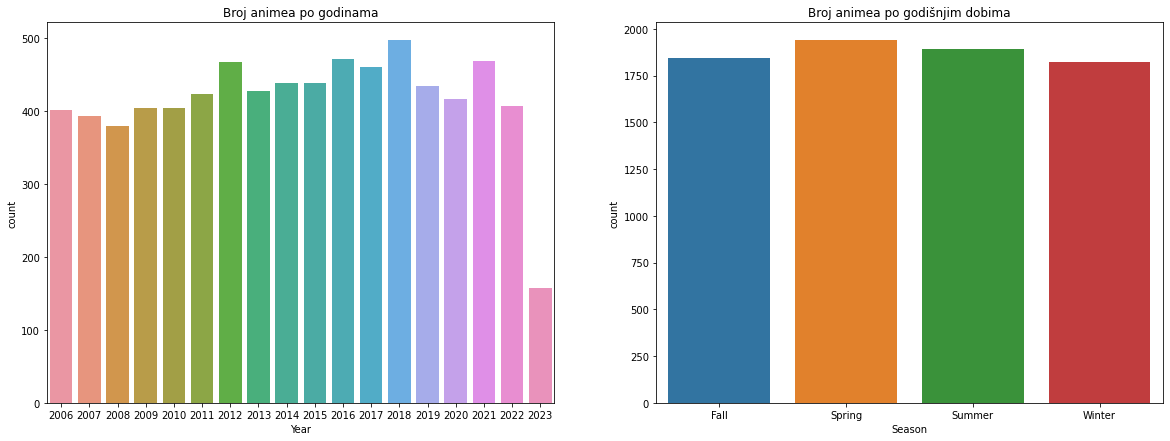

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 7))
sns.barplot(df['Year'], ax = axes[0])
sns.countplot(df['Season'], ax = axes[1])
axes[0].set_title("Broj animea po godinama")
axes[1].set_title("Broj animea po godišnjim dobima");

Možemo primijetiti da imamo otprilike podjednak broj Anime i po sezonama i po godini iz koje su izašli. Uzrok tome je što smo podatke uzimali sa stranice za top liste Anime. Možemo još primijetiti da je broj Anime u 2023. godini manji, ali to je zato što za nju ne postoje još svi podaci.

In [ ]:
format_count=pd.crosstab(index=df['Format'], columns='count')
format_count

col_0,count
Format,
Movie,1022
Music,2
ONA,762
OVA,780
Special,823
TV,3159
TV Short,945


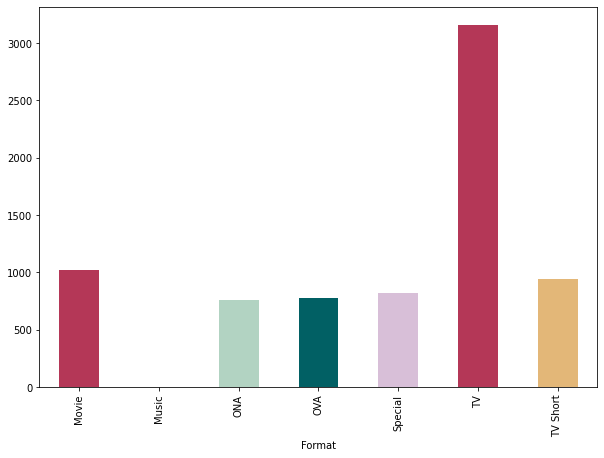

In [ ]:
format_count.plot(kind="bar", figsize=(10, 7), color={'count': ['#B43757', '#E3B778', '#B2D3C2', '#016064', '#D8BFD8']}, legend=False);

In [ ]:
#df.groupby('Year').Format.value_counts()
format_in_year = pd.crosstab(df['Year'], df['Format'])
format_in_year

Format,Movie,Music,ONA,OVA,Special,TV,TV Short
Year,,,,,,,
2006,38,0,11,52,47,224,30
2007,49,1,11,48,57,202,26
2008,32,0,19,50,70,173,35
2009,52,0,29,53,86,150,34
2010,56,0,24,79,80,130,35
2011,62,1,22,70,71,140,57
2012,58,0,39,78,80,165,48
2013,56,0,29,51,57,170,65
2014,62,0,17,50,37,201,71


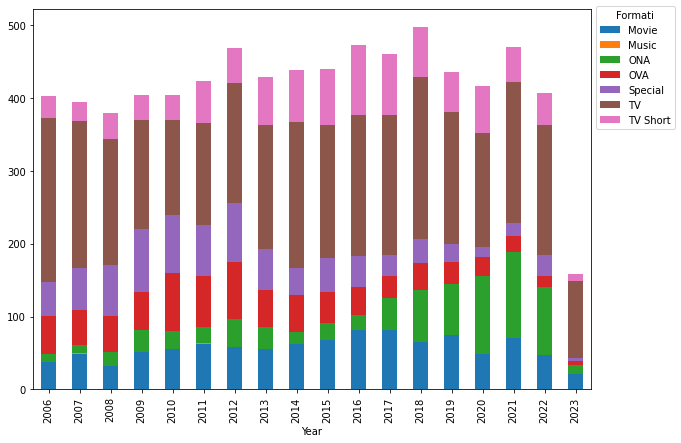

In [ ]:
plot = format_in_year.plot(kind="bar",stacked=True,figsize=(10, 7))
plot.legend(title='Formati', bbox_to_anchor=(1, 1.02),
         loc='upper left');

Možemo primijetiti da ima najviše Anime u TV formatu, najmanje u formatu glazbe, a ostalih ima otprilike podjednako. Isto tako možemo primijetiti da su po godinama slični omjeri broja formata Anime koji su izašli.

In [ ]:
status_count = pd.crosstab(index=df['Status'], columns='count')
status_count

col_0,count
Status,
Finished,7263
Not Yet Released,88
Releasing,142


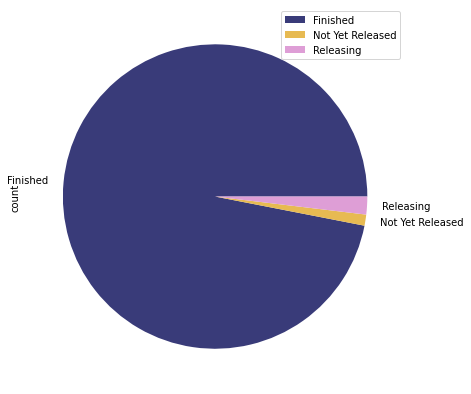

In [ ]:
status_count.plot(kind='pie', y='count', figsize=(7, 7), colormap='tab20b');

In [ ]:
status_in_year = pd.crosstab(df['Year'], df['Status'])
status_in_year

Status,Finished,Not Yet Released,Releasing
Year,,,
2006,402,0,0
2007,394,0,0
2008,379,0,0
2009,404,0,0
2010,402,0,2
2011,421,0,2
2012,466,0,2
2013,427,0,1
2014,437,0,1


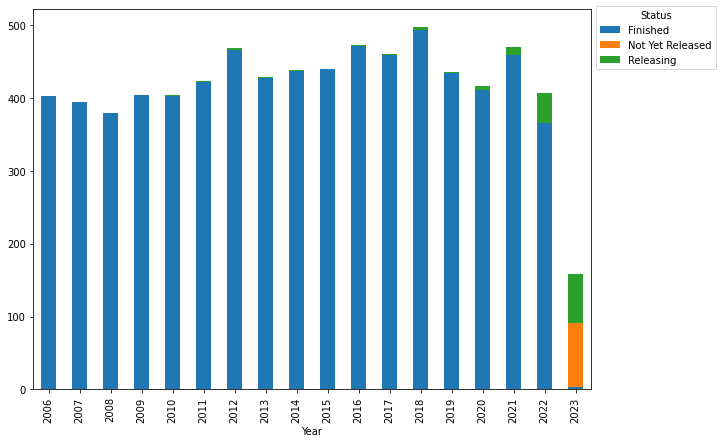

In [ ]:
plot = status_in_year.plot(kind="bar",stacked=True,figsize=(10, 7))
plot.legend(title='Status', bbox_to_anchor=(1, 1.02),
         loc='upper left');

Uglavnom svi Anime imaju status "završen". Kod onih anime koji su izašli prije 2023. godine i imaju drugačiji status, vjerojatno se zaboravio ažurirati status, a 2023. je tek počela pa je i očekivano da tu imamo malo drugačije stanje.

### 2. Koji je bio najpopularniji Anime koje godine?

In [ ]:
#popularnost po broju interakcija
pop_year=df.loc[df.groupby('Year')['Popularity'].idxmax()]
pop_year.reset_index(inplace=True)
pop_year[['Year','Title','Popularity']]

,Year,Title,Popularity
0,2006,DEATH NOTE,586966.0
1,2007,DEATH NOTE,586966.0
2,2008,Toradora!,359682.0
3,2009,Hagane no Renkinjutsushi: FULLMETAL ALCHEMIST,455071.0
4,2010,Angel Beats!,305719.0
5,2011,HUNTER×HUNTER (2011),529852.0
6,2012,HUNTER×HUNTER (2011),529852.0
7,2013,Shingeki no Kyojin,643352.0
8,2014,Tokyo Ghoul,472950.0
9,2015,One Punch Man,488758.0


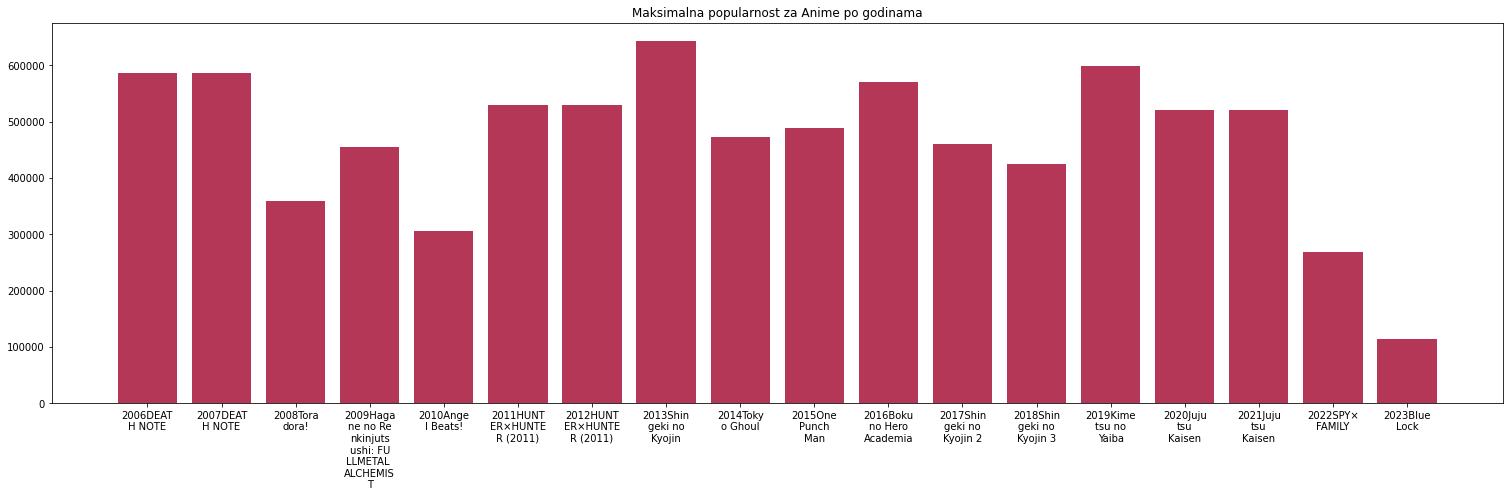

In [ ]:
from textwrap import wrap
pop_year['YearTitle'] = pop_year['Year'].apply(str)+pop_year['Title']
pop_year['YearTitle']= ['\n'.join(wrap(x, 8)) for x in  pop_year['YearTitle']]
fig, ax = plt.subplots(figsize=(26, 7))
ax.bar(pop_year['YearTitle'], pop_year['Popularity'], color='#B43757')
ax.set_title('Maksimalna popularnost za Anime po godinama')
plt.show();

In [ ]:
#popularnost po srednjoj ocjeni
pop_year=df.loc[df.groupby('Year')['MeanScore'].idxmax()]
pop_year.reset_index(inplace=True)
pop_year[['Year','Title','MeanScore']]

,Year,Title,MeanScore
0,2006,Mushishi,85.0
1,2007,Tengen Toppa Gurren Lagann,85.0
2,2008,CLANNAD: After Story,87.0
3,2009,Hagane no Renkinjutsushi: FULLMETAL ALCHEMIST,90.0
4,2010,Suzumiya Haruhi no Shoushitsu,86.0
5,2011,Steins;Gate,89.0
6,2012,HUNTER×HUNTER (2011),89.0
7,2013,Monogatari Series: Second Season,88.0
8,2014,Mushishi Zoku Shou,86.0
9,2015,Gintama°,91.0


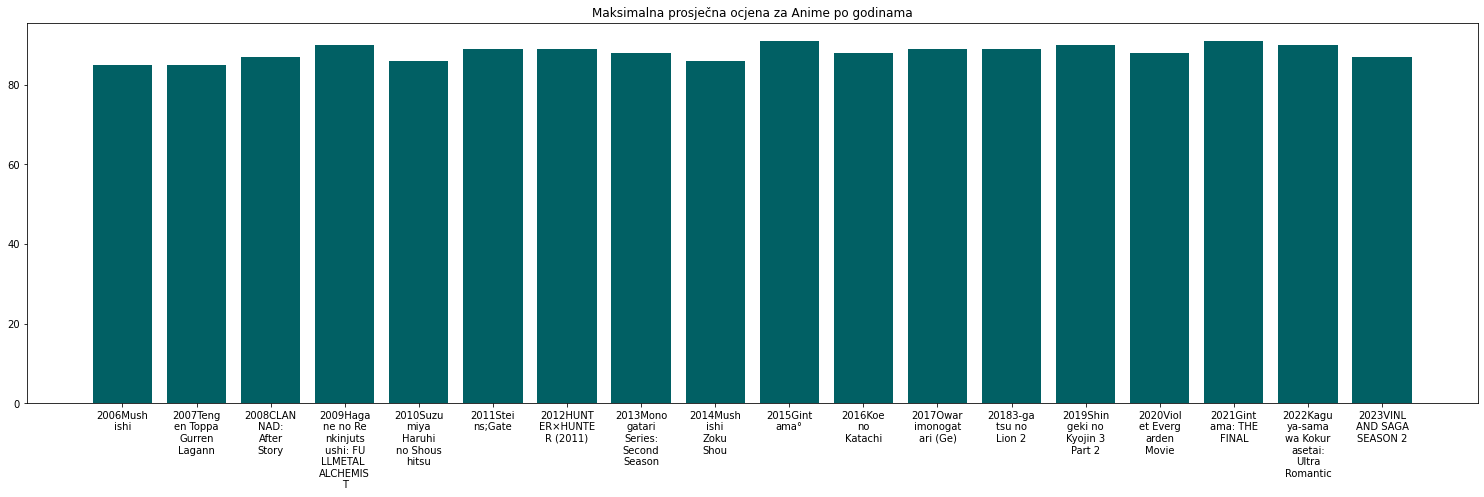

In [ ]:
pop_year['YearTitle'] = pop_year['Year'].apply(str)+pop_year['Title']
pop_year['YearTitle']= ['\n'.join(wrap(x, 8)) for x in  pop_year['YearTitle']]
fig, ax = plt.subplots(figsize=(26, 7))
ax.bar(pop_year['YearTitle'], pop_year['MeanScore'], color='#016064')
ax.set_title('Maksimalna prosječna ocjena za Anime po godinama')
plt.show();

In [ ]:
#popularnost po broju osoba koje su stavile osobe kao favorit
pop_year=df.loc[df.groupby('Year')['Favorites'].idxmax()]
pop_year.reset_index(inplace=True)
pop_year[['Year','Title','Favorites']]

,Year,Title,Favorites
0,2006,DEATH NOTE,35137.0
1,2007,DEATH NOTE,35137.0
2,2008,Toradora!,13586.0
3,2009,Hagane no Renkinjutsushi: FULLMETAL ALCHEMIST,41989.0
4,2010,Angel Beats!,8991.0
5,2011,HUNTER×HUNTER (2011),56743.0
6,2012,HUNTER×HUNTER (2011),56743.0
7,2013,Shingeki no Kyojin,44216.0
8,2014,Haikyuu!!,23803.0
9,2015,Shigatsu wa Kimi no Uso,21633.0


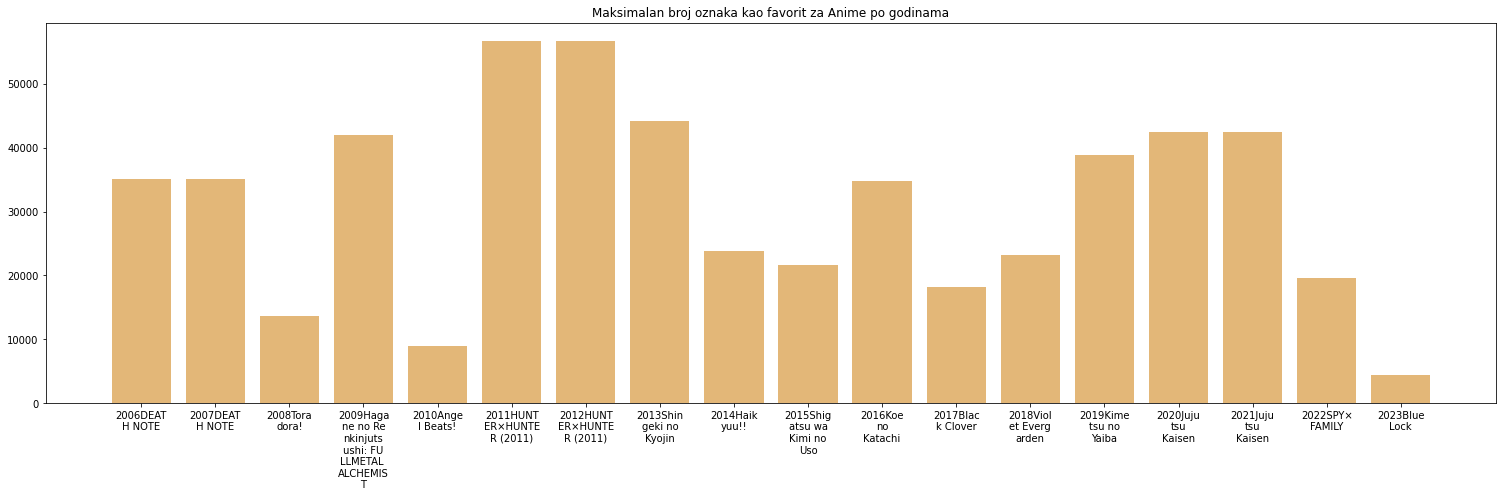

In [ ]:
pop_year['YearTitle'] = pop_year['Year'].apply(str)+pop_year['Title']
pop_year['YearTitle']= ['\n'.join(wrap(x, 8)) for x in  pop_year['YearTitle']]
fig, ax = plt.subplots(figsize=(26, 7))
ax.bar(pop_year['YearTitle'], pop_year['Favorites'], color='#E3B778' )
ax.set_title('Maksimalan broj oznaka kao favorit za Anime po godinama')
plt.show();

Iz gore prikazanih grafova možemo vidjeti da ovisno koju mjeru uzmemo za popularnost, dobit ćemo različite grafove. No, ako usporedimo nazive po favoritima i popularnosti, možemo uočiti da se neka imena ipak ponavljaju.

### 3. Produkcijske kuće


#### 3.1. Koja produkcijska kuća je općenito najaktivnija?

In [ ]:
max_active_studio=df['Studios'].value_counts().idxmax()
max_active=df['Studios'].value_counts().agg('max')

print(f'Općenito najaktivnija produkcijska kuća je: {max_active_studio}, a sveukupno je proizvela: {max_active} animea.')

Općenito najaktivnija produkcijska kuća je: J.C. Staff, a sveukupno je proizvela: 221 animea.


In [ ]:
#10 najaktivnijih produkcijskih kuca
active = df['Studios'].value_counts().nlargest(n=10)
active = pd.DataFrame(active)
active

,Studios
J.C. Staff,221
Toei Animation,207
Sunrise,195
Production I.G,184
A-1 Pictures,183
Studio DEEN,181
MADHOUSE,179
OLM,178
TMS Entertainment,168
bones,122


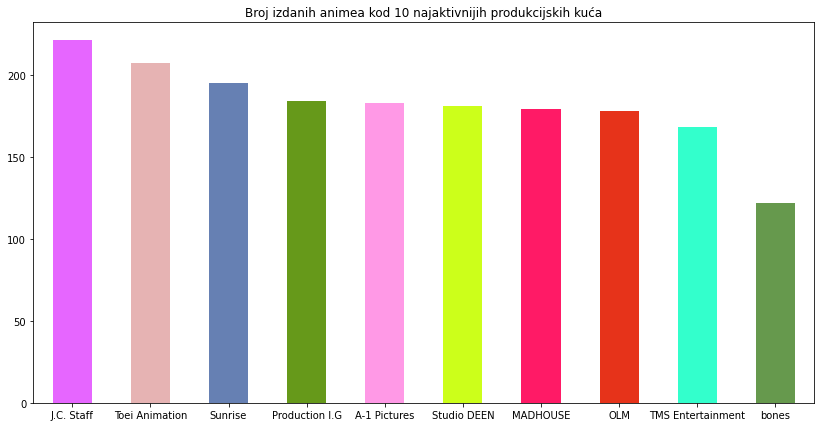

In [ ]:
active.plot(kind='bar', figsize=(14, 7), 
            title="Broj izdanih animea kod 10 najaktivnijih produkcijskih kuća", 
            rot=0, color={'Studios': ['#E666FF', '#E6B3B3', 
                                      '#6680B3', '#66991A', 
                                      '#FF99E6', '#CCFF1A', 
                                      '#FF1A66', '#E6331A', 
                                      '#33FFCC', '#66994D']},legend=False);

#### 3.2. Koja je produkcijska kuća bila najaktivnija koje godine?

In [ ]:
#koliko je koja produkcijska kuca izdala animea koje godine
pd.crosstab(df['Year'], df['Studios'], margins= True)

Studios,10GAUGE,33 Collective,5 Inc.,8-bit,A-1 Pictures,A-Real,A.C.G.T.,AIC,AIC A.S.T.A.,AIC Build,AIC Frontier,AIC Plus+,AIC Spirits,ALBACROW,APPP,AQUA ARIS,AXsiZ,Acca effe,Actas,Adnero,Ajiado,Akatsuki,Amineworks,An DerCen,Anima&Co.,Animation Planet,Anpro,Arect,Arms,Artland,Arvo Animation,Asahi Production,Ascension,Ashi Productions,Asread,Asura Film,Atelier Pontdarc,Automatic Flowers Studio,BAKKEN RECORD,BLADE,BUG FILMS,Bandai Namco Pictures,Barnum Studio,Bee Media,Bee Train,Benesse Corporation,Bibury Animation CG,Bibury Animation Studios,Bouncy,Brain's Base,Bridge,Buemon,C-Station,C2C,CALF,CLAP,CLOUDHEARTS,CONNECT,Chaos Project,Charaction,Children's Playground Creative,Children's Playground Entertainment,ChuChu,CloverWorks,CoMix Wave,Colored Pencil Animation Japan,Cover Corp,Craftar,Creators in Pack,Cyclone Graphics,CygamesPictures,DAX Production,DLE,DMM.futureworks,Daewon Media,Dandelion Animation Studio,Daume,David Production,Digital Frontier,Digital Media Lab,Digital Network Animation,Directions,Doga Kobo,Domerica,Dongwoo Animation,Drive,Durufix,Dwango,Dynamo Pictures,EKACHI EPILKA,EMT Squared,ENGI,ENISHIYA Inc.,EXNOA,East Fish Studio,Egg,Eiken,Ekura Animal,Encourage Films,Ezo’la,FIREBUG,FLAGSHIP LINE,FLAT STUDIO,Fanworks,Felix Film,Flying Ship Studio,Fortes,Four Some,Frontier Works,G&G Entertainment,G-angle,GAINAX Kyoto,GEEKTOYS,GEMBA,GIFTanimation,GONZO,GYORAI EIZO,Gaina,Gainax,Gambit,Gathering,Geidai Animation,Genco,Geno Studio,GoHands,Gosay Studio,Graphinica,Group TAC,HS Pictures Studio,Hal Film Maker,Haoliners Animation,Heartbit,Helo,Hoods Entertainment,Horipro,Hot Zipang,Hotline,I.G Zwei,I.Toon,ILCA,Imagica,Imagica Lab.,Imagineer,Infinite,Ishimori Entertainment,J.C. Staff,Jade Animation,Jichitai Anime,Jinnan Studio,Jinni's Animation Studios,Joker Films,Jumondou,Juumonji,KAGAYA Studio,Kachidoki Studio,Kamikaze Douga,Kanaban Graphics,Keica,Kenji Studio,Kigumi,Kinema Citrus,Koo-Ki,Kyoto Animation,Kyotoma,LIDENFILMS,LIDENFILMS Kyoto Studio,LMD,LandQ studios,Lantis,Lapin Track,Larx Entertainment,Lay-duce,Lerche,Lesprit,Lide,Lilix,Live2D Creative Studio,M.S.C,MADHOUSE,MAPPA,MMDGP,Magia Doraglier,Magic Bus,Maho Film,Makaria,Manglobe,Marvy Jack,Marza Animation Planet,Master Lights,Media Factory,Milky Cartoon,Millepensee,Minami Machi Bugyousho,Mirai Film,Monster's Egg,MooGoo,Mook Animation,Mushi Production,NAS,NAZ,NEXT Animation Studio,NHK,NOKID,NUT,Neft Film,Nexus,Nippon Animation,No Side,Nomad,ODDJOB,OLM,OZ,Okuruto Noboru,Opera House,Orange,Ordet,P.A. Works,P.I.C.S.,PINE JAM,POLYGON PICTURES,PPM,PRA,Palm Studio,Passione,Picona Creative Studio,Picsys,Pie in the sky,Pili International Multimedia,Piso Studio,Planet Cartoon,Platinum Vision,Plott,Pollyanna Graphics Inc,Polygon Magic,PrimeTime,Production +h,Production I.G,Production IMS,Purple Cow Studio Japan,Quad,Qualia Animation,Qubic Pictures,Quebico,RAMS,REVOROOT,Radix,Remic,Rikuentai,Rising Force,Robot,SANZIGEN,SILVER LINK.,STEVE N' STEVEN,STUDIO 6'oN,STUDIO SOTA,Saetta,Sakura Create,Satelight,Science SARU,Scooter Films,Sega Games,Seven,Seven Arcs,Seven Stone Entertainment,Shaft,Shin-Ei Animation,Shirogumi,Shogakukan Music & Digital Entertainment,Shogakukan-Shueisha Productions,Shuka,Signal.MD,Sola Digital Arts,Sorajima Studio,Sovat Theater,Soyep,Space Neko Company,Sparky Animation,Speed,Spell Bound,Sprite Animation Studios,Square Enix,Staple Entertainment,Stella Promotion,Stingray,Strawberry Meets Pictures,Studio 3Hz,Studio 4°C,Studio Anima,Studio Bind,Studio Blanc,Studio Chizu,Studio Colorido,Studio Comet,Studio Crocodile,Studio DEEN,Studio Dice,Studio Fantasia,Studio Flad,Studio G-1Neo,Studio Gallop,Studio Ghibli,Studio Gokumi,Studio Hibari,Studio KAI,Studio Kafka,Studio Kelmadick,Studio Khara,Studio LAN,Studio M2,Studio Massket,Studio Pierrot,Studio Ponoc,Studio PuYUKAI,Studio Rikka,Studio Saki Makura,Studio Signpost,Studio Silver,Studio VOLN,Studio elle,Studio! Cucuri,Sublimation,Sunrise,Sunrise Beyond,Sunshine Corporation,Super Normal Studio,SynergySP,TANOism,TECARAT

In [ ]:
# koje godine je koja produkcijska kuca izdala najvise animea
n_anime_studios=pd.DataFrame(df.groupby(['Year']).apply(lambda x: x['Studios'].value_counts().index[0]))
n_anime_studios = pd.concat([n_anime_studios,df.groupby(['Year']).apply(lambda x: x['Studios'].value_counts().max())], axis=1).reset_index()
n_anime_studios.columns=['Year', 'Studios', 'nAnime']
n_anime_studios

,Year,Studios,nAnime
0,2006,MADHOUSE,21
1,2007,MADHOUSE,20
2,2008,MADHOUSE,21
3,2009,MADHOUSE,20
4,2010,J.C. Staff,17
5,2011,bones,14
6,2012,Sunrise,19
7,2013,Sunrise,19
8,2014,A-1 Pictures,24
9,2015,A-1 Pictures,21


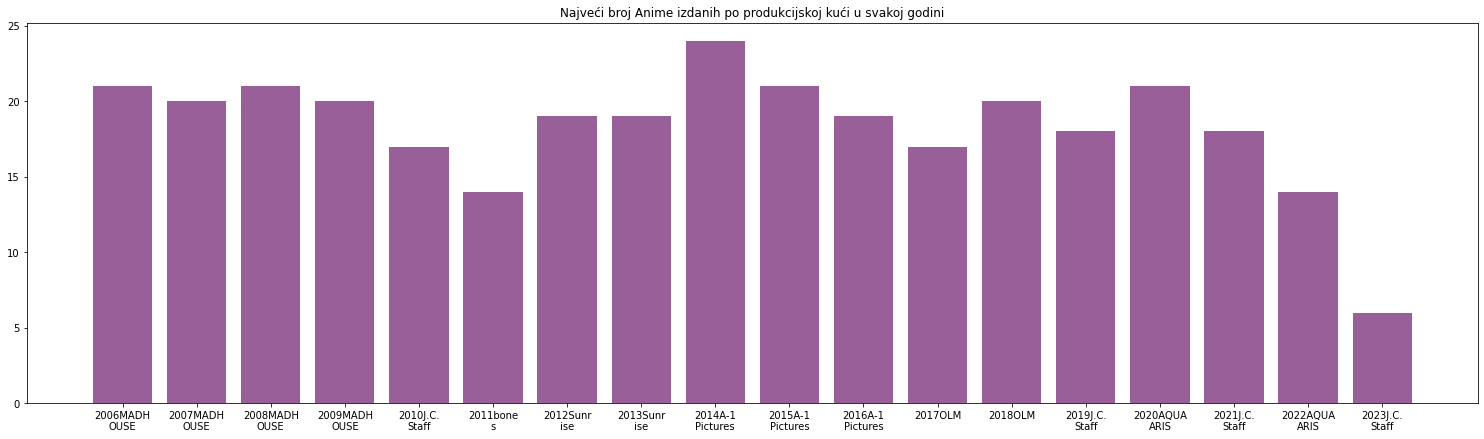

In [ ]:
n_anime_studios['YearStudios'] = n_anime_studios['Year'].apply(str)+n_anime_studios['Studios']
n_anime_studios['YearStudios']= ['\n'.join(wrap(x, 8)) for x in  n_anime_studios['YearStudios']]
fig, ax = plt.subplots(figsize=(26, 7))
ax.bar(n_anime_studios['YearStudios'], n_anime_studios['nAnime'], color='#985f99')
ax.set_title('Najveći broj Anime izdanih po produkcijskoj kući u svakoj godini')
plt.show();

#### 3.3. Koja produkcijska kuća ima najpopularniji Anime (10 najpoluarnijih anime)?

In [ ]:
#najpopularniji anime
pop_anime_studios=df.groupby('Studios').apply(lambda x: x.Popularity.sum()).reset_index()
pop_anime_studios.rename(columns={0:'Popularity'}, inplace=True )
pop_anime_studios_st=pop_anime_studios.loc[pop_anime_studios.Popularity.idxmax()].Studios
pop_anime_studios_pop=pop_anime_studios.loc[pop_anime_studios.Popularity.idxmax()].Popularity
print(f'Najpopularniji studio je {pop_anime_studios_st} s popularnošću od {pop_anime_studios_pop} što ćini {pop_anime_studios_pop/pop_anime_studios.Popularity.sum().round(3)} %')

Najpopularniji studio je A-1 Pictures s popularnošću od 12520523.0 što ćini 0.07288801775175228 %


In [ ]:
# 10 najpopularnijih anime studia
popular_studios = df.groupby('Studios').apply(lambda x: x.Popularity.sum()).nlargest(n=10).reset_index()
popular_studios.rename(columns={0:'Popularity'}, inplace=True )
popular_studios

,Studios,Popularity
0,A-1 Pictures,12520523.0
1,bones,10559598.0
2,J.C. Staff,10193354.0
3,MADHOUSE,9677081.0
4,Production I.G,6823882.0
5,Kyoto Animation,6378455.0
6,MAPPA,5443557.0
7,Wit Studio,5437544.0
8,Studio Pierrot,4544392.0
9,White Fox,4434071.0


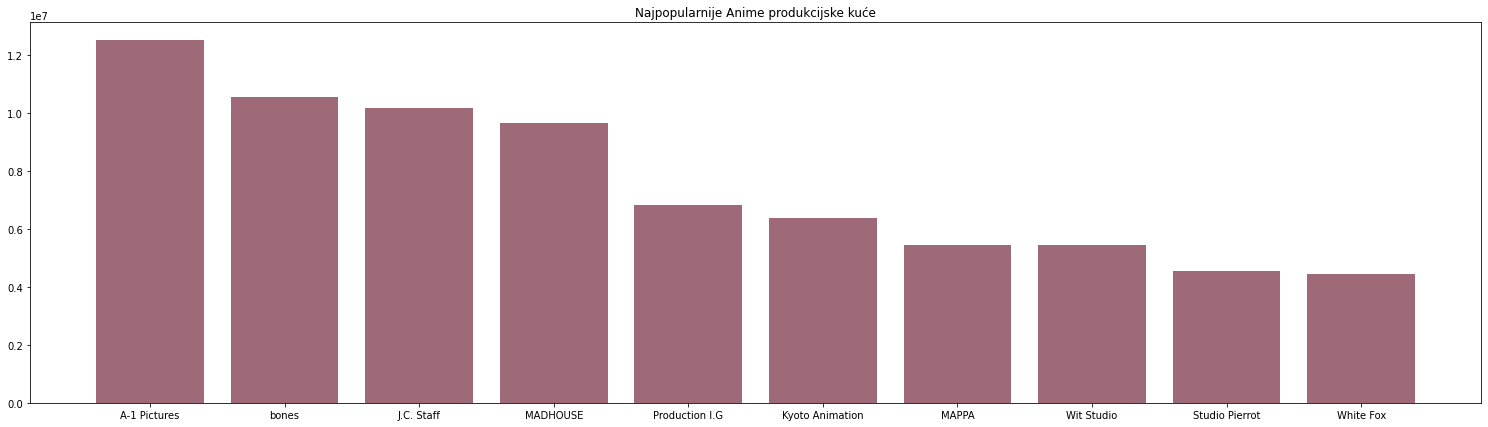

In [ ]:
fig, ax = plt.subplots(figsize=(26, 7))
ax.bar(popular_studios['Studios'], popular_studios['Popularity'], color='#9e6a78')
ax.set_title('Najpopularnije Anime produkcijske kuće')
plt.show();

#### 3.4. Koja je produkcijska kuća bila najpopularnija koje godine?

In [ ]:
#najpopularniji studio svake godine
pop_studio_year=df.groupby(['Year', 'Studios']).apply(lambda x: x.Popularity.sum()).reset_index()
pop_studio_year.rename(columns={0:'Popularity'}, inplace=True)
pop_studio_year=pop_studio_year.loc[pop_studio_year.groupby('Year').Popularity.idxmax()]
pop_studio_year

,Year,Studios,Popularity
21,2006,MADHOUSE,1456638.0
92,2007,MADHOUSE,917535.0
146,2008,J.C. Staff,679596.0
253,2009,bones,1047910.0
282,2010,J.C. Staff,800484.0
332,2011,A-1 Pictures,1028675.0
406,2012,A-1 Pictures,1360720.0
572,2013,Wit Studio,1412445.0
582,2014,A-1 Pictures,2052749.0
727,2015,MADHOUSE,1519290.0


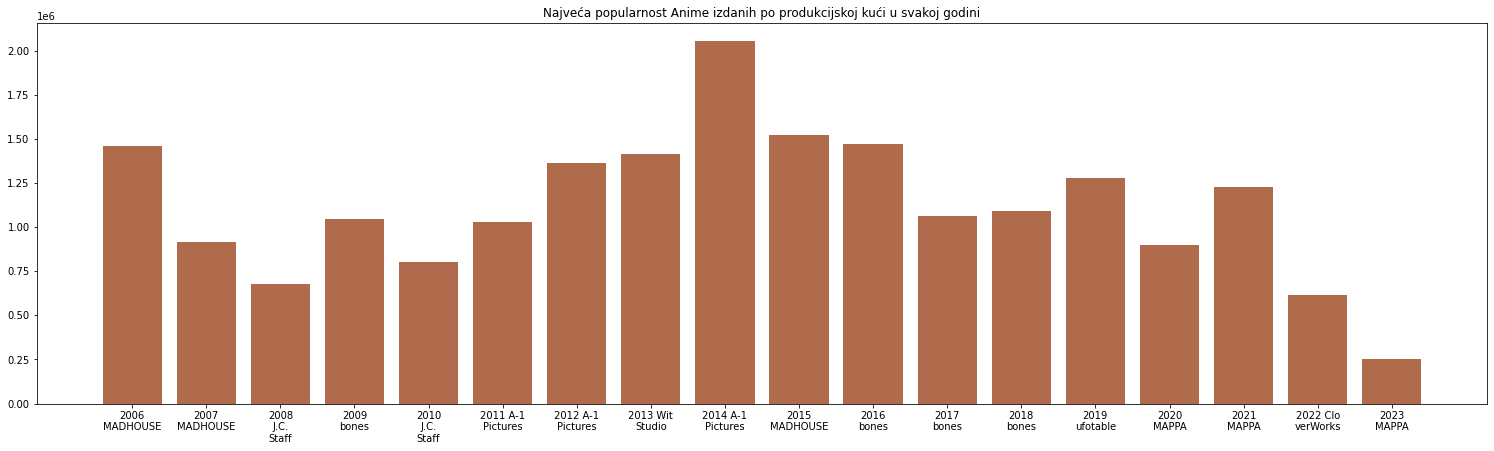

In [ ]:
pop_studio_year['YearStudios'] = pop_studio_year['Year'].apply(str)+' '+pop_studio_year['Studios'].astype('object')
pop_studio_year['YearStudios']= ['\n'.join(wrap(x, 8)) for x in  pop_studio_year['YearStudios']]
fig, ax = plt.subplots(figsize=(26, 7))
ax.bar(pop_studio_year['YearStudios'], pop_studio_year['Popularity'], color='#b06b4c')
ax.set_title('Najveća popularnost Anime izdanih po produkcijskoj kući u svakoj godini')
plt.show();

#### 3.5. Koja produkcijska kuća radi TV animee s prosjećno najvećim brojem epizoda?

In [ ]:
mean_st_ep = df[df['Format'] == 'TV'].groupby('Studios')['Episodes'].mean().reset_index()
mean_st_ep = mean_st_ep.loc[mean_st_ep['Episodes'].idxmax()]
print(f'Studio koji radi TV anime koji imaju najduže epizode je {mean_st_ep.Studios}, a prosječno vrijeme trajanja je: {mean_st_ep.Episodes}')
# mean_st_ep

Studio koji radi TV anime koji imaju najduže epizode je Tomason, a prosječno vrijeme trajanja je: 125.6


In [ ]:
mean_st_ep = df[df['Format'] == 'TV'].groupby('Studios').apply(lambda x: (x['Episodes']*x['EpisodeDuration']).mean()).reset_index()
mean_st_ep.rename(columns={0:'Mean'}, inplace=True )
mean_st_ep = mean_st_ep.loc[mean_st_ep['Mean'].idxmax()]
print(f'Studio koji radi TV anime koji u prosjeku ima najduži anime {mean_st_ep.Studios}, a prosječno ukupno vrijeme trajanja je: {mean_st_ep.Mean}')
# mean_st_ep

Studio koji radi TV anime koji u prosjeku ima najduži anime Tomason, a prosječno ukupno vrijeme trajanja je: 2972.0


#### 3.6. Što je najčešća inspiracija 10 najpopularnijih produkcijskih kuća i u kojem formatu?

In [ ]:
list_studios=popular_studios.Studios.tolist()
popular_studio_all = df[df['Studios'].isin(list_studios)]
inspo_studio=pd.crosstab(popular_studio_all['Studios'], popular_studio_all['Source'])
pd.crosstab(popular_studio_all['Studios'], popular_studio_all['Source'], margins=True)

Source,Anime,Comic,Light Novel,Live Action,Manga,Multimedia Project,Novel,Original,Other,Video Game,Visual Novel,All
Studios,,,,,,,,,,,,
A-1 Pictures,0,0,36,0,70,1,4,31,5,29,7,183
J.C. Staff,0,0,60,0,110,0,0,16,16,9,8,219
Kyoto Animation,0,0,40,0,24,0,7,20,1,0,8,100
MADHOUSE,0,6,27,2,88,1,9,19,17,4,3,176
MAPPA,0,0,1,2,40,0,0,14,6,5,0,68
Production I.G,2,0,3,0,96,0,15,42,3,12,2,175
Studio Pierrot,0,0,2,0,58,0,0,18,1,7,0,86
White Fox,0,0,12,0,11,0,0,6,0,0,12,41
Wit Studio,0,0,1,0,39,0,1,16,0,1,0,58


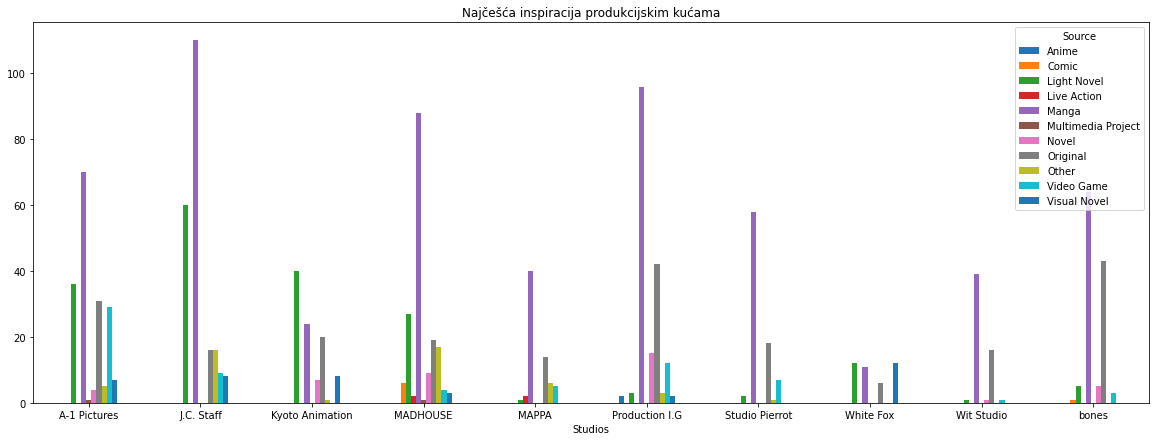

In [ ]:
inspo_studio.plot(kind='bar',figsize=(20, 7), title='Najčešća inspiracija produkcijskim kućama', rot=0)
plot.legend(title='Source', bbox_to_anchor=(1, 1.02), 
         loc='upper right');

In [ ]:
pd.crosstab(popular_studio_all['Source'], [popular_studio_all['Studios'], popular_studio_all['Format']], margins=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/reshape/pivot.py:188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agged[v] = maybe_downcast_to_dtype(agged[v], data[v].dtype)


Studios            A-1 Pictures                               J.C. Staff      \
Format                    Movie ONA OVA Special   TV TV Short      Movie ONA   
Source                                                                         
Anime                         0   0   0       0    0        0          0   0   
Comic                         0   0   0       0    0        0          0   0   
Light Novel                   2   1   1       6   26        0          3   0   
Live Action                   0   0   0       0    0        0          0   0   
Manga                         7   1   7       5   50        0          2   7   
Multimedia Project            0   0   0       0    1        0          0   0   
Novel                         1   0   0       0    3        0          0   0   
Original                      7   1   1       3   17        2          5   0   
Other                         0   0   1       0    4        0          0   0   
Video Game                    6   2   3       5   13        0          0   1   
Visual Novel                  0   0   0       1    6        0          1   0   
All                          23   5  13      20  120        2         11   8   

Studios                                      Kyoto Animation                  \
Format             OVA Special   TV TV Short           Movie ONA OVA Special   
Source                                                                         
Anime                0       0    0        0               0   0   0       0   
Comic                0       0    0        0               0   0   0       0   
Light Novel          7       1   49        0               8   3   8       7   
Live Action          0       0    0        0               0   0   0       0   
Manga               16      10   73        2               2   4   8       1   
Multimedia Project   0       0    0        0               0   0   0       0   
Novel                0       0    0        0               4   0   1       0   
Original             1       0   10        0               7   0   4       5   
Other                1       2   12        1               0   0   0       1   
Video Game           0       1    7        0               0   0   0       0   
Visual Novel         1       1    5        0               0   0   2       0   
All                 26      15  156        3              21   7  23      14   

Studios                MADHOUSE                           MAPPA          \
Format              TV    Movie OVA Special   TV TV Short Movie ONA OVA   
Source                                                                    
Anime                0        0   0       0    0        0     0   0   0   
Comic                0        1   1       0    4        0     0   0   0   
Light Novel         14        4   1       2   20        0     0   0   0   
Live Action          0        0   2       0    0        0     0   0   0   
Manga                9        6   8       3   68        3     3   1   2   
Multimedia Project   0        0   0       0    1        0     0   0   0   
Novel                2        4   0       2    3        0     0   0   0   
Original             4        6   0       0   13        0     0   1   0   
Other                0        2   0       2   11        2     1   1   0   
Video Game           0        0   0       0    4        0     0   0   0   
Visual Novel         6        0   0       0    3        0     0   0   0   
All                 35       23  12       9  127        5     4   3   2   

Studios                                 Production I.G                      \
Format             Special  TV TV Short          Movie ONA OVA Special  TV   
Source                                                                       
Anime                    0   0        0              0   0   0       0   2   
Comic                    0   0        0              0   0   0       0   0   
Light Novel              0   1        0              1   0   1       0   1   
Live

### 4. Koji je najčešći žanr? Koji je najpopularniji žanr? Kako se popularnost žanrova mijenjala kroz godine? 

In [ ]:
# prebroji zanrove
df2['Genre'].value_counts().reset_index()

,index,Genre
0,Comedy,3707
1,Action,2405
2,Fantasy,1782
3,Slice of Life,1483
4,Drama,1446
5,Adventure,1329
6,Sci-Fi,1197
7,Romance,1190
8,Supernatural,1041
9,Ecchi,593


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


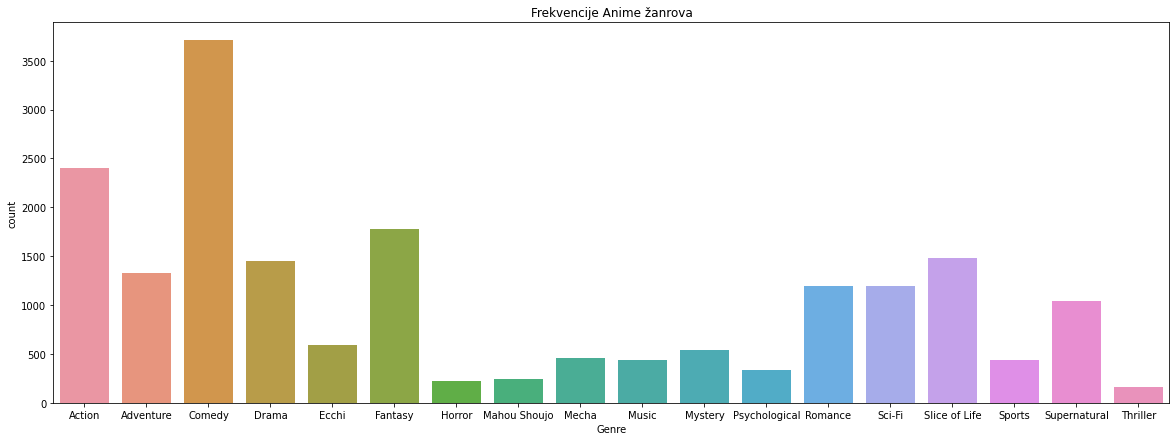

In [ ]:
fig, ax = plt.subplots(figsize=(20, 7))
sns.countplot(df2['Genre'])
ax.set_title("Frekvencije Anime žanrova");

Možemo primjetiti da je komedija najčešći žanr za Anime.

In [ ]:
genre_popularity = df2.groupby('Genre').apply(lambda x: x.Popularity.sum()).reset_index()
genre_popularity.rename(columns={0:'Popularity'}, inplace=True)
genre_popularity

,Genre,Popularity
0,Action,89531353.0
1,Adventure,45804652.0
2,Comedy,83986092.0
3,Drama,71825011.0
4,Ecchi,18819649.0
5,Fantasy,56799550.0
6,Horror,9769435.0
7,Mahou Shoujo,1936515.0
8,Mecha,7125353.0
9,Music,5557199.0


In [ ]:
colors=['#3366CC','#DC3912','#FF9900','#109618',
        '#990099','#3B3EAC','#0099C6','#DD4477',
        '#66AA00','#B82E2E','#316395','#994499',
        '#22AA99','#AAAA11','#6633CC','#E67300',
        '#8B0707', '#329262']

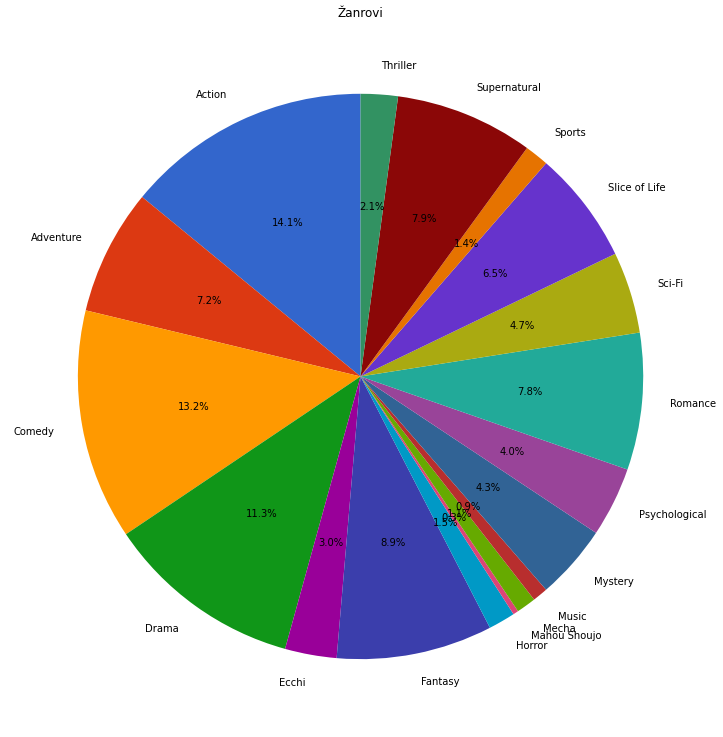

In [ ]:
fig, ax = plt.subplots(figsize=(13,13))
ax.pie(genre_popularity['Popularity'], labels=genre_popularity['Genre'], colors=colors, startangle = 90, autopct='%1.1f%%')
ax.set_title('Žanrovi');

Iz tortnog dijagrama možemo zaključiti da je najpopularniji žanr "Akcija".

In [ ]:
pd.crosstab(df2['Year'], df2['Genre'], margins= True)

Genre,Action,Adventure,Comedy,Drama,Ecchi,Fantasy,Horror,Mahou Shoujo,Mecha,Music,Mystery,Psychological,Romance,Sci-Fi,Slice of Life,Sports,Supernatural,Thriller,All
Year,,,,,,,,,,,,,,,,,,,
2006,105,106,196,113,26,110,22,16,35,7,31,23,100,83,46,13,55,10,1097
2007,124,88,182,108,27,114,19,13,46,11,34,17,81,75,40,18,47,9,1053
2008,134,66,192,68,37,81,13,10,21,8,33,17,74,82,43,9,54,13,955
2009,115,78,214,67,41,76,8,9,27,14,25,16,69,70,56,24,40,12,961
2010,115,59,230,57,46,70,9,13,24,13,25,10,58,63,52,18,57,7,926
2011,140,53,225,64,48,70,10,15,24,13,28,15,64,57,62,21,78,8,995
2012,147,78,229,76,42,86,21,14,25,16,33,17,93,73,81,27,57,7,1122
2013,127,50,221,70,41,97,6,15,34,18,27,14,76,52,88,28,52,8,1024
2014,142,73,223,60,41,110,8,15,30,24,30,28,74,60,89,30,63,7,1107


In [ ]:
year_genre=pd.DataFrame(df2.groupby(['Year']).apply(lambda x: x['Genre'].value_counts().index[0]))
pd.concat([year_genre, df2.groupby(['Year']).apply(lambda x: x['Genre'].value_counts().max())], axis=1)

,0,0
Year,,
2006,Comedy,196
2007,Comedy,182
2008,Comedy,192
2009,Comedy,214
2010,Comedy,230
2011,Comedy,225
2012,Comedy,229
2013,Comedy,221
2014,Comedy,223


### 5. Mijenja li se broj epizoda i trajanje epizoda kroz vrijeme? Kako se kreće trajanje epizode i broj epizoda po formatima?

In [ ]:
ep_in_time=df.groupby('Year')[['Episodes', 'EpisodeDuration']].mean().reset_index()
ep_in_time

,Year,Episodes,EpisodeDuration
0,2006,21.947761,23.398352
1,2007,19.302030,22.973913
2,2008,18.226913,20.919308
3,2009,17.235149,18.968750
4,2010,13.336216,18.010109
5,2011,18.143154,17.214731
6,2012,15.236227,17.686041
7,2013,16.809059,18.049779
8,2014,18.210678,19.180210
9,2015,14.658314,18.098431


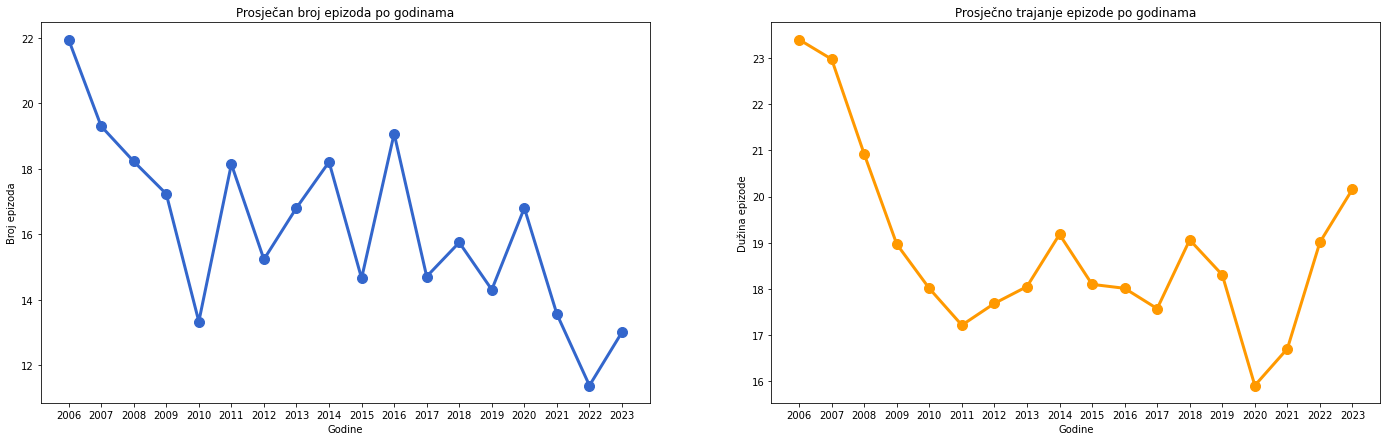

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(24,7))
axes[0].plot(ep_in_time['Year'].apply(str), ep_in_time['Episodes'], linewidth=3.0, color=colors[0], marker='.', markersize=20);
axes[1].plot(ep_in_time['Year'].apply(str), ep_in_time['EpisodeDuration'], linewidth=3.0, color=colors[2], marker='.', markersize=20);
axes[0].set_title("Prosječan broj epizoda po godinama")
axes[0].set_xlabel('Godine')
axes[0].set_ylabel('Broj epizoda')
axes[1].set_title("Prosječno trajanje epizode po godinama")
axes[1].set_xlabel('Godine')
axes[1].set_ylabel('Dužina epizode');

Iz gore prikazanih grafova možemo vidjeti da se prosječan broj epizoda smanjio zadnjih par godina, a dužina epizoda se odavno smanjila. Najveći pad prosječne dužine epizode vidimo u 2020. godini, ali isto tako i povećanje broja epizoda. Ovo je vjerojatno nastalo jer su produkcijske kuće htjele "udovoljiti" korisnicima češće izbacujući epizode, ali kraće jer su svi uglavnom te godine bili doma i imali su priliku redovito pratiti serije, filmove...

In [ ]:
ep_format=df.groupby('Format')[['Episodes', 'EpisodeDuration']].mean().reset_index()
ep_format.sort_values(by=['Episodes', 'EpisodeDuration'], ascending=False, inplace=True)
ep_format

,Format,Episodes,EpisodeDuration
6,TV Short,30.648424,5.661745
5,TV,24.215789,23.725400
2,ONA,13.886018,10.010418
4,Special,3.550425,15.936611
3,OVA,2.427634,26.073833
0,Movie,1.081756,NaN
1,Music,1.000000,4.500000


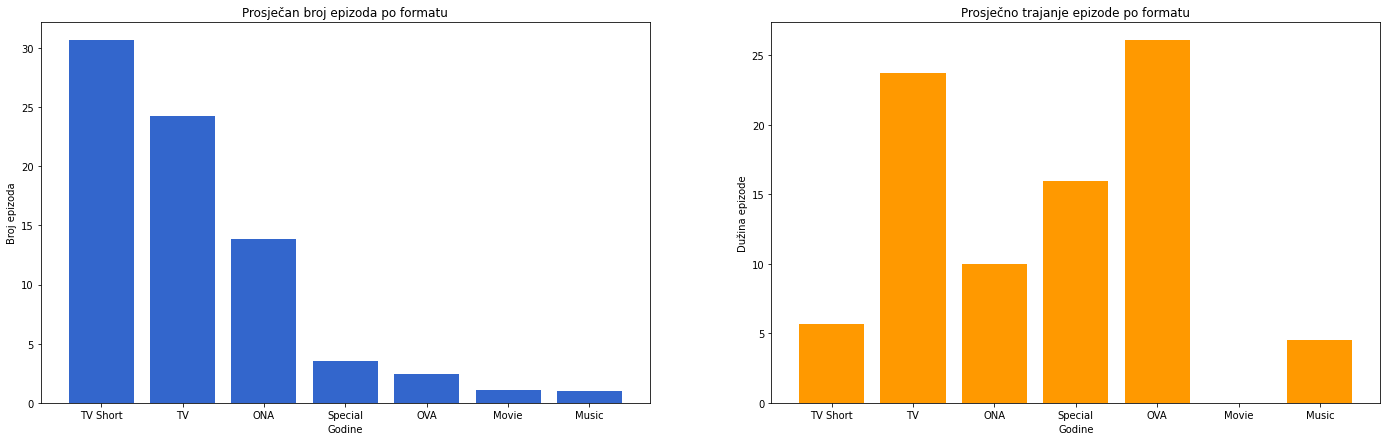

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(24,7))
axes[0].bar(ep_format['Format'], ep_format['Episodes'], color=colors[0]);
axes[1].bar(ep_format['Format'].apply(str), ep_format['EpisodeDuration'], color=colors[2]);
axes[0].set_title("Prosječan broj epizoda po formatu")
axes[0].set_xlabel('Godine')
axes[0].set_ylabel('Broj epizoda')
axes[1].set_title("Prosječno trajanje epizode po formatu")
axes[1].set_xlabel('Godine')
axes[1].set_ylabel('Dužina epizode');

### 6. Koji se anime trenutno najviše prati? Kod kojeg animea je najviše korisnika odustalo od gledanja, kod kojeg se najviše završilo gledanje?

In [ ]:
curr_pop = df.loc[df['Current'].idxmax()]
print(f'Trenutno se najviše prati {curr_pop.Title}, a prati ga {curr_pop.Current} ljudi. Kao favorita označilo ga je {curr_pop.Favorites} ljudi.')
## nacrtaj njegov curr, comp planning

Trenutno se najviše prati Black Clover, a prati ga 78325.0 ljudi. Kao favorita označilo ga je 18246.0 ljudi.


In [ ]:
##izbacivanje duplikata
df3 = df
df3.drop_duplicates(subset=['Link'], keep='first', ignore_index=True, inplace=True)

In [ ]:
#20 trenutno koji se najvise gledaju
current_most = df3['Current'].nlargest(n=20).reset_index()
current_most.rename(columns={'index':'Position'}, inplace=True)
current_most
current_anime = df3.loc[current_most.Position]['Title'].reset_index()
current_anime = pd.concat([current_anime, current_most], axis=1).drop(['Position', 'index'], axis=1)
current_anime

,Title,Current
0,Black Clover,78325.0
1,HUNTER×HUNTER (2011),75600.0
2,Chainsaw Man,71319.0
3,Jujutsu Kaisen,65660.0
4,Boku no Hero Academia 5,54368.0
5,Tokyo Revengers,49725.0
6,Shingeki no Kyojin: The Final Season,49254.0
7,Kimetsu no Yaiba,48122.0
8,SPY×FAMILY Part 2,41534.0
9,SPY×FAMILY,41516.0


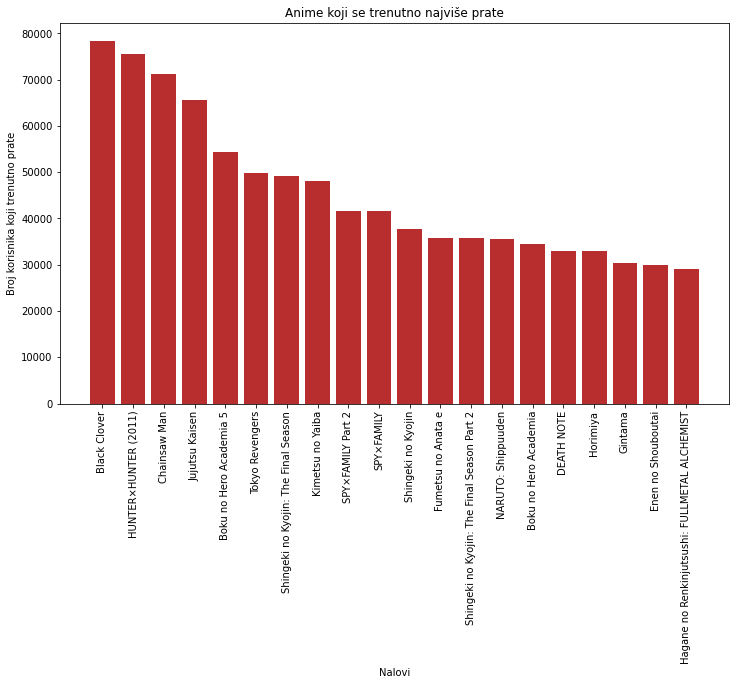

In [ ]:
fig, ax = plt.subplots(figsize=(12,7))
ax.bar(current_anime['Title'], current_anime['Current'], color=colors[9])
ax.set_title("Anime koji se trenutno najviše prate")
ax.set_xlabel('Nalovi')
ax.set_ylabel('Broj korisnika koji trenutno prate')
ax.tick_params(axis='x', labelrotation = 90);

In [ ]:
most_dropped = df.loc[(df['Dropped']/df['Popularity']).idxmax()] 
percent_most_dropped = ((df['Dropped']/df['Popularity']).max())*100
print(f'Najviše se odustajalo od animea {most_dropped.Title} i to {round(percent_most_dropped, 2)}% korisnika je odustalo od gledanja.')

Najviše se odustajalo od animea Deluxe da yo! Kaishain i to 19.05% korisnika je odustalo od gledanja.


In [ ]:
#10 anime od kojih se najvise odustajalo
indx_dropped = (round(df3['Dropped']/df3['Popularity']*100,2)).nlargest(n=10).reset_index()
indx_dropped.rename(columns={'index':'Position', 0: 'Percentage'}, inplace=True )
titles_dropped = df3.loc[indx_dropped.Position][['Title']].reset_index()
dropped_anime = pd.concat([titles_dropped, indx_dropped], axis=1).drop(['index', 'Position'], axis=1)
dropped_anime

,Title,Percentage
0,Deluxe da yo! Kaishain,19.05
1,BONOBONO (2016),18.44
2,Human Bug Daigaku,17.92
3,Shadowverse,17.82
4,Chiisana Oji-san,17.65
5,BABY-HAMITANG,16.13
6,Seiken Densetsu: Legend of Mana - The Teardrop...,16.07
7,"Ore, Tsushima (ONA)",16.06
8,Digimon Adventure:,15.87
9,Duel Masters King Max,15.82


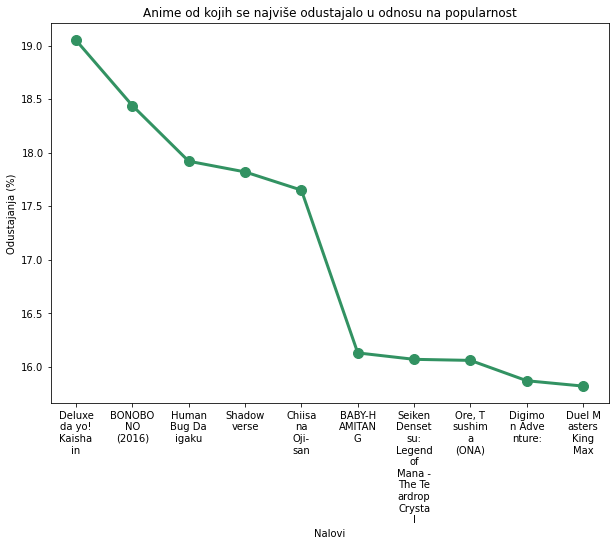

In [ ]:
dropped_anime['Title']= ['\n'.join(wrap(x, 6)) for x in  dropped_anime['Title']]
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(dropped_anime['Title'], dropped_anime['Percentage'], color=colors[17], linewidth=3.0, marker='.', markersize=20)
ax.set_title("Anime od kojih se najviše odustajalo u odnosu na popularnost")
ax.set_xlabel('Nalovi')
ax.set_ylabel('Odustajanja (%)');

In [ ]:
most_completed = df.loc[(df['Completed']/df['Popularity']).idxmax()] 
percent_most_completed = ((df['Completed']/df['Popularity']).max())*100
print(f'Najviše završen od animea {most_completed.Title} i to {round(percent_most_completed, 2)}% korisnika je završilo s gledanjem.')

Najviše završen od animea Love Live! Nijigasaki Gakuen School Idol Doukoukai OVA (Provisional Title) i to 98.62% korisnika je završilo s gledanjem.


In [ ]:
#10 anime koji su se najvise dovrsili do kraja
indx_completed = (round(df3['Completed']/df3['Popularity']*100,2)).nlargest(n=10).reset_index()
indx_completed.rename(columns={'index':'Position', 0: 'Percentage'}, inplace=True)
titles_completed = df3.loc[indx_completed.Position][['Title']].reset_index()
compl_anime = pd.concat([titles_completed, indx_completed], axis=1).drop(['index', 'Position'], axis=1)
compl_anime

,Title,Percentage
0,Love Live! Nijigasaki Gakuen School Idol Douko...,98.62
1,Kimitachi wa Dou Ikiru ka,98.36
2,Hibike! Euphonium: Ensemble Contest-hen,98.36
3,Rakudai Majo,98.24
4,Kawaisugi Crisis,98.12
5,Meitantei Conan: Kurogane no Submarine,97.95
6,[Oshi no Ko],97.88
7,Kidou Senshi Gundam: Suisei no Majo Season 2,97.88
8,Mahou Shoujo Magical Destroyers,97.84
9,Kimi wa Houkago Insomnia,97.81


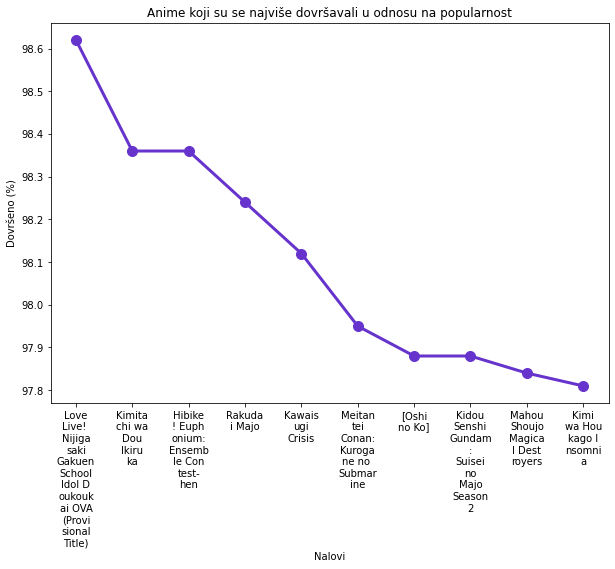

In [ ]:
compl_anime['Title']= ['\n'.join(wrap(x, 6)) for x in  compl_anime['Title']]
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(compl_anime['Title'], compl_anime['Percentage'], color=colors[14], linewidth=3.0, marker='.', markersize=20)
ax.set_title("Anime koji su se najviše dovršavali u odnosu na popularnost")
ax.set_xlabel('Nalovi')
ax.set_ylabel('Dovršeno (%)');

### 7. Koje su najčešće riječi u nazivima animea?

'Fate/stay nightErgo ProxyHanbun no Tsuki ga Noboru SoraAyakashi: Japanese Classic HorrorMajor S2Kashimashi: Girl Meets GirlAmaenaide yo!! Katsu!!MagikanoKage kara Mamoru!Futari wa Precure: Splash☆StarYomigaeru Sora: Rescue WingsLemon Angel ProjectTactical RoarNerima Daikon BrothersKagihime Monogatari: Eikyuu Alice RinbukyokuKinnikuman II Sei: Ultimate Muscle 2Papillon RoseGinyuu Mokushiroku Meine Liebe WiederYoukai Ningen Bem (2006)Rakugo Tennyo OyuiBakukyuu HIT! Crash B-DamanWan Wan Serepu Soreyuke! TetsunoshinPlay Ball 2ndRecBinchou-tanFunny PetsOcha-ken: Hotto MonogatariFurakappaMushishiShakugan no ShanaJigoku ShoujoBLOOD+Black CatTouhai Densetsu Akagi: Yami ni Maiorita TensaiKarinNoein: Mou Hitori no Kimi eMai-OtomecapetaSolty ReiIdaten JumpCanvas 2: Niji-iro no SketchAngel HeartSonic X Season 2Ginga Densetsu WeedRockman.EXE BEASTCLUSTER EDGEGaiking: Legend of Daiku-MaryuFighting Beauty WulongBouken Ou Beet ExcellionGunparade OrchestraD.I.C.E.Animal YokochouKotencotencoGiniro no K

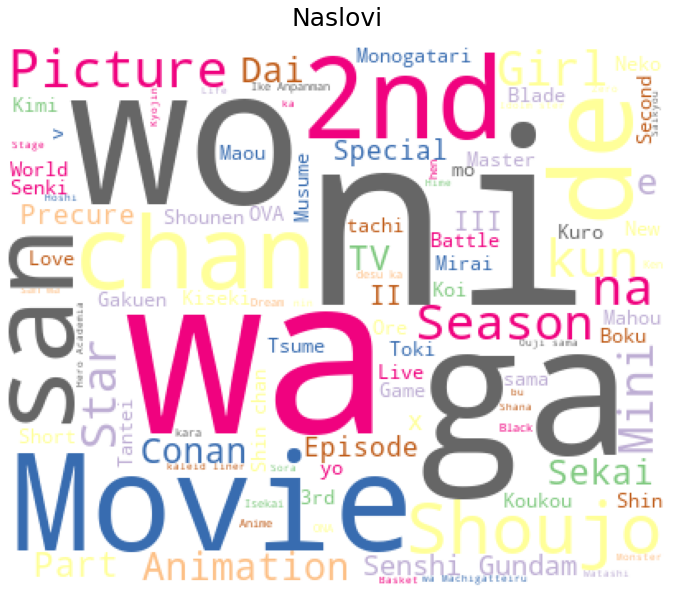

In [ ]:
from wordcloud import WordCloud

titles_text = ''.join([desc for desc in list(df.Title) if isinstance(desc, str)])
fig = plt.figure(figsize=(25, 10))

# counter = count_word_type(tagged_sentences, "NNP")
wc = WordCloud(width=400, height=330, max_words=100, colormap="Accent", background_color="white").generate(titles_text)

plt.imshow(wc)
plt.axis("off")
plt.title("Naslovi", fontsize=25, pad=20);
titles_text

# 5. Statistika

In [ ]:
df.describe()

,Year,Episodes,EpisodeDuration,Popularity,MeanScore,Favorites,Completed,Planning,Current,Dropped
count,6468.000000,6468.000000,5446.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,2014.494743,12.453879,18.882065,21749.474026,63.225850,624.386092,13824.422851,5465.132808,1273.131571,704.884199
std,4.928856,22.788842,13.105103,49690.762922,11.365362,2330.229465,35495.903921,10472.068732,3764.665889,1818.124886
min,2006.000000,1.000000,1.000000,11.000000,5.000000,1.000000,4.000000,1.000000,0.000000,0.000000
25%,2010.000000,1.000000,7.000000,1006.000000,57.000000,11.000000,573.000000,267.750000,34.000000,23.000000
50%,2015.000000,12.000000,24.000000,4768.000000,64.000000,64.000000,2735.000000,1322.500000,152.000000,84.000000
75%,2019.000000,13.000000,24.000000,18812.250000,71.000000,519.250000,10938.250000,5450.250000,889.250000,505.250000
max,2023.000000,744.000000,161.000000,643352.000000,91.000000,56743.000000,542393.000000,120178.000000,78325.000000,35131.000000


##                      


Primjer rucnog unosa gornjih mjera:

```
#count
df['Episodes'].count()

#standard deviation
df['Episodes'].std()

#mean, min, max
df['Episodes'].mean()
df['Episodes'].min()
df['Episodes'].max()
df['Episodes'].agg(['min','mean','max'])

#quartiles
df['Episodes'].median()
df['Episodes'].quantile([0.25, 0.5, 0.75], interpolation='midpoint')
```



## 5.1. Mjere raspršenosti i distribucija

In [ ]:
# varijanca
var_ep = df['Episodes'].var()
# standardna devijacija
dev_ep = df['Episodes'].std()
# interkvartilni raspon
iqr_ep = sp.stats.iqr(df['Episodes'])
# raspon uzorka
sr_ep =  df['Episodes'].max()- df['Episodes'].min()
print(f'Varijanca stupca "Episodes" je {round(var_ep, 2)}, standardna devijacija je: {round(dev_ep, 2)}, raspon uzorka je {sr_ep}, a interkvartilni raspon {iqr_ep}.')

Varijanca stupca "Episodes" je 519.33, standardna devijacija je: 22.79, raspon uzorka je 743.0, a interkvartilni raspon 12.0.


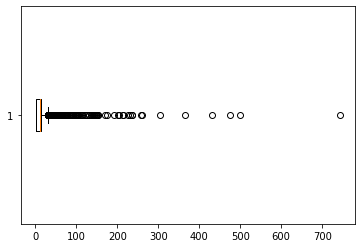

In [ ]:
plt.boxplot(df['Episodes'], vert=False);

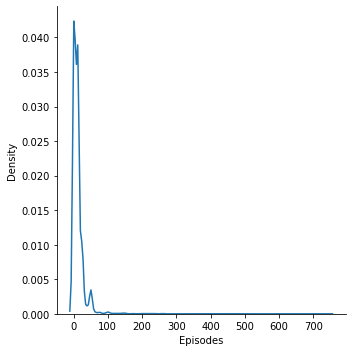

In [ ]:
sns.displot(df['Episodes'],kind="kde");

In [ ]:
var_epdur = df['EpisodeDuration'].var()
dev_epdur = df['EpisodeDuration'].std()
iqr_epdur = df['EpisodeDuration'].quantile(0.75, interpolation='midpoint')-df['EpisodeDuration'].quantile(0.25, interpolation='midpoint')
sr_epdur =  df['EpisodeDuration'].max()- df['EpisodeDuration'].min()
print(f'Varijanca stupca "EpisodeDuration" je {round(var_epdur, 2)}, standardna devijacija je: {round(dev_epdur, 2)}, raspon uzorka je {sr_epdur}, a interkvartilni raspon {iqr_epdur}.')

Varijanca stupca "EpisodeDuration" je 171.74, standardna devijacija je: 13.11, raspon uzorka je 160.0, a interkvartilni raspon 17.0.


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


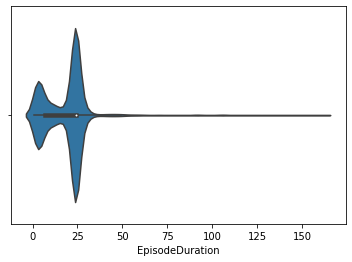

In [ ]:
sns.violinplot(df['EpisodeDuration']);

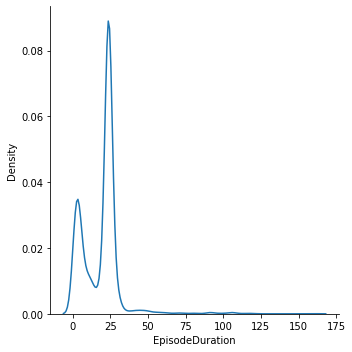

In [ ]:
sns.displot(df['EpisodeDuration'],kind="kde");

In [ ]:
var_pop = df['Popularity'].var()
dev_pop = df['Popularity'].std()
iqr_pop = sp.stats.iqr(df['Popularity'])
sr_pop =  df['Popularity'].max()- df['Popularity'].min()
print(f'Varijanca stupca "Popularity" je {round(var_pop, 2)}, standardna devijacija je: {round(dev_pop, 2)}, raspon uzorka je {sr_pop}, a interkvartilni raspon {iqr_pop}.')

Varijanca stupca "Popularity" je 2469171919.73, standardna devijacija je: 49690.76, raspon uzorka je 643341.0, a interkvartilni raspon 17806.25.


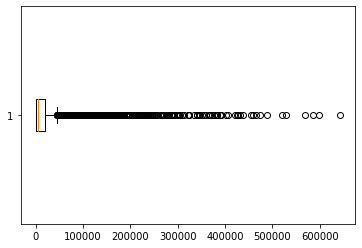

In [ ]:
plt.boxplot(df['Popularity'], vert=False);

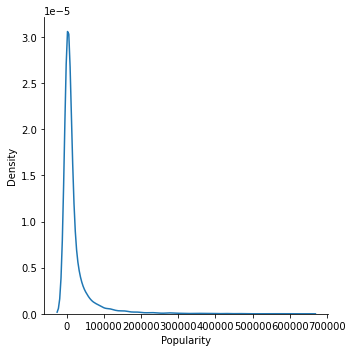

In [ ]:
sns.displot(df['Popularity'],kind="kde");

In [ ]:
var_ms = df['MeanScore'].var()
dev_ms = df['MeanScore'].std()
iqr_ms = sp.stats.iqr(df['MeanScore'])
sr_ms =  df['MeanScore'].max()- df['MeanScore'].min()
print(f'Varijanca stupca "MeanScore" je {round(var_ms, 2)}, standardna devijacija je: {round(dev_ms, 2)}, raspon uzorka je {sr_ms}, a interkvartilni raspon {iqr_ms}.')

Varijanca stupca "MeanScore" je 129.17, standardna devijacija je: 11.37, raspon uzorka je 86.0, a interkvartilni raspon 14.0.


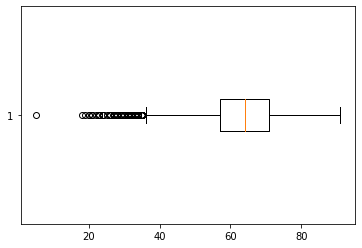

In [ ]:
plt.boxplot(df['MeanScore'], vert=False);

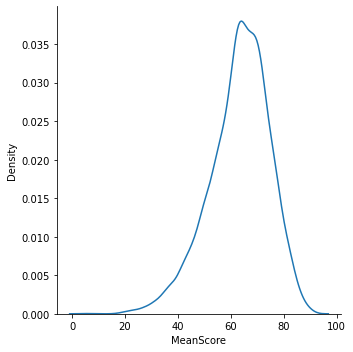

In [ ]:
sns.displot(df['MeanScore'],kind="kde");

In [ ]:
var_fav=df['Favorites'].var()
dev_fav=df['Favorites'].std()
iqr_fav = sp.stats.iqr(df['Favorites'])
sr_fav =  df['Favorites'].max()- df['Favorites'].min()
print(f'Varijanca stupca "Favorites" je {round(var_fav, 2)}, standardna devijacija je: {round(dev_fav, 2)}, raspon uzorka je {sr_fav}, a interkvartilni raspon {iqr_fav}.')

Varijanca stupca "Favorites" je 5429969.36, standardna devijacija je: 2330.23, raspon uzorka je 56742.0, a interkvartilni raspon 508.25.


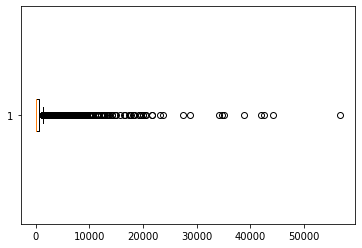

In [ ]:
plt.boxplot(df['Favorites'], vert=False);

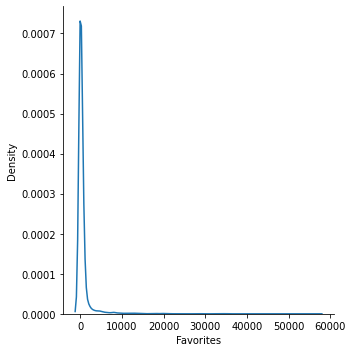

In [ ]:
sns.displot(df['Favorites'],kind="kde");

In [ ]:
var_complt = df['Completed'].var()
dev_complt = df['Completed'].std()
iqr_complt = sp.stats.iqr(df['Completed'])
sr_complt =  df['Completed'].max()- df['Completed'].min()
print(f'Varijanca stupca "Completed" je {round(var_complt, 2)}, standardna devijacija je: {round(dev_complt, 2)}, raspon uzorka je {sr_complt}, a interkvartilni raspon {iqr_complt}.')

Varijanca stupca "Completed" je 1259959195.17, standardna devijacija je: 35495.9, raspon uzorka je 542389.0, a interkvartilni raspon 10365.25.


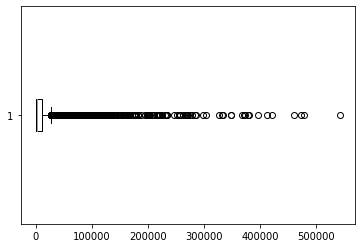

In [ ]:
plt.boxplot(df['Completed'], vert=False);

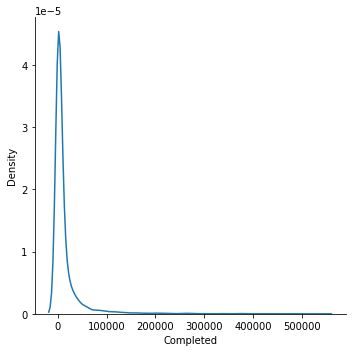

In [ ]:
sns.displot(df['Completed'],kind="kde");

In [ ]:
var_pln=df['Planning'].var()
dev_pln=df['Planning'].std()
iqr_pln = sp.stats.iqr(df['Planning'])
sr_pln =  df['Planning'].max()- df['Planning'].min()
print(f'Varijanca stupca "Planning" je {round(var_pln, 2)}, standardna devijacija je: {round(dev_pln, 2)}, raspon uzorka je {sr_pln}, a interkvartilni raspon {iqr_pln}.')

Varijanca stupca "Planning" je 109664223.52, standardna devijacija je: 10472.07, raspon uzorka je 120177.0, a interkvartilni raspon 5182.5.


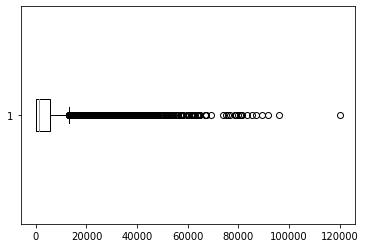

In [ ]:
plt.boxplot(df['Planning'], vert=False);

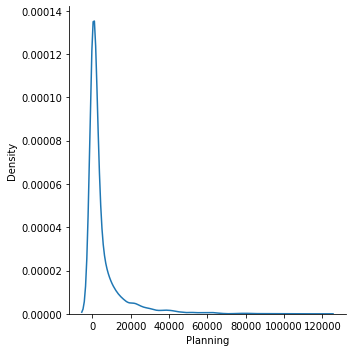

In [ ]:
sns.displot(df['Planning'],kind="kde");

In [ ]:
var_crnt=df['Current'].var()
dev_crnt=df['Current'].std()
iqr_crnt = sp.stats.iqr(df['Current'])
sr_crnt =  df['Current'].max()- df['Current'].min()
print(f'Varijanca stupca "Current" je {round(var_crnt, 2)}, standardna devijacija je: {round(dev_crnt, 2)}, raspon uzorka je {sr_crnt}, a interkvartilni raspon {iqr_crnt}.')

Varijanca stupca "Current" je 14172709.26, standardna devijacija je: 3764.67, raspon uzorka je 78325.0, a interkvartilni raspon 855.25.


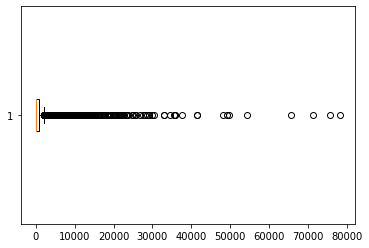

In [ ]:
plt.boxplot(df['Current'], vert=False);

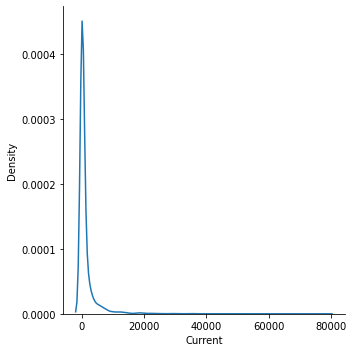

In [ ]:
sns.displot(df['Current'],kind="kde");

In [ ]:
var_drop=df['Dropped'].var()
dev_drop=df['Dropped'].std()
iqr_drop = sp.stats.iqr(df['Dropped'])
sr_drop =  df['Dropped'].max()- df['Dropped'].min()
print(f'Varijanca stupca "Dropped" je {round(var_drop, 2)}, standardna devijacija je: {round(dev_drop, 2)}, raspon uzorka je {sr_drop}, a interkvartilni raspon {iqr_drop}.')

Varijanca stupca "Dropped" je 3305578.1, standardna devijacija je: 1818.12, raspon uzorka je 35131.0, a interkvartilni raspon 482.25.


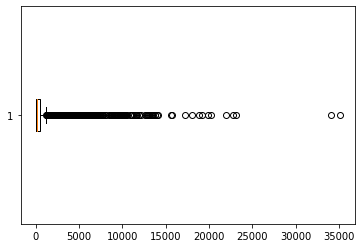

In [ ]:
plt.boxplot(df['Dropped'], vert=False);

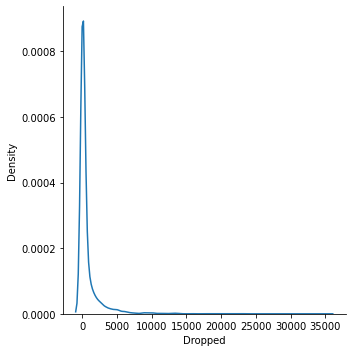

In [ ]:
sns.displot(df['Dropped'],kind="kde");

Iz gore grafičkih prikaza (kutijasti dijagram i dijagram gustoće) i mjera raspršenosti možemo vidjeti da podaci uglavnom nisu mnogo raspršeni, ali stršeći podaci su postojani. Distribucije su uglavnom pozitivno asimetrične osim kod stupca "MeanScore" koji je negativno asimetričan. Unimodalnost uzorka prevladava, ali postojane su neke bimodalne ili višemodalne distribucije (više od jednog moda) koja je naviše uočljiva kod stupca "EpisodeDuration".

## 5.2. Odnosi među varijablama

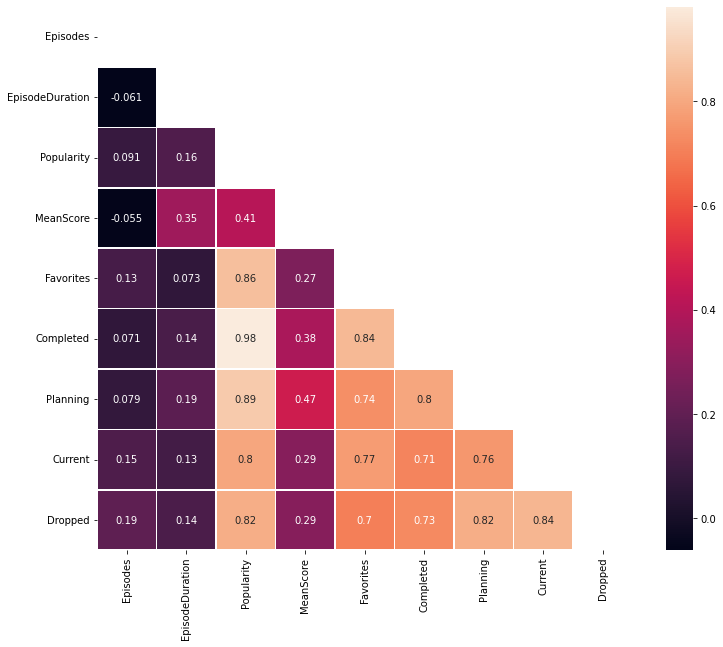

In [ ]:
#korelacije medu varijablama
#df.corr()
corr = df.drop('Year', axis=1).corr()
matrix = np.triu(corr)
fig=plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, linewidths=.5, cbar=True, mask = matrix);

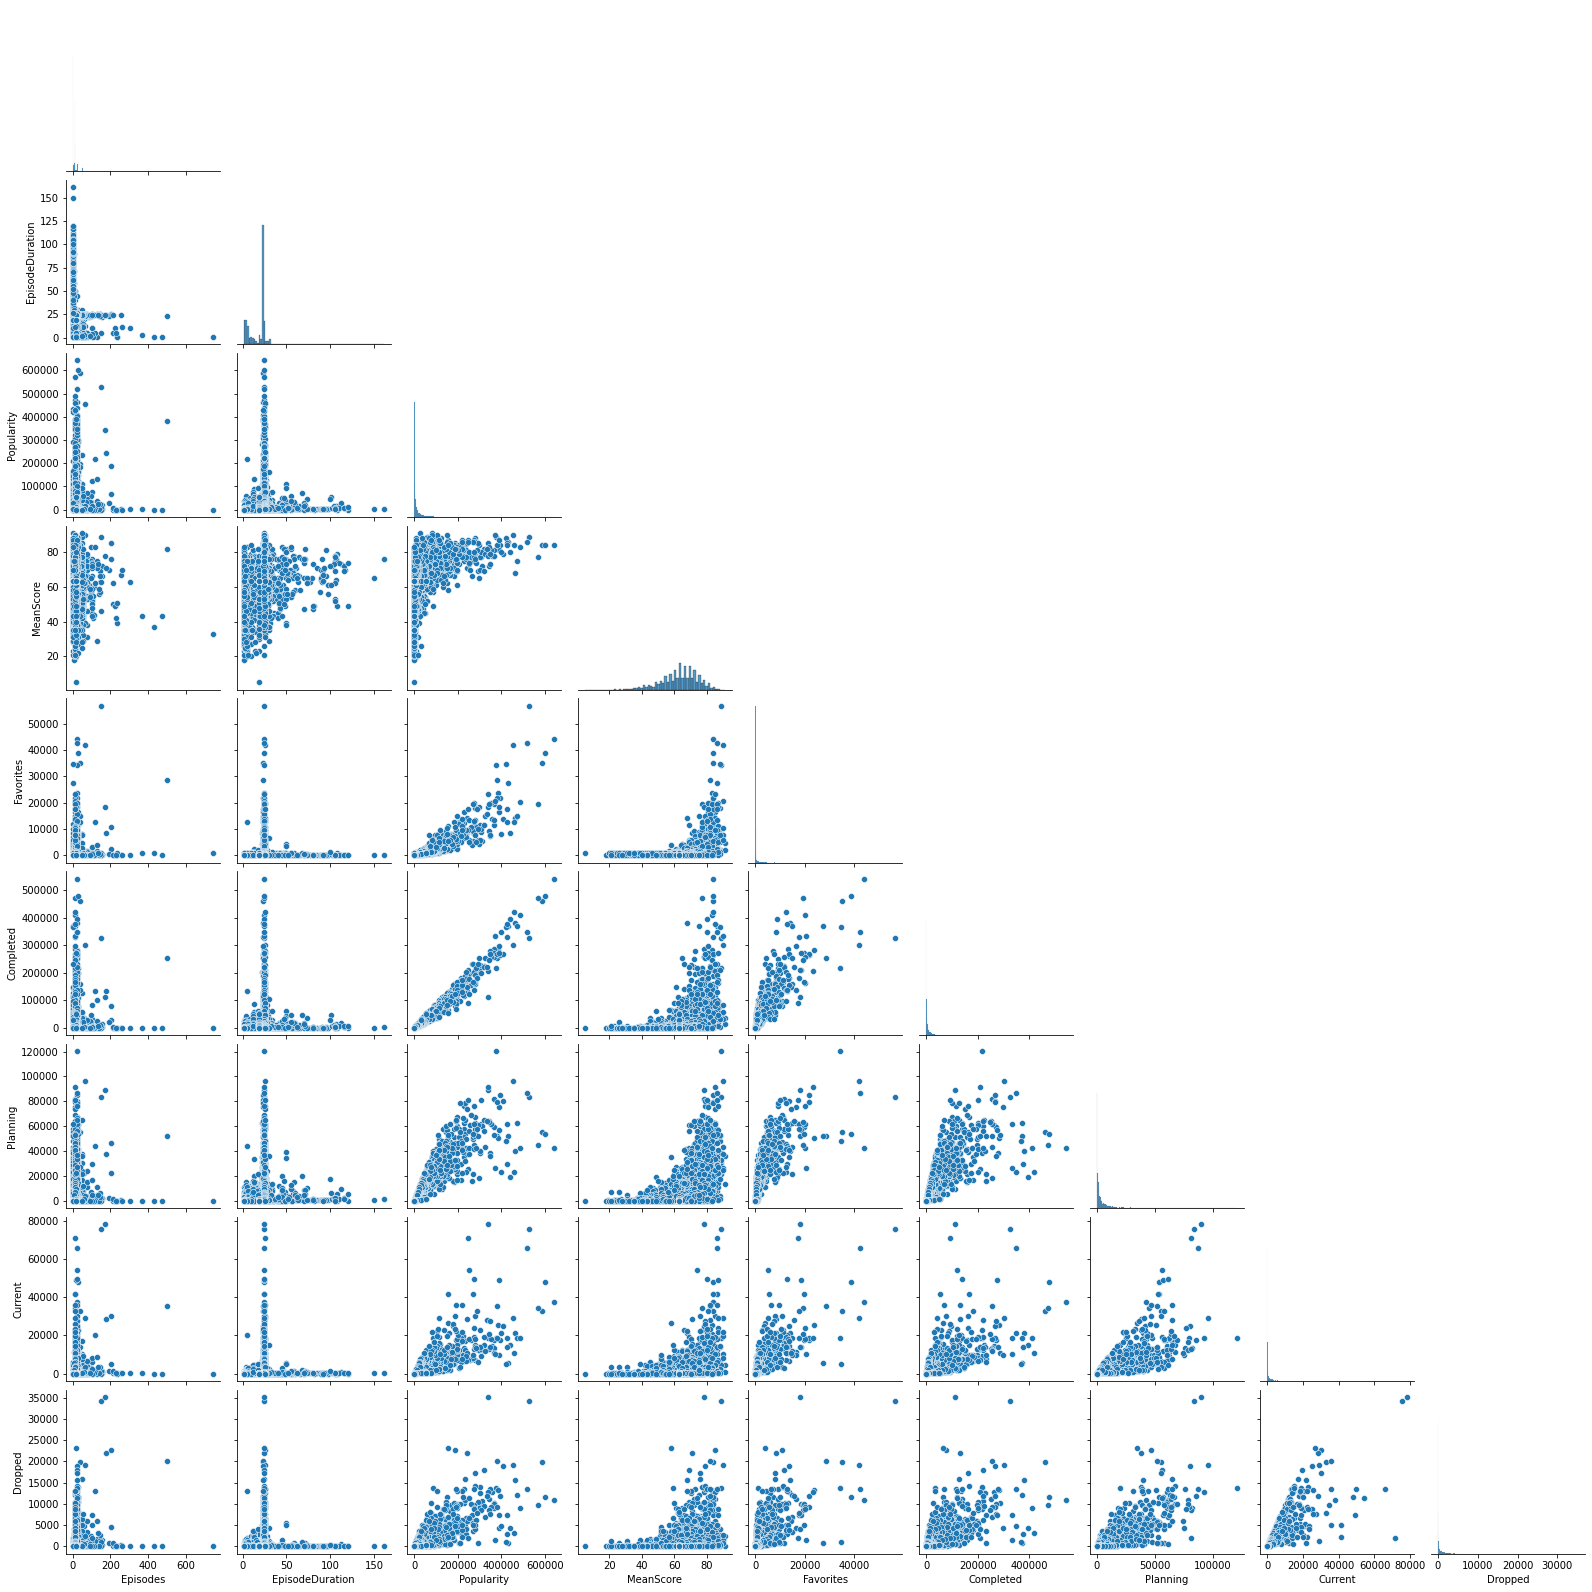

In [ ]:
sns.pairplot(df.drop('Year', axis=1), corner=True);

Na gore prikazanom **heatmap** vidimo da broj epizoda je slabo koreliran sa svim ostalim stupcima (linearna nezavisnost) kao i duljina trajanja epizode i srednja ocjena. Stupac "Popularity" je koreliran sa stupcem "Favorites", "Complited", "Planning", "Current" i "Dropped". Očekivano je da će taj broj biti koreliran s ova zadnja četiri stupca jer je on zapravo njihov zbroj te svi stupci koji su korelirani s "Popularity" stupcem, bit će korelirani i sa stupcima "Complited", "Planning", "Current" i "Dropped". Što se tiče korelacije među stupcima "Popularity" i "Favorites", očekivano je da ako Anime ima veliki broj pregleda da će i više ljudi postaviti oznaku favorita na taj Anime. 

Iz **pairplot** možemo izvući slične zaključke, samo što možemo vidjeti kako izgledaju ti odnosi među varijablama.

## 5.3. Statističe pitalice

### 5.3.1. Možemo li reći da bar 50 posto Anime ima trajanje epizode duže od prosjeka?

In [ ]:
# ep_dur_count = df.groupby(pd.cut(df.EpisodeDuration, np.arange(df['EpisodeDuration'].min(), df['EpisodeDuration'].max(), 5))).count()
# ep_dur_perc= ep_dur_count.assign(postotak = lambda x: round((x.EpisodeDuration / (ep_dur_count['EpisodeDuration'].sum()))*100))
# ep_dur_perc[['EpisodeDuration', 'postotak']]
##ili
ep_dur_ = df['EpisodeDuration'].apply(
    pd.Series.value_counts, 
    bins=np.arange(df['EpisodeDuration'].min(), df['EpisodeDuration'].max(), 20)
).sum().reset_index()
ep_dur_.rename(columns={'index':'Span', 0: 'Count'}, inplace=True)
ep_dur_

,Span,Count
0,"(0.999, 21.0]",2115.0
1,"(21.0, 41.0]",3186.0
2,"(41.0, 61.0]",81.0
3,"(61.0, 81.0]",20.0
4,"(81.0, 101.0]",21.0
5,"(101.0, 121.0]",21.0
6,"(121.0, 141.0]",0.0


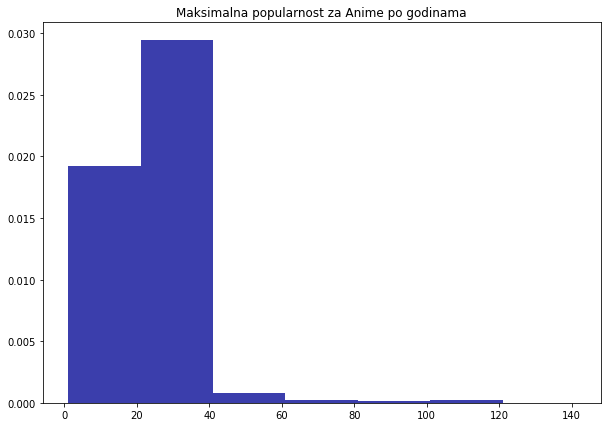

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.hist(df['EpisodeDuration'], bins=np.arange(df['EpisodeDuration'].min(), df['EpisodeDuration'].max(), 20), density=True, color=colors[5])
ax.set_title('Maksimalna popularnost za Anime po godinama')
plt.show();

In [ ]:
ep_dur_['Percentage']=ep_dur_['Count'].apply(lambda x: (x/ep_dur_['Count'].sum())*100)
ep_dur_

,Span,Count,Percentage
0,"(0.999, 21.0]",2115.0,38.850110
1,"(21.0, 41.0]",3186.0,58.523145
2,"(41.0, 61.0]",81.0,1.487877
3,"(61.0, 81.0]",20.0,0.367377
4,"(81.0, 101.0]",21.0,0.385746
5,"(101.0, 121.0]",21.0,0.385746
6,"(121.0, 141.0]",0.0,0.000000


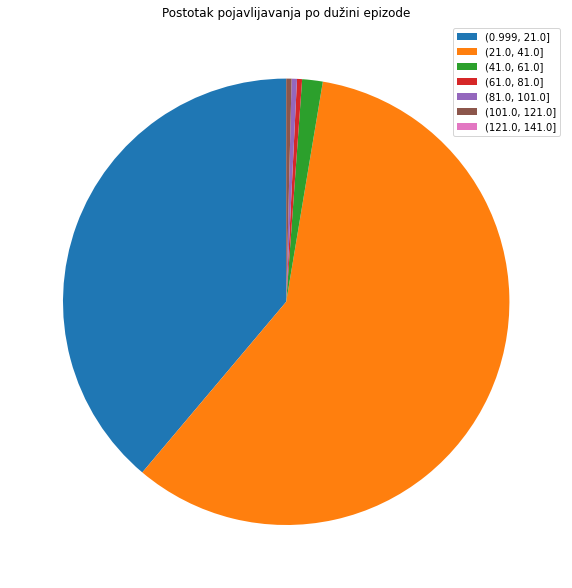

In [ ]:
fig, ax = plt.subplots(figsize=(10, 20))
ax.pie(ep_dur_.Count, startangle=90)
ax.legend(ep_dur_.Span.apply(str))
ax.set_title('Postotak pojavlijavanja po dužini epizode')
plt.show();

In [ ]:
ep_dur_m = df['EpisodeDuration'].median() #median
ep_dur_greater_m = df[df['EpisodeDuration'] > ep_dur_m].count()['EpisodeDuration'] #broj vecih
ep_dur_all = df['EpisodeDuration'].count() #prebrojavanje vecih
perc_ep_dur = (ep_dur_greater_m/ep_dur_all)*100 #postotak vecih
perc_greater = perc_ep_dur > 50 #postotak veci od 50?
perc_greater, perc_ep_dur

(False, 16.121924348145427)

In [ ]:
ep_dur_less_m = df[df['EpisodeDuration'] < ep_dur_m].count()['EpisodeDuration']
perc_ep_dur = (ep_dur_less_m/ep_dur_all)*100
perc_less = perc_ep_dur > 50
perc_less, perc_ep_dur

(False, 49.651120088138086)

In [ ]:
ep_dur_eq_m = df[df['EpisodeDuration'] == ep_dur_m].count()['EpisodeDuration']
perc_ep_dur = (ep_dur_eq_m/ep_dur_all)*100
perc_eq = perc_ep_dur > 50
perc_eq, perc_ep_dur

(False, 34.22695556371649)

Ne možemo reći da bar 50 posto Anime ima trajanje epizode duže od prosjeka.

### 5.3.2. Koji Anime žanr ima najveći postotak odustajanja?

In [ ]:
genre_dropped = (df2.groupby('Genre').Dropped.sum()/(df2.groupby('Genre').Dropped.sum()+df2.groupby('Genre').Completed.sum())*100).round(2).sort_values(ascending=False).reset_index()
genre_dropped = genre_dropped.rename(columns={0:'Percetnage'})
genre_dropped

,Genre,Percetnage
0,Mahou Shoujo,6.46
1,Music,5.70
2,Sci-Fi,5.61
3,Mecha,5.54
4,Slice of Life,5.44
5,Adventure,5.29
6,Fantasy,5.27
7,Comedy,5.25
8,Action,5.11
9,Supernatural,4.98


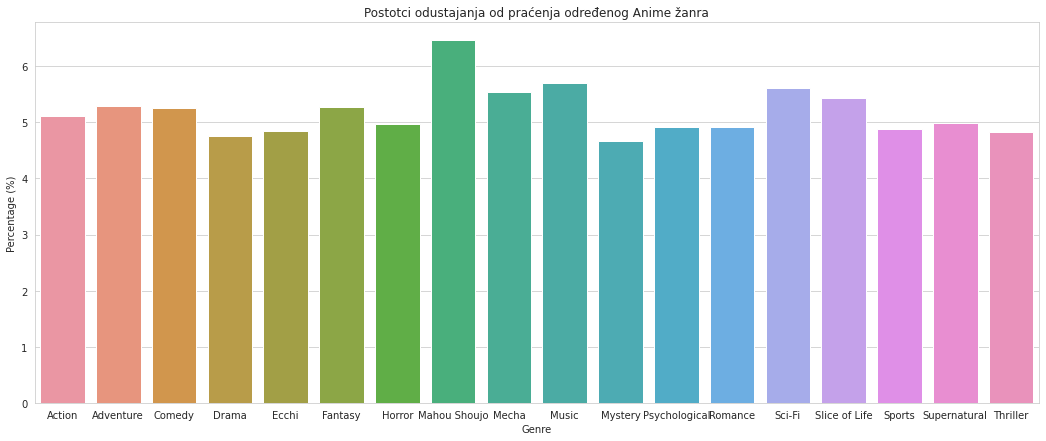

In [ ]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(18,7))
sns.barplot(x='Genre',y='Percetnage', data=genre_dropped)
ax.set_title('Postotci odustajanja od praćenja određenog Anime žanra')
ax.set_ylabel('Percentage (%)');

### 5.3.3. Koliki je postotak TV i TV Short Anime koji imaju manje od 8 epizoda? Koliki je postotak TV Short Anime koji imaju više od 30 epizoda?


In [ ]:
tvs = df[df['Format'].isin(['TV', 'TV Short'])][['Episodes']]
tvs_count=((tvs[tvs['Episodes'] < 8].count())/tvs.count())*100
print(f'Postotak TV i TV Short Anime koji imaju manje od 8 epizoda je {round(tvs_count.Episodes,2)}%.')

Postotak TV i TV Short Anime koji imaju manje od 8 epizoda je 2.17%.


In [ ]:
tvs = df[df['Format'] == 'TV Short'][['Episodes']]
tvs_count=((tvs[tvs['Episodes'] > 30].count())/tvs.count())*100
print(f'Postotak TV Short Anime koji imaju više od 30 epizoda je {round(tvs_count.Episodes,2)}%.')

Postotak TV Short Anime koji imaju više od 30 epizoda je 16.48%.


### 5.3.4. Koliki je postotak popularnosti kojeg izvora? Kakva je varijanca, standardna devijacija itd.?

In [ ]:
pop_source = df.groupby('Source').Popularity.sum()
pop_source = (pop_source/df.Popularity.sum()*100).round(4).sort_values(ascending=False)
pop_source = pop_source.reset_index()
pop_source

,Source,Popularity
0,Manga,52.2831
1,Light Novel,22.3620
2,Original,14.9606
3,Visual Novel,3.1230
4,Video Game,2.7571
5,Novel,2.0444
6,Other,0.7049
7,Multimedia Project,0.6971
8,Web Novel,0.1484
9,Doujinshi,0.1358


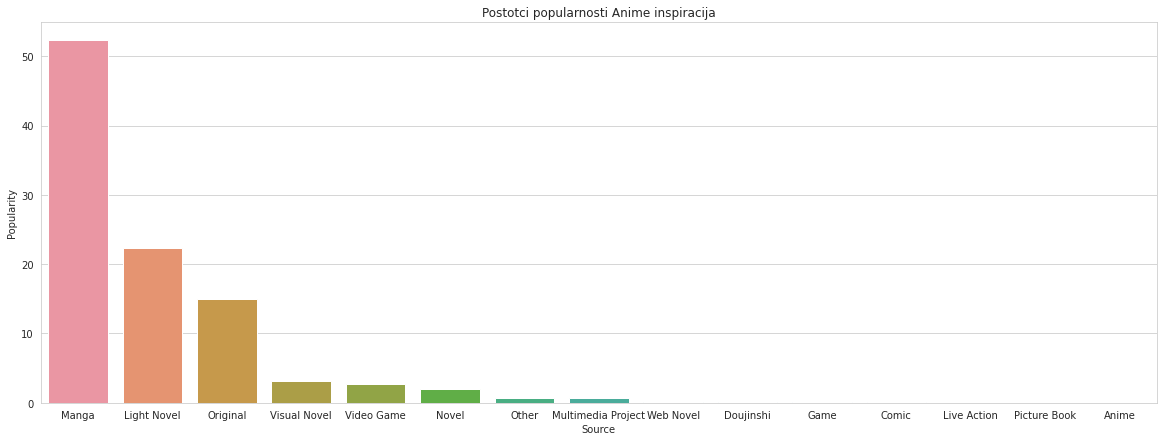

In [ ]:
fig, ax = plt.subplots(figsize=(20,7))
ax.set_title('Postotci popularnosti Anime inspiracija')
sns.barplot(data=pop_source, x=pop_source.Source, y=pop_source.Popularity,  order=pop_source.sort_values('Popularity', ascending=False).Source);

In [ ]:
ql = lambda x: x.quantile(0.25)
qu = lambda x: x.quantile(0.75)
agg_func={
    'Popularity': ['count','sum', 'min', 'max', 'median', 'std', 'var', ql, qu]
    }
df.groupby('Source').agg(agg_func).rename(columns={'<lambda_0>':'QL', '<lambda_1>':'QU'	})

Popularity                                          \
                        count         sum     min       max    median   
Source                                                                  
Anime                       9     12440.0    26.0    4580.0    1158.0   
Comic                      13    141971.0   735.0   43791.0    6012.0   
Doujinshi                  11    190999.0  2877.0   52070.0   13030.0   
Game                       17    172294.0   142.0  116755.0    2051.0   
Light Novel               668  31457922.0    52.0  465100.0   26194.0   
Live Action                 5     41876.0  1224.0   21910.0    4500.0   
Manga                    2302  73549556.0    11.0  643352.0    9391.0   
Multimedia Project         81    980635.0    50.0  104017.0    3740.0   
Novel                     146   2875903.0    14.0  123117.0    7897.5   
Original                 1657  21045870.0    11.0  431296.0    2184.0   
Other                     305    991588.0    35.0   47091.0     786.0   
Picture Book               31     32527.0    23.0   17526.0     170.0   
Video Game                488   3878535.0    28.0  161214.0    3570.5   
Visual Novel              221   4393348.0   323.0  377532.0    6643.0   
Web Novel                   2    208743.0   398.0  208345.0  104371.5   

                                                                      
                              std           var        QL         QU  
Source                                                                
Anime                 1392.890141  1.940143e+06    365.00    1440.00  
Comic                11749.628220  1.380538e+08   3836.00   13703.00  
Doujinshi            14751.664444  2.176116e+08   6681.00   24250.00  
Game                 27802.051025  7.729540e+08   1467.00    3959.00  
Light Novel          61808.371419  3.820275e+09   7076.50   60317.00  
Live Action           8390.729927  7.040435e+07   3305.00   10937.00  
Manga                65205.258362  4.251726e+09   2719.75   29711.00  
Multimedia Project   19020.586178  3.617827e+08   1567.00   12329.00  
Novel                26775.460287  7.169253e+08   1924.00   27498.00  
Original             32660.971914  1.066739e+09    551.00    9477.00  
Other                 6980.501473  4.872740e+07    195.00    2972.00  
Picture Book          3175.791827  1.008565e+07     96.00     411.50  
Video Game           14084.250377  1.983661e+08   1204.75    9151.25  
Visual Novel         38515.330210  1.483431e+09   2652.00   22375.00  
Web Novel           147040.733827  2.162098e+10  52384.75  156358.25

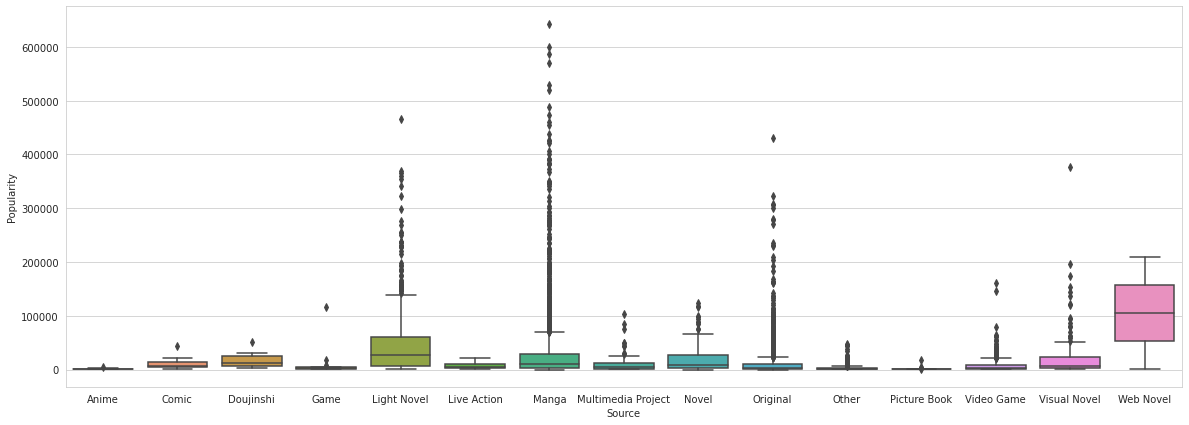

In [ ]:
fig, ax = plt.subplots(figsize=(20,7))
sns.boxplot(x='Source',y='Popularity', data=df)

### 5.3.5. Koliki je postotak Anime čija duljina trajanja epizode je izvan i unutar interkvartilnog raspona?

In [ ]:
qu_epdur = df['EpisodeDuration'].quantile(0.75)
ql_epdur = df['EpisodeDuration'].quantile(0.25)
out_iqr = df[(df['EpisodeDuration'] > qu_epdur) | (df['EpisodeDuration'] < ql_epdur)]['EpisodeDuration'].count()
in_iqr = df[(df['EpisodeDuration'] <= qu_epdur) & (df['EpisodeDuration'] >= ql_epdur)]['EpisodeDuration'].count()
in_iqr_bor_u = df[(df['EpisodeDuration'] == qu_epdur)]['EpisodeDuration'].count()
in_iqr_bor_l = df[(df['EpisodeDuration'] == ql_epdur)]['EpisodeDuration'].count()
all_epdur = df['EpisodeDuration'].count()
perc_out = (out_iqr/all_epdur)*100
perc_bor_u = (in_iqr_bor_u/all_epdur)*100
perc_bor_l =(in_iqr_bor_l/all_epdur)*100
perc_bor =perc_bor_u+perc_bor_l
perc_in = (in_iqr/all_epdur)*100
print(f'Postotak anime koji se nalazi unutar interkvartilnog raspona je: {round(perc_in, 2)}% \n'+
      f'od čega ih je točno na gornjoj granici {round(perc_bor_u, 2)}%, a na donjoj {round(perc_bor_l, 2)}%, ukupno {round(perc_bor, 2)}%.')
print(f'Postotak onih koji se nalaze izvan interkvartilnog raspona je {round(perc_out, 2)}%')

Postotak anime koji se nalazi unutar interkvartilnog raspona je: 59.49% 
od čega ih je točno na gornjoj granici 34.23%, a na donjoj 0.9%, ukupno 35.13%.
Postotak onih koji se nalaze izvan interkvartilnog raspona je 40.51%


# 6. Linearna regresija

In [ ]:
# priprema podataka
## popularnost nam je jednaka zbroju complited, dropped, planning i current
## izbacit cemo podatke u skupu za treniranje kojima je polje "Favorites" prazno
## iz podataka za predvidanje cemo maknuti oznake favorita (za sada su te brojke jako male)
train_data=df[df['Year']<2023][['Dropped', 'Completed', 'Planning', 'Current', 'Favorites']]
test_data=df[df['Year']>=2023][['Title','Dropped', 'Completed', 'Planning', 'Current']]
train_data.dropna(subset=['Favorites'], inplace=True)
train_data.head()

,Dropped,Completed,Planning,Current,Favorites
0,4340.0,81831.0,28558.0,4423.0,1457.0
1,4506.0,50251.0,31419.0,4708.0,2736.0
2,271.0,7309.0,5768.0,309.0,80.0
3,297.0,6228.0,4138.0,371.0,58.0
4,122.0,7898.0,1657.0,234.0,152.0


In [ ]:
 # oblik podataka za treniranje i predvidanje
 train_data.shape, test_data.shape

((6322, 5), (146, 5))

In [ ]:
# podjela na podatke za treniranje i testiranje
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data[['Dropped', 'Completed', 'Planning', 'Current']], train_data['Favorites'],  test_size=0.2, random_state=42)

In [ ]:
# skaliranje pomocu StandardScaler jer podaci imaju velike vrijednosti
## z = (x - u) / s -> u - aritmeticka sredina, s - standardna derivacija 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

---
***Linearna Regresija***
---
je jednostavno pokušaj uklapanje
ravne linije na skup uparenih opažanja: $(x_1, y_1), (x_2, y_2), ... , (x_n, y_n)$.
Matematički izraz za tu "ravnu liniju" je
$y = a_0 + a_1x + e$ gdje su $a_0$ i $a_1$ koeficijenti koji predstavljaju presjek i
nagib, a $e$ je pogreška ili rezidual između modela
i zapažanja.
Pogreška ili rezidual je odstupanje između prave vrijednosti $y$
i približne vrijednosti $a_0 + a_1x$, predviđenu linearnom jednadžbom.

**Coef** - Procijenjeni koeficijenti za problem linearne regresije.

**Intercept** - Neovisni član u linearnom modelu.

**Score** - Vrati koeficijent determinacije predviđanja.

In [ ]:
# model
from sklearn import linear_model

est = linear_model.LinearRegression() 
est.fit(X_train, y_train)

print("Coef:", est.coef_, "\nIntercept:", est.intercept_)
print("Score:", est.score(X_train, y_train))

Coef: [-163.00456651 1545.67022835 -192.11192887 1051.78603698] 
Intercept: 629.5525512670885
Score: 0.7957055643302142


**R2 score** vrlo je važna metrika koja se koristi za procjenu izvedbe modela strojnog učenja temeljenog na regresiji. Još se zove i koeficijent determinacije. Mjeri udio varijance u ovisnoj varijabli koji je predvidljiv iz nezavisne varijable ((ukupna varijanca objašnjena modelom) / ukupna varijanca). Vrijednost može biti u rasponu od [0, 1] (ili od 0% do 100%), a što je R2 score bliži 1 (100%), model je bolji, odnosno varijable imaju veću korelaciju.

**Srednja kvadratna pogreška (MSE)** je prosjek kvadrata pogrešaka. Što je veći broj, to je veća greška. Pogreška u ovom slučaju znači razliku između promatranih vrijednosti y1, y2, y3, … i predviđenih pred(y1), pred(y2), pred(y3), … Svaku razliku kvadriramo (pred(yn) – yn) ) ** 2 tako da se negativne i pozitivne vrijednosti međusobno ne poništavaju.


**RMSE** je korijen iz MSE. RMSE nam je prirodniji jer je u skali s izvornim podacima.


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
pred_y = est.predict(X_test)
print('R2 = ', r2_score(y_test, pred_y), 'MSE =', mean_squared_error(y_test, pred_y) ,' RMSE = ', sqrt(mean_squared_error(y_test, pred_y)))

R2 =  0.6527339318387129 MSE = 1854252.5526836577  RMSE =  1361.7094229987754


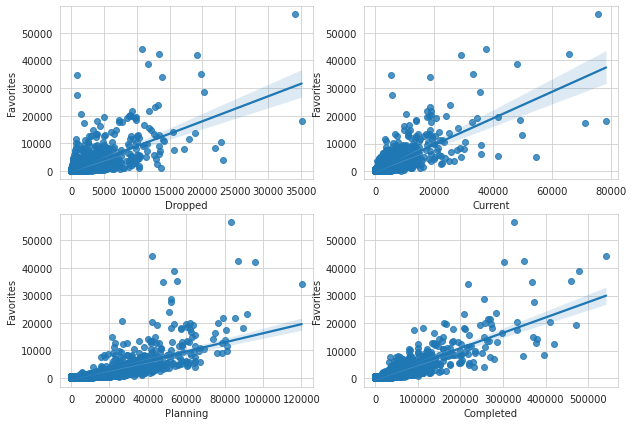

In [ ]:
# dijagram rasprsenosti za pojedine varijable
fig, axes = plt.subplots(2,2, figsize=(10,7))
sns.regplot(x='Dropped', y='Favorites', data=train_data, ax = axes[0][0]);
sns.regplot(x='Current', y='Favorites', data=train_data, ax = axes[0][1]);
sns.regplot(x='Planning', y='Favorites', data=train_data, ax = axes[1][0]);
sns.regplot(x='Completed', y='Favorites', data=train_data, ax = axes[1][1]);

**Statsmodels** je Python modul koji pruža klase i funkcije za procjenu mnogih različitih statističkih modela, kao i za provođenje statističkih testova i istraživanje statističkih podataka.

In [ ]:
import statsmodels.api as sm
x = X_train
y = y_train
x = sm.add_constant(x)

lm = sm.OLS(y, x).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              Favorites   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     4919.
Date:                Sun, 22 Jan 2023   Prob (F-statistic):               0.00
Time:                        15:40:02   Log-Likelihood:                -42448.
No. Observations:                5057   AIC:                         8.491e+04
Df Residuals:                    5052   BIC:                         8.494e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        629.5526     15.049     41.834      0.0

In [ ]:
test_data.head()

,Title,Dropped,Completed,Planning,Current
6322,VINLAND SAGA SEASON 2,362.0,48763.0,26982.0,429.0
6323,Maou Gakuin no Futekigousha: Shijou Saikyou no...,305.0,31492.0,21632.0,656.0
6324,Tokyo Revengers: Seiya Kessen-hen,390.0,27071.0,21690.0,577.0
6325,NieR:Automata Ver1.1a,241.0,24194.0,22209.0,580.0
6326,"Ijiranaide, Nagatoro-san 2nd Attack",276.0,22808.0,16294.0,365.0


In [ ]:
# predvidanje
def predict_favorites(title):
  data = test_data[test_data['Title'] == title][['Dropped', 'Completed', 'Planning', 'Current']].reset_index().drop(['index'], axis=1)
  data = scaler.transform(data)
  return est.predict(data)[0]

In [ ]:
print(predict_favorites('VINLAND SAGA SEASON 2'))

1602.7250928097528


#7. Pretraživanje Anime franšize pomoću Toolz biblioteke i streaming funkcije

##7.1. Streaming funkcija s yield-om

Yield - predaje (engl. yields) kontroolu funkciji kojoj omogućava orađivanje samo jednog dijela podataka, zatim čeka nastavak obrade podataka dok svi naredni koraci ne obrade trenutni dio padatka

In [ ]:
!pip install memory_profiler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import memory_profiler as mem_profile
import time

In [ ]:
def title_filter_Dropped(name):
  x=df[df['Title'].str.contains(name)] # spremanje podataka koje sadrze odredeno ime
  dropped=0
  y=x['Dropped'] # spremanje stupaca Dropped u varijablu
  for elem in y:
    dropped+=elem
    return dropped # vracanje pojedinog elementa

In [ ]:
def title_filter_Completed(name):
  x=df[df['Title'].str.contains(name)] # spremanje podataka koje sadrze odredeno ime
  Completed=0
  y=x['Completed'] # spremanje stupaca Dropped u varijablu
  for elem in y:
    Completed+=elem
    return Completed # vracanje pojedinog elementa

In [ ]:
def title_filter_Planning(name):
  x=df[df['Title'].str.contains(name)] # spremanje podataka koje sadrze odredeno ime
  Planning=0
  y=x['Planning'] # spremanje stupaca Dropped u varijablu
  for elem in y:
    Planning+=elem
    return Planning # vracanje pojedinog elementa

In [ ]:
def title_filter_Dropped_stream(name):
  x=df[df['Title'].str.contains(name)] # spremanje podataka koje sadrze odredeno ime
 
  y=x['Dropped'] # spremanje stupaca Dropped u varijablu
  for elem in y:
    yield elem # vracanje pojedinog elementa

In [ ]:
def title_filter_Completed_stream(name):
  x=df[df['Title'].str.contains(name)] # spremanje podataka koje sadrze odredeno ime
 
  y=x['Completed'] # spremanje stupaca Complated u varijablu
  for elem in y:
    yield elem # vracanje pojedinog elementa

In [ ]:
def title_filter_Planning_stream(name):
  x=df[df['Title'].str.contains(name)] # spremanje podataka koje sadrze odredeno ime
 
  y=x['Planning'] # spremanje stupaca Planning u varijablu
  for elem in y:
    yield elem # vracanje pojedinog elementa

In [ ]:
print('prije: {}'.format(mem_profile.memory_usage()[0]))
rez=title_filter_Dropped('ONE PIECE')
print('poslije: {}'.format(mem_profile.memory_usage()[0]))

prije: 333.4609375
poslije: 333.4609375


In [ ]:
print('prije: {}'.format(mem_profile.memory_usage()[0]))
rez1=title_filter_Dropped_stream('ONE PIECE')
print('poslije: {}'.format(mem_profile.memory_usage()[0]))

prije: 333.4609375
poslije: 333.4609375


In [ ]:
print('prije: {}'.format(mem_profile.memory_usage()[0]))
rez2=title_filter_Completed('ONE PIECE')
print('poslije: {}'.format(mem_profile.memory_usage()[0]))

prije: 333.4609375
poslije: 333.4609375


In [ ]:
print('prije: {}'.format(mem_profile.memory_usage()[0]))
rez3=title_filter_Completed_stream('ONE PIECE')
print('poslije: {}'.format(mem_profile.memory_usage()[0]))

prije: 333.4609375
poslije: 333.4609375


In [ ]:
print('prije: {}'.format(mem_profile.memory_usage()[0]))
rez4=title_filter_Planning('ONE PIECE')
print('poslije: {}'.format(mem_profile.memory_usage()[0]))

prije: 333.4609375
poslije: 333.4609375


In [ ]:
print('prije: {}'.format(mem_profile.memory_usage()[0]))
rez5=title_filter_Planning_stream('ONE PIECE')
print('poslije: {}'.format(mem_profile.memory_usage()[0]))

prije: 333.4609375
poslije: 333.4609375


##7.2. Toolz streaming library


Toolz biblioteka je napisana u cilju da iskoristi prednosti Pythonovih iteratora i lako manipulira tokovima podataka (engl. streams). Koristi metode kao pipe, curry, sliding window, itd...


In [ ]:
import toolz as tz
tz.pipe('ONE PIECE',title_filter_Dropped_stream,np.sum) #argumenti (podatak, naša funkcija, što želimo sa vraćenim podatkom)

1782.0

In [ ]:
tz.pipe('ONE PIECE',title_filter_Completed_stream,np.sum)

269229.0

In [ ]:
tz.pipe('ONE PIECE',title_filter_Planning_stream,np.sum)

62634.0

# 8. Sustav preporuka

In [ ]:
from scipy.spatial.distance import cosine #kosinus kuta izmedu dvaju vektora

In [ ]:
df_4 = df.drop_duplicates(subset=['Link'], keep='first', ignore_index=True) #uklanjamo duplikate

In [ ]:
#provjera nalazi li se zanr u listi zanrova koje ima anime koji nas zanima
def check_genre(genre_list,string):
    if any(x in string for x in genre_list):
        return True
    else:
        return False

Kosinus kuta između dvaju vektora možemo dobiti na sljedeći način:

<center>
$cos \rho = 1- \frac{x \cdot y}{||x|| \cdot ||y||}$

In [ ]:
%%time
def get_recommendation(name):
    anime_genre = df_4[df_4['Title']==name].Genre.values[0] #dohvati zanrove anime koji nas zanima
    cols = df_4[df_4['Genre'].apply(
        lambda x: check_genre(anime_genre,str(x)))]['Title'].tolist() # pronadi sve naslove animea koji imaju bar jedan od zanrova
    animemat = df_4[df_4['Title'].isin(cols)].pivot_table(
        columns='Title',values=['Favorites', 'MeanScore', 'Completed', 'Planning', 'Dropped']) # pivot tablica anime koji imaju bar jedan isti zanr
    anime_pop = animemat[name] #dohvacamo redak iz pivot tablice koji nas zanima
    anime_table = animemat.apply(lambda x: (1 - cosine(
        [anime_pop['Favorites'], anime_pop['MeanScore'], anime_pop['Completed'], anime_pop['Planning'], anime_pop['Dropped']], 
        [x['Favorites'], x['MeanScore'],x['Completed'], x['Planning'], x['Dropped'] ]))
    ) #trazimo kosinuse kuta
    recc_table = pd.DataFrame(anime_table.sort_values(ascending=False)).reset_index() #sortiraj tablicu po podudarnosti po kosinusu kuta
    recc_table.rename(columns={0 : 'Cosine'}, inplace=True) #preimenuj stupac
    recc_table = recc_table.head(10) #dohvati 10 najboljih podudaranja
    recc_top = df_4[df_4['Title'].isin(recc_table['Title'])].reset_index() #dohvati podatke iz df o tih 10 najboljih podudaranja
    recc_top = recc_top[['Title', 'Year', 'Episodes', 'EpisodeDuration', 'Studios', 'Source', 'Genre', 'MeanScore', 'Favorites', 'Popularity']] 
    recc_top['Cosine']=recc_table['Cosine'] #dodaj i mjeru kosinusa u novu tablicu
    return recc_top

CPU times: user 0 ns, sys: 5 µs, total: 5 µs
Wall time: 8.34 µs


In [ ]:
%%time
import math
def cosine_similarity(v1,v2):
    sumxx, sumxy, sumyy = 0, 0, 0
    for i in range(len(v1)):
        x = v1[i]; y = v2[i]
        sumxx += x*x # kvadratna norma vektora x
        sumyy += y*y # kvadratna norma vektora y
        sumxy += x*y # skalarni umnozak vektora x i y
    return 1 - (sumxy/math.sqrt(sumxx*sumyy)) # 1 - kosinus (po formuli)
def get_recommendation_by_hand(name):
    anime_genre = df_4[df_4['Title']==name].Genre.values[0] #dohvati zanrove anime koji nas zanima
    cols = df_4[df_4['Genre'].apply(
        lambda x: check_genre(anime_genre,str(x)))]['Title'].tolist() # pronadi sve naslove animea koji imaju bar jedan od zanrova
    animemat = df_4[df_4['Title'].isin(cols)].pivot_table(
        columns='Title',values=['Favorites', 'MeanScore', 'Completed', 'Planning', 'Dropped']) # pivot tablica anime koji imaju bar jedan isti zanr
    anime_pop = animemat[name] #dohvacamo redak iz pivot tablice koji nas zanima
    anime_table = animemat.apply(lambda x: (1 - cosine_similarity(
        [anime_pop['Favorites'], anime_pop['MeanScore'], anime_pop['Completed'], anime_pop['Planning'], anime_pop['Dropped']], 
        [x['Favorites'], x['MeanScore'],x['Completed'], x['Planning'], x['Dropped'] ]))
    ) #trazimo kosinuse kuta
    recc_table = pd.DataFrame(anime_table.sort_values(ascending=False)).reset_index() #sortiraj tablicu po podudarnosti po kosinusu kuta
    recc_table.rename(columns={0 : 'Cosine'}, inplace=True) #preimenuj stupac
    recc_table = recc_table.head(10) #dohvati 10 najboljih podudaranja
    recc_top = df_4[df_4['Title'].isin(recc_table['Title'])].reset_index() #dohvati podatke iz df o tih 10 najboljih podudaranja
    recc_top = recc_top[['Title', 'Year', 'Episodes', 'EpisodeDuration', 'Studios', 'Source', 'Genre', 'MeanScore', 'Favorites', 'Popularity']] 
    recc_top['Cosine']=recc_table['Cosine'] #dodaj i mjeru kosinusa u novu tablicu
    return recc_top

CPU times: user 10 µs, sys: 0 ns, total: 10 µs
Wall time: 13.6 µs


In [ ]:
%%time
get_recommendation('Ergo Proxy') #dohvati preporuke za Anime

CPU times: user 274 ms, sys: 0 ns, total: 274 ms
Wall time: 278 ms


,Title,Year,Episodes,EpisodeDuration,Studios,Source,Genre,MeanScore,Favorites,Popularity,Cosine
0,Ergo Proxy,2006,23.0,25.0,Manglobe,Original,"[Adventure, Mystery, Psychological, Sci-Fi]",76.0,2736.0,93739.0,1.000000
1,Casshern Sins,2008,24.0,24.0,MADHOUSE,Other,"[Action, Adventure, Drama, Psychological, Sci-Fi]",73.0,673.0,27338.0,0.999878
2,Durarara!!,2010,24.0,24.0,Brain's Base,Light Novel,"[Action, Mystery, Supernatural]",79.0,5827.0,198621.0,0.999849
3,PSYCHO-PASS,2012,22.0,23.0,Production I.G,Original,"[Action, Psychological, Sci-Fi, Thriller]",82.0,9153.0,234841.0,0.999747
4,Soredemo Sekai wa Utsukushii,2014,12.0,22.0,Studio Pierrot,Manga,"[Adventure, Fantasy, Romance]",73.0,786.0,45446.0,0.999743
5,Yama no Susume: Second Season,2014,24.0,14.0,8-bit,Manga,"[Adventure, Comedy, Slice of Life]",75.0,185.0,10635.0,0.999726
6,Kujira no Kora wa Sajou ni Utau,2017,12.0,24.0,J.C. Staff,Manga,"[Adventure, Drama, Fantasy, Mystery, Romance, ...",69.0,672.0,51169.0,0.999709
7,Munou na Nana,2020,13.0,24.0,Bridge,Manga,"[Drama, Horror, Psychological, Supernatural, T...",71.0,1401.0,73067.0,0.999682
8,Tensei Shitara Slime Datta Ken: Tensura Nikki,2021,12.0,24.0,8-bit,Manga,"[Adventure, Comedy, Fantasy, Slice of Life]",74.0,1040.0,59360.0,0.999665
9,"Yuusha Party wo Tsuihou Sareta Beast Tamer, Sa...",2022,13.0,24.0,EMT Squared,Light Novel,"[Adventure, Fantasy]",69.0,949.0,27262.0,0.999619


In [ ]:
%%time
get_recommendation_by_hand('Ergo Proxy')

CPU times: user 173 ms, sys: 0 ns, total: 173 ms
Wall time: 176 ms


,Title,Year,Episodes,EpisodeDuration,Studios,Source,Genre,MeanScore,Favorites,Popularity,Cosine
0,Ergo Proxy,2006,23.0,25.0,Manglobe,Original,"[Adventure, Mystery, Psychological, Sci-Fi]",76.0,2736.0,93739.0,1.000000
1,Casshern Sins,2008,24.0,24.0,MADHOUSE,Other,"[Action, Adventure, Drama, Psychological, Sci-Fi]",73.0,673.0,27338.0,0.999878
2,Durarara!!,2010,24.0,24.0,Brain's Base,Light Novel,"[Action, Mystery, Supernatural]",79.0,5827.0,198621.0,0.999849
3,PSYCHO-PASS,2012,22.0,23.0,Production I.G,Original,"[Action, Psychological, Sci-Fi, Thriller]",82.0,9153.0,234841.0,0.999747
4,Soredemo Sekai wa Utsukushii,2014,12.0,22.0,Studio Pierrot,Manga,"[Adventure, Fantasy, Romance]",73.0,786.0,45446.0,0.999743
5,Yama no Susume: Second Season,2014,24.0,14.0,8-bit,Manga,"[Adventure, Comedy, Slice of Life]",75.0,185.0,10635.0,0.999726
6,Kujira no Kora wa Sajou ni Utau,2017,12.0,24.0,J.C. Staff,Manga,"[Adventure, Drama, Fantasy, Mystery, Romance, ...",69.0,672.0,51169.0,0.999709
7,Munou na Nana,2020,13.0,24.0,Bridge,Manga,"[Drama, Horror, Psychological, Supernatural, T...",71.0,1401.0,73067.0,0.999682
8,Tensei Shitara Slime Datta Ken: Tensura Nikki,2021,12.0,24.0,8-bit,Manga,"[Adventure, Comedy, Fantasy, Slice of Life]",74.0,1040.0,59360.0,0.999665
9,"Yuusha Party wo Tsuihou Sareta Beast Tamer, Sa...",2022,13.0,24.0,EMT Squared,Light Novel,"[Adventure, Fantasy]",69.0,949.0,27262.0,0.999619


# 9. Zaključak

<p align="justify">
Kroz prikupljanje, obradu, analizu i predviđanja možemo vidjeti da se protežu brojni zaključci. Kao što smo u uvodu pretpostavili, cijeli proces je bio dosta zanimljiv za analizu. Ako bi većinu projekta išli raditi bez unesenih biblioteka koje smo koristili, cijeli proces bi trajao mnogo duže te bi većina stvari bila mnogo kompliciranija (npr. prikupljanje podataka bi s ovih stranica trajao vječnost ili pisanje dodatnih funkcija kao kod sustava preporuka). Stoga, korištenje pravih alata i na pravilan način, ne samo da nam može ubrzati sam proces obrade, nego ga može i mnogo pojednostavniti.
<p align="justify">
Iako su nam nekad dostupni strukturirani podaci na internetu koje možemo koristiti za neku temu koja nas zanima, ponekad ti podaci mogu biti zastarjeli (čak i u kratkom roku), mogu nam biti nedovoljni ili nepostojeći za neke analize koje nas zanimaju. Samostalno, njihovim prikupljanjem, možemo riješiti takav problem, kao u ovom projektu gdje su dostupni podaci malo zastarjeli. 
Podatke smo učitali s dvije međusobno povezane stranice te zbog velike količine podataka je dugo trajalo. Nakon dohvaćanja krenuli smo s upoznavanjem i pripremom podataka za obradu. Podaci su imali 19 stupaca i 7619 redaka. 
<p align="justify">
Pravilno upoznavanje sa strukturom podataka, te njihovom pripremom za analizu možemo pojednostavniti, ne samo rad s podacima, nego i te podatke učiniti preglednijima te uklanjamo uzroke mogućih pogrešaka prilikom nekih računanja (npr. NaN vrijednosti ili duplikati).
Kod pripreme smo prvo makli nepotrebni "Unnamed" stupac te izbacivanje nepotrebnih oznaka kao što je "%" u stupcu MeanScore koji je potom prebačen u integer. Vrijeme trajanja epizoda preoblikovali smo u minute npr. 1h 15min -> 75min. Zbog toga što anime proizvode i druge države na drugim jezicima, pojednostavnili smo stupac Format uklanjanjem oznaka država i spajanjem u 1 vrijednost. Npr. TV i TV(Chinese) -> TV. Prije obrade podaci su bili u tipovima object i float64 te smo sada promijenili Sezone, Format, Status, Izvor i Studio u kategoričke varijable. Provjeru duplikata u podacima pregledali smo preko Stupaca link. Naime podatke smo zadržali zbog toga što se anime serija može produžiti na više sezona te ostavlja isti link. Pri pregledu nedosatjećih podataka izbacili smo sve retke s 8 ili više nedostajućih vrijednosti te je razlika u broju 126. Za rekonstruiranje podataka kojima nedostaje naslov poslužili smo se podatkom o nazivu iz stupca link. Kako neki formati animea nemaju epizode (npr. filmovi) tako nemaju ni vrijednosti u stupci EpisodeDuration. Vrijednost Favorites i MeanScore popunili smo srednjim vrijednostima tog stupca. Isto to napravili smo i za EpisodeDuration osim kada je format film. Novim pregledom podataka razlika u NaN vrijednostima je 452. Stupac Genre ima polja s više vrijednosti te smo napravili kopiju tablice u kojoj su žanrovi razdvojeni radnji danje upotrebe. 
<p align="justify">
EDA i statistika nam omogućuju da se detaljnije upoznamo sa semantikom podataka, da vidimo kako se ponašaju ti podaci, ovise li jedni o drugima itd. Ovaj korak nam je bitan kako bi mogli išta dalje raditi s podacima. Jer npr. predviđanje na temelju podataka koji su u potpunosti nekorelirani, može nas dovesti do modela linearne regresije koji ništa ne predviđa.
<p align="justify">
Prema eksplorativnoj analizi primijetili smo da po godišnjem dobu i po godini ima podjednak broj animea. Isto tako primijetili smo kako u 2023. godini ima znatno manji broj. Razlog toga je što nam nisu svi podaci još dostupni te je dosta podataka zapravo najava. Usporedili smo popularnosti animea po godina s različitim mjerama za popularnost te dobili različite grafove. Naime, uspoređivanjem naziva po favoritima i popularnosti, uočili smo da se neka imena ipak pojavljuju. Nadalje smo istražili produktivnost i popularnost produkcijskih kuća te odakle njihova inspiracija potječe. Došli smo do zaključka da je općenito najaktivnija produkcijska kuća J. C. Staff. Također je rezultirala kao najaktivnija u 4 od 17 prijašnjih godina. Iako je najaktivnija, najpopularniji anime napravila je produkcijska kuća A-1 Pictures te anime s najdužim trajanjem i brojem epizoda radi produkcijska kuća Tomason. Inspiracija za sve anime proizlazi ih raznih izvora, a najčešći su manga, lagani romani ili je anime originalan. Nakon istraživanja produkcijskih kuća zapitali smo se koji je najčešći žanr i kako se to mijenjalo kroz godine. Dok tituli najpopularnijeg žanra zauzima akcija, ipak je komedija najčešća. S godinama možemo primijetiti kako broj opada, ali moramo uzeti u obzir da jedan anime može biti svrstan u više žanrova, tj. može biti komedija i akcija u isto vrijeme. Što se tiče broja epizoda i njihovog trajanja, kroz godine je broj epizoda počeo rasti dok njihovo trajanje opada. Pretpostavili smo kako je razlog za to epidemija te su produkcijske kuće htjele omogućiti gledateljima veći broj epizoda ali uz kraće trajanje. Zatim smo se osvrnuli na sami anime te smo zaključili da se trenutno najviše prati Black Clover dok gledatelji najviše odustaju od Deluxe da yo! Kaishain. Isto tako, pogledali smo top 10 trenutno najgledanijih animea i zaključili da gledatelji još uvijek prate starije animee koji su već davno završili svoj serijal. 
<p align="justify">
Statističkim izračunima zaključili smo kako podaci uglavnom nisu raspršeni, ali stršeći podaci su postojani. Distribucije su uglavnom pozitivno asimetrične osim kod stupca MeanScore koji je negativno asimetričan. Unimodalnost uzorka prevladava, ali postojane su neke bimodalne ili višemodalne distribucije (više od jednog moda) koja je naviše uočljiva kod stupca EpisodeDuration. Također smo zaključili da je broj epizoda linearno nezavisan s ostalim stupcima kao i duljina trajanja epizode i srednja ocjena. Popularnost je korelirana sa stupcima Favorites, Completed, Planning, Current i Dropped. Očekivano je da će taj broj biti koreliran s ova zadnja četiri stupca jer je on zapravo njihov zbroj te svi stupci koji su korelirani s Popularity stupcem, bit će korelirani i sa stupcima Completed, Planning, Current i Dropped. Što se tiče korelacije među stupcima Popularity i Favorites, očekivano je da ako Anime ima veliki broj pregleda da će i više ljudi postaviti oznaku favorita na taj Anime. Zatim smo postavili par statističkih pitalica. Zaključili smo da ne možemo reći za bar 50% animea ima trajanje epizoda duže od prosjeka te da samo 2.17% ima manje od 8 epizoda dok 16.48% ima više od 30. 
<p align="justify">
Linearna regresija jedan je od najjednostavnijih i najintuitivnijih algoritama strojnog učenja, a služi nam za predviđanje neke varijable na osnovu vrijednosti druge varijable. Ne samo što je u ljudskoj prirodi da želi znati što će se dogoditi u budućnosti, ponekad izlazi linearne regresije mogu nam pomoći pri donošenju poslovnih odluka itd.
Linearnom regresijom predvidjeli smo popularnost 2. sezone animea Vinland Saga s brojkom od 1602.73. Isto tako, iz linearne regresije da se zaključiti da postoji linearna veza između broja favorita i odustajanja, završavanja, planiranja i trenutnog gledanja. To smo zaključili jer je R2 score 0.796 što je dosta velik broj. 
<p align="justify">
Ponekad imamo potrebu da radimo mnogo iteracija na velikim nizovima, rječnicima itd. To može biti vrlo opterećujuće za memoriju. Kako bi same funkcije katkad imale jednostavnije i razumljivije izglede, Toolz biblioteka može biti od velike pomoći. 
Kako se veliki broj animea proteže na više sezona s dodatnim filmovima ili TV Special-ima napravili pretraživanje anime franšiza pomoću Toolz biblioteke i streaming funkcije. Napravili smo obične funkcije te streaming funkcije za sumu odustajanja, planiranja i završavanja te smo primijetili kako se ni u jednom slučaju memory-usage nije promijenio. 
<p align="justify">
Za kraj smo napravili (jednostavan) sustav preporuka osnovan na kosinusu kuta između dvaju vektora. U njemu možemo vidjeti da vektori koji imaju najveću podudarnost (najmanji kosinus kut među vektorima) imaju najsličnije proporcije medu odabranim stupcima. Isto tako smo vidjeli da razlike u vremenu izračuna, bar na ovako malim brojevima, ručno ili pomoću ugrađene funkcije se ne razlikuju mnogo iako nas biblioteka SciPy štedi pisanja dodatne funkcije.

